In [1]:
import pandas as pd
from simulation_para import square_length, bandwidth
from _utils import plot_cdf_pdf, compare_models, compare_cdfs_ks, compare_cdfs_emd, compare_cdfs_moments, calculate_area_throughput, calculate_and_rank_percentiles, plot_sinr_heatmap

In [2]:
# Results location
algo_name = "SAC"
optim_name = "SGD"
results_dir = 'results'
results_folder = f'{algo_name}-{optim_name}'

## Spectral Efficiencies

In [3]:
# load data from csv files
MODEL_DELTA_SE_SEs                  = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_DELTA_SE_SEs.csv', index_col=0)
MODEL_EXP_DELTA_CLIP_SE_SEs         = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_EXP_DELTA_CLIP_SEv0_SEs.csv', index_col=0)
MODEL_LOG_DELTA_SE_SEs              = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_LOG_DELTA_SE_SEs.csv', index_col=0)
MODEL_RELATIVE_SE_SEs               = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_DELTA_SE_SEs.csv', index_col=0)
MODEL_EXP_RELATIVE_CLIP_SE_SEs      = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_RELATIVE_SE_SEs.csv', index_col=0)
MODEL_LOG_RELATIVE_SE_SEs           = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_LOG_RELATIVE_SE_SEs.csv', index_col=0)
MODEL_DELTA_SINR_SEs                = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_DELTA_SINR_SEs.csv', index_col=0)
MODEL_EXP_DELTA_CLIP_SINR_SEs       = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_EXP_DELTA_CLIP_SINR_SEs.csv', index_col=0)
MODEL_LOG_DELTA_SINR_SEs            = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_LOG_DELTA_SINR_SEs.csv', index_col=0)
MODEL_RELATIVE_SINR_SEs             = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_RELATIVE_SINR_SEs.csv', index_col=0)
MODEL_EXP_RELATIVE_CLIP_SINR_SEs    = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_EXP_RELATIVE_CLIP_SINR_SEs.csv', index_col=0)
MODEL_LOG_RELATIVE_SINR_SEs         = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_LOG_RELATIVE_SINR_SEs.csv', index_col=0)

MAXMIN_SEs  =  pd.read_csv(f'{results_dir}/{results_folder}/MAXMIN_SEs.csv', index_col=0)
MAXPROD_SEs = pd.read_csv(f'{results_dir}/{results_folder}/MAXPROD_SEs.csv', index_col=0)
SUMRATE_SEs = pd.read_csv(f'{results_dir}/{results_folder}/SUMRATE_SEs.csv', index_col=0)

In [4]:
SE_DATA_R_SE = {
    'MODEL_DELTA_SE_SEs':               {'label': 'DRL [DELTA SE]',             'data': MODEL_DELTA_SE_SEs,                 'color': 'green',   'linestyle': '-',  'linewidth': 1},
    'MODEL_EXP_DELTA_CLIP_SE_SEs':      {'label': 'DRL [EXP DELTA SE]',         'data': MODEL_EXP_DELTA_CLIP_SE_SEs,        'color': 'blue',    'linestyle': '-',  'linewidth': 1},
    'MODEL_LOG_DELTA_SE_SEs':           {'label': 'DRL [LOG DELTA SE]',         'data': MODEL_LOG_DELTA_SE_SEs,             'color': 'red',     'linestyle': '-',  'linewidth': 1},
    'MODEL_RELATIVE_SE_SEs':            {'label': 'DRL [RELATIVE SE]',          'data': MODEL_RELATIVE_SE_SEs,              'color': 'gray',    'linestyle': '-',  'linewidth': 1},
    'MODEL_EXP_RELATIVE_CLIP_SE_SEs':   {'label': 'DRL [EXP RELATIVE SE]',      'data': MODEL_EXP_RELATIVE_CLIP_SE_SEs,     'color': 'purple',  'linestyle': '-',  'linewidth': 1},
    'MODEL_LOG_RELATIVE_SE_SEs':        {'label': 'DRL [LOG RELATIVE SE]',      'data': MODEL_LOG_RELATIVE_SE_SEs,          'color': 'orange',  'linestyle': '-',  'linewidth': 1},
    'MAXMIN_SEs':                       {'label': 'MAX-MIN',                    'data': MAXMIN_SEs,                         'color': 'magenta', 'linestyle': '--', 'linewidth': 1},
    'MAXPROD_SEs':                      {'label': 'MAX-PROD',                   'data': MAXPROD_SEs,                        'color': 'brown',   'linestyle': '-.', 'linewidth': 1},
    'SUMRATE_SEs':                      {'label': 'MAX-SUM-RATE',               'data': SUMRATE_SEs,                        'color': 'black',   'linestyle': ':',  'linewidth': 1},
}

SE_DATA_R_SINR = {
    'MODEL_DELTA_SINR_SEs':             {'label': 'DRL [DELTA SINR]',           'data': MODEL_DELTA_SINR_SEs,               'color': 'green',   'linestyle': '-',  'linewidth': 1},
    'MODEL_EXP_DELTA_CLIP_SINR_SEs':    {'label': 'DRL [EXP DELTA SINR]',       'data': MODEL_EXP_DELTA_CLIP_SINR_SEs,      'color': 'blue',    'linestyle': '-',  'linewidth': 1},
    'MODEL_LOG_DELTA_SINR_SEs':         {'label': 'DRL [LOG DELTA SINR]',       'data': MODEL_LOG_DELTA_SINR_SEs,           'color': 'red',     'linestyle': '-',  'linewidth': 1},
    'MODEL_RELATIVE_SINR_SEs':          {'label': 'DRL [RELATIVE SINR]',        'data': MODEL_RELATIVE_SINR_SEs,            'color': 'gray',    'linestyle': '-',  'linewidth': 1},
    'MODEL_EXP_RELATIVE_CLIP_SINR_SEs': {'label': 'DRL [EXP RELATIVE SINR]',    'data': MODEL_EXP_RELATIVE_CLIP_SINR_SEs,   'color': 'purple',  'linestyle': '-',  'linewidth': 1},
    'MODEL_LOG_RELATIVE_SINR_SEs':      {'label': 'DRL [LOG RELATIVE SINR]',    'data': MODEL_LOG_RELATIVE_SINR_SEs,        'color': 'orange',  'linestyle': '-',  'linewidth': 1},
    'MAXMIN_SEs':                       {'label': 'MAX-MIN',                    'data': MAXMIN_SEs,                         'color': 'magenta', 'linestyle': '--', 'linewidth': 1},
    'MAXPROD_SEs':                      {'label': 'MAX-PROD',                   'data': MAXPROD_SEs,                        'color': 'brown',   'linestyle': '-.', 'linewidth': 1},
    'SUMRATE_SEs':                      {'label': 'MAX-SUM-RATE',               'data': SUMRATE_SEs,                        'color': 'black',   'linestyle': ':',  'linewidth': 1},
}

### Spectral Efficiencies

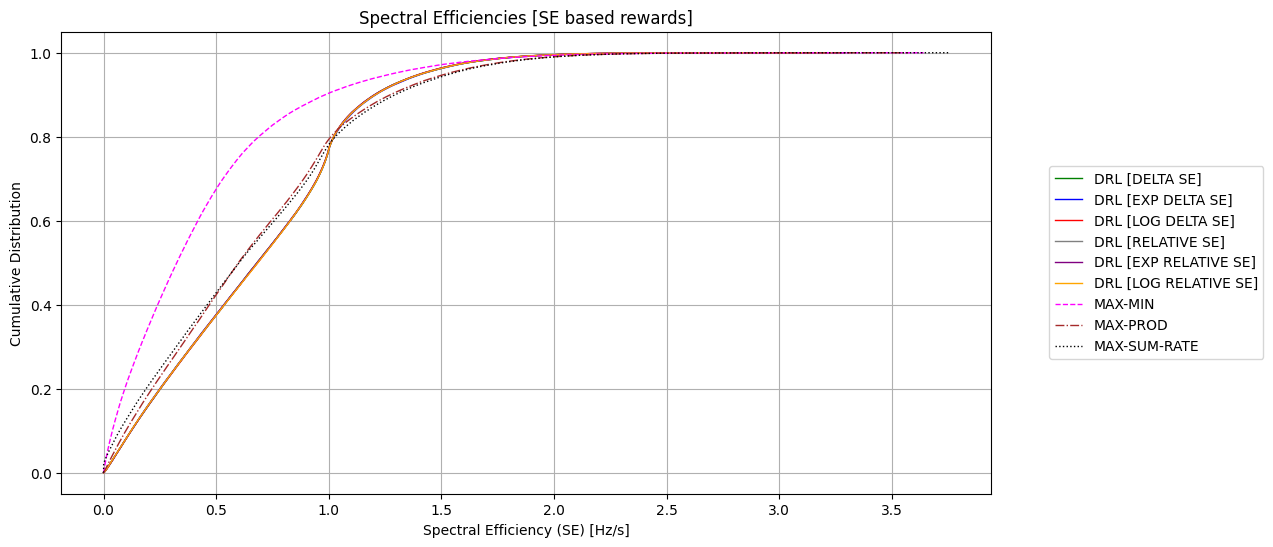

In [5]:
plot_cdf_pdf(data=SE_DATA_R_SE, title='Spectral Efficiencies [SE based rewards]', xlabel='Spectral Efficiency (SE) [Hz/s]', operation=None, cumulative=True)

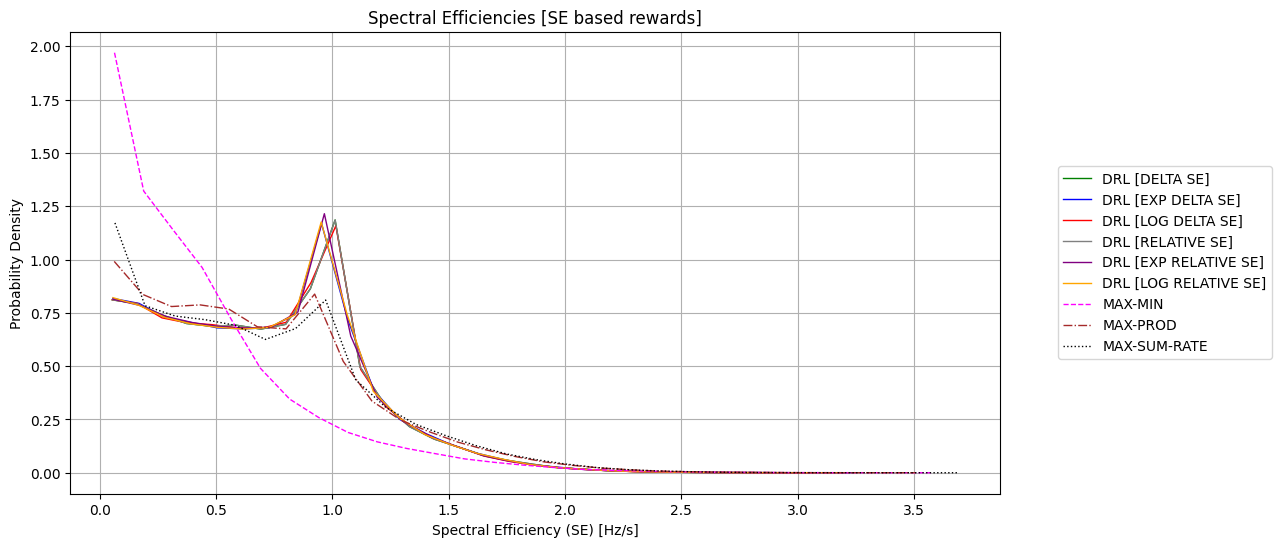

In [6]:
plot_cdf_pdf(data=SE_DATA_R_SE, title='Spectral Efficiencies [SE based rewards]', xlabel='Spectral Efficiency (SE) [Hz/s]', operation=None, cumulative=False)

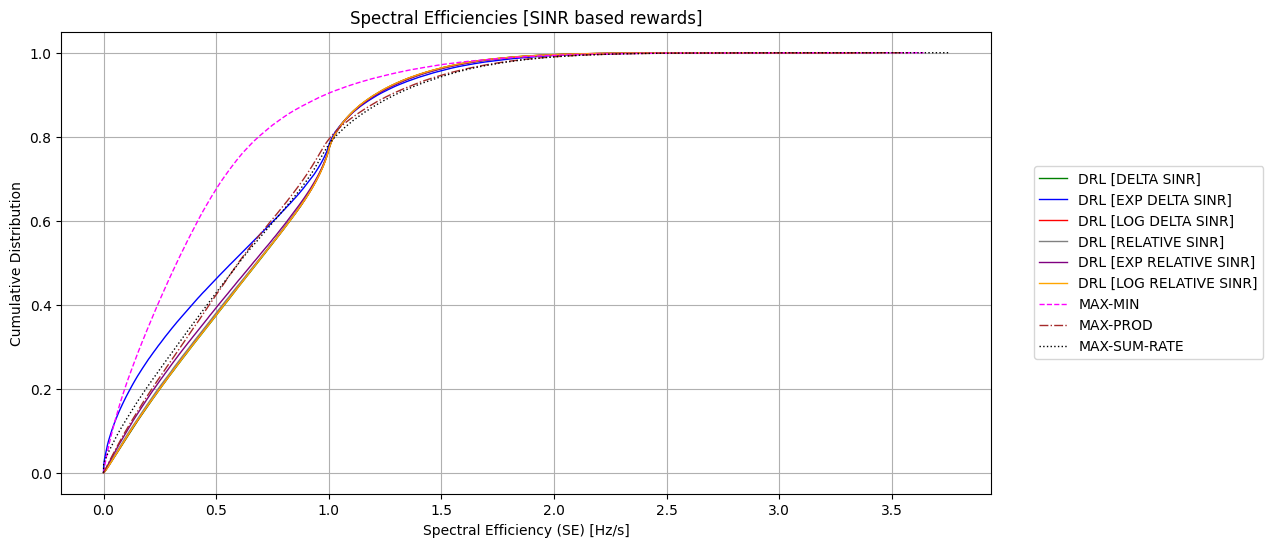

In [7]:
plot_cdf_pdf(data=SE_DATA_R_SINR, title='Spectral Efficiencies [SINR based rewards]', xlabel='Spectral Efficiency (SE) [Hz/s]', operation=None, cumulative=True)

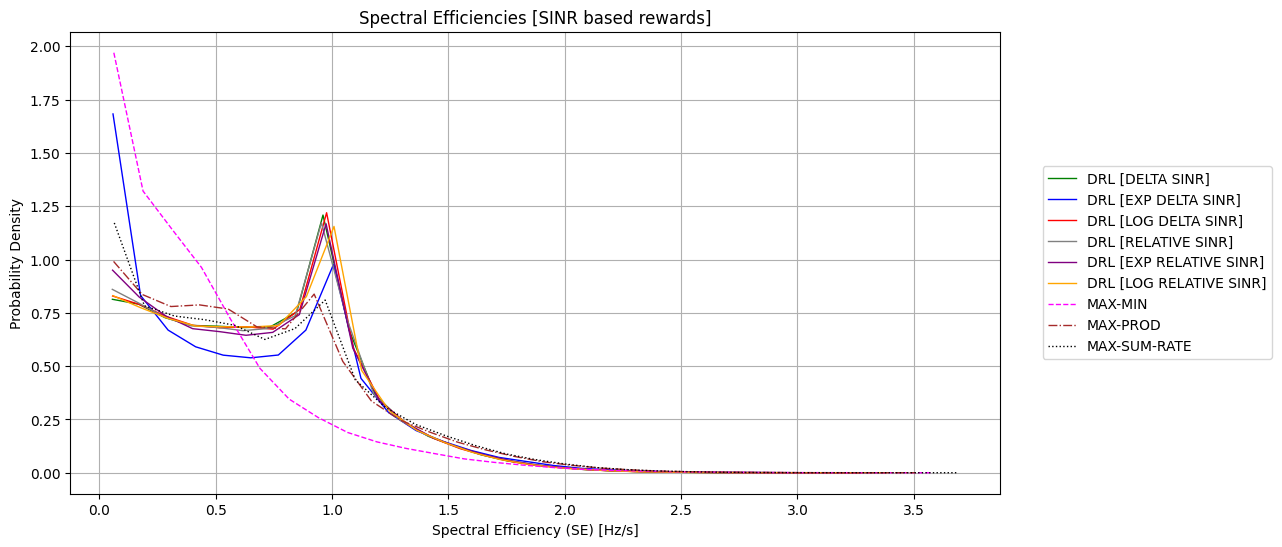

In [8]:
plot_cdf_pdf(data=SE_DATA_R_SINR, title='Spectral Efficiencies [SINR based rewards]', xlabel='Spectral Efficiency (SE) [Hz/s]', operation=None, cumulative=False)

### Mean Spectral Efficiencies

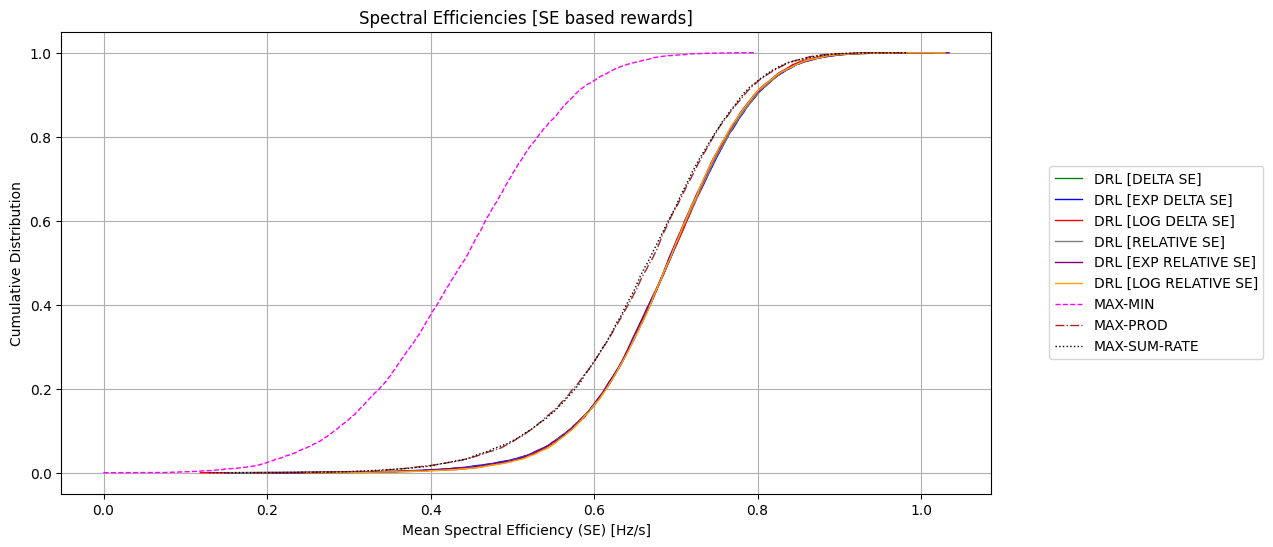

In [9]:
plot_cdf_pdf(data=SE_DATA_R_SE, title='Spectral Efficiencies [SE based rewards]', xlabel='Mean Spectral Efficiency (SE) [Hz/s]', operation='mean', cumulative=True)

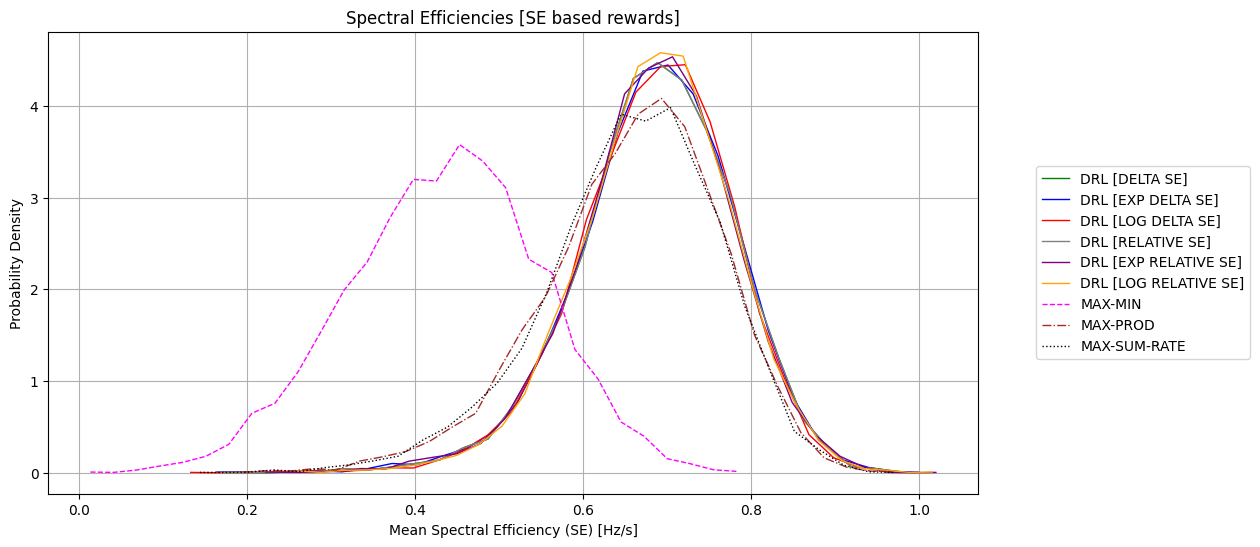

In [10]:
plot_cdf_pdf(data=SE_DATA_R_SE, title='Spectral Efficiencies [SE based rewards]', xlabel='Mean Spectral Efficiency (SE) [Hz/s]', operation='mean', cumulative=False)

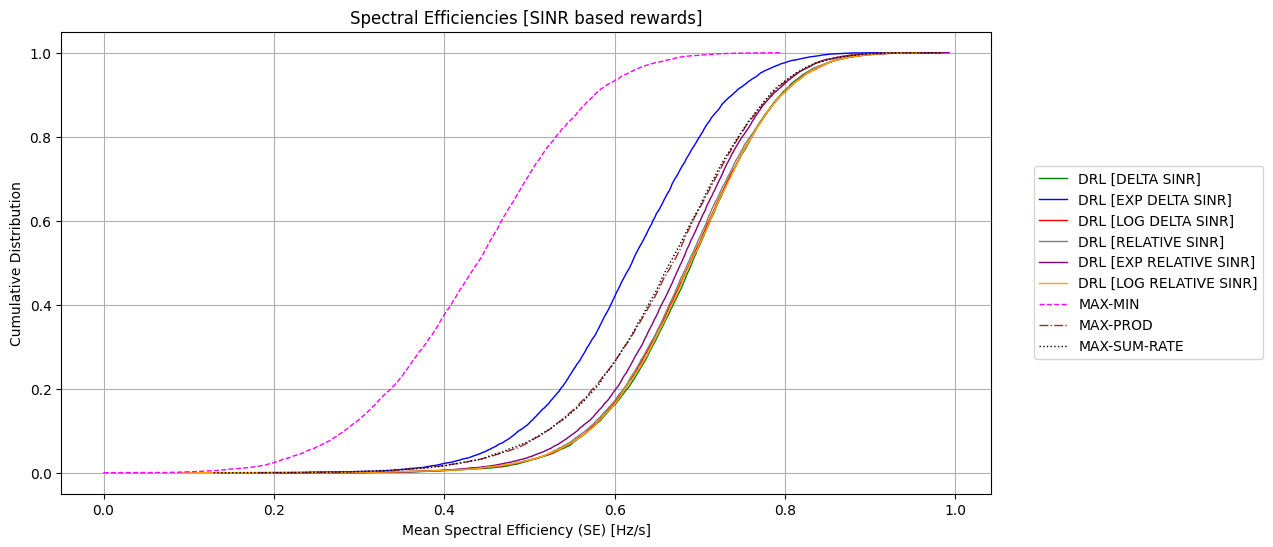

In [11]:
plot_cdf_pdf(data=SE_DATA_R_SINR, title='Spectral Efficiencies [SINR based rewards]', xlabel='Mean Spectral Efficiency (SE) [Hz/s]', operation='mean', cumulative=True)

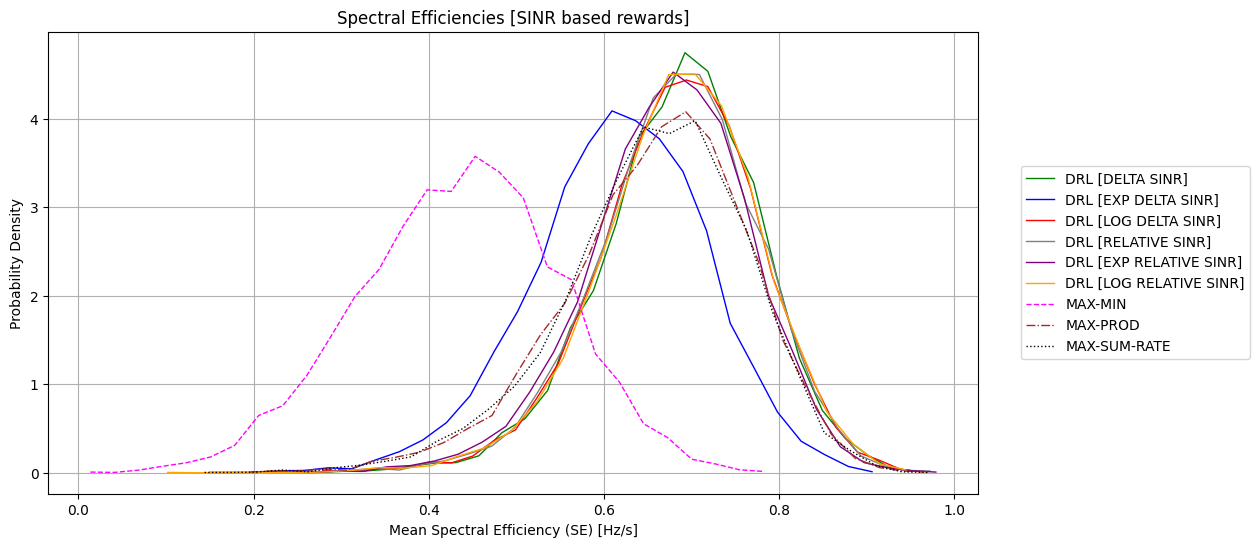

In [12]:
plot_cdf_pdf(data=SE_DATA_R_SINR, title='Spectral Efficiencies [SINR based rewards]', xlabel='Mean Spectral Efficiency (SE) [Hz/s]', operation='mean', cumulative=False)

### Min Spectral Efficiencies

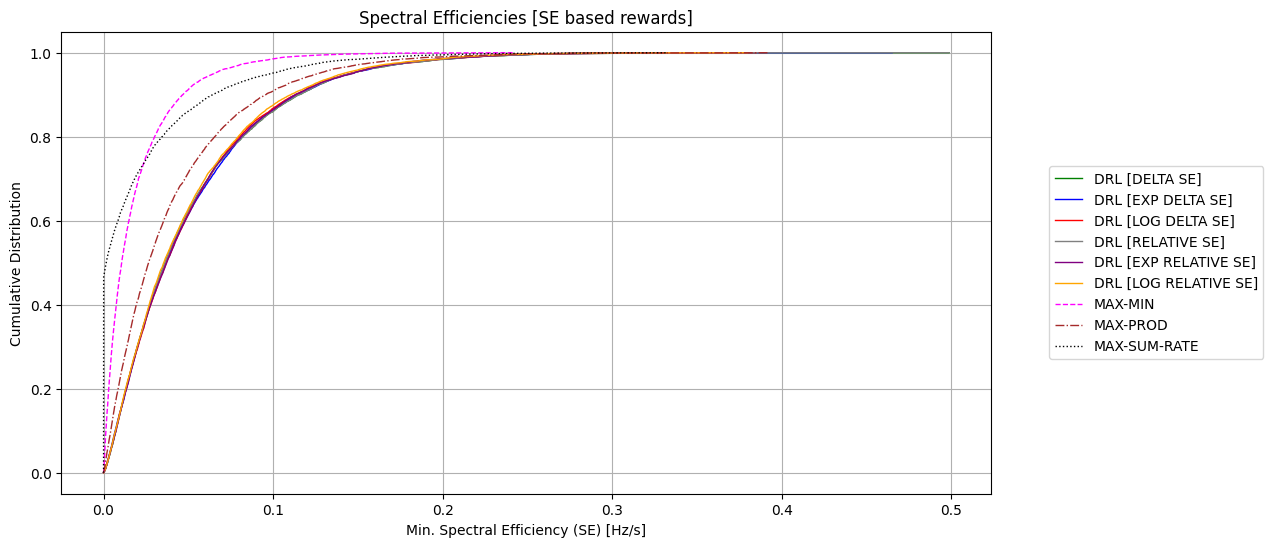

In [13]:
plot_cdf_pdf(data=SE_DATA_R_SE, title='Spectral Efficiencies [SE based rewards]', xlabel='Min. Spectral Efficiency (SE) [Hz/s]', operation='min', cumulative=True)

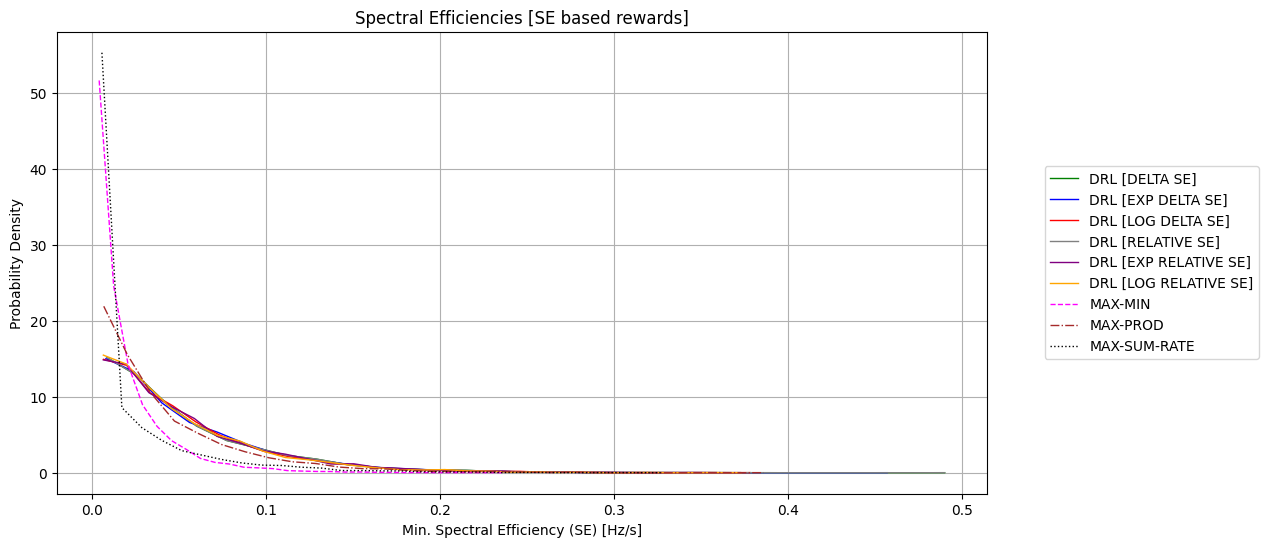

In [14]:
plot_cdf_pdf(data=SE_DATA_R_SE, title='Spectral Efficiencies [SE based rewards]', xlabel='Min. Spectral Efficiency (SE) [Hz/s]', operation='min', cumulative=False)

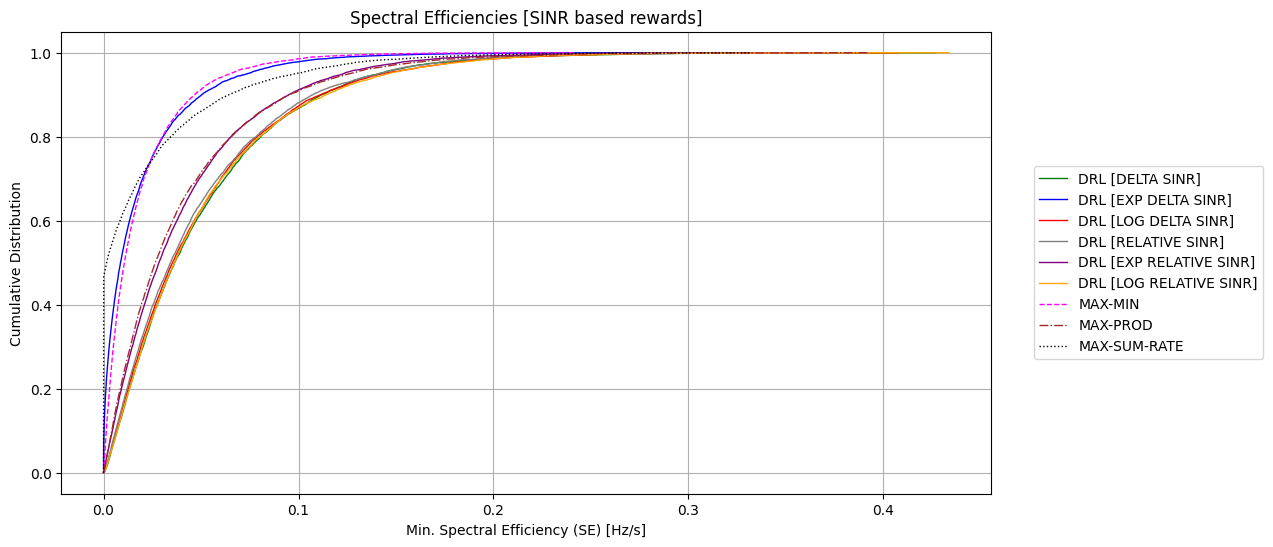

In [15]:
plot_cdf_pdf(data=SE_DATA_R_SINR, title='Spectral Efficiencies [SINR based rewards]', xlabel='Min. Spectral Efficiency (SE) [Hz/s]', operation='min', cumulative=True)

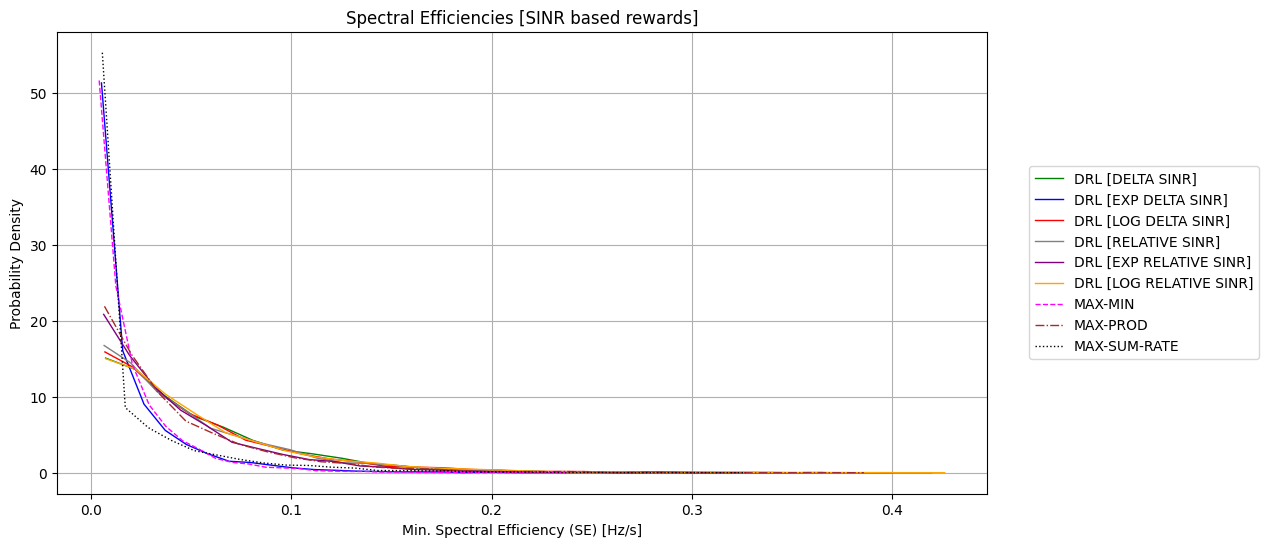

In [16]:
plot_cdf_pdf(data=SE_DATA_R_SINR, title='Spectral Efficiencies [SINR based rewards]', xlabel='Min. Spectral Efficiency (SE) [Hz/s]', operation='min', cumulative=False)

### Max Spectral Efficiencies

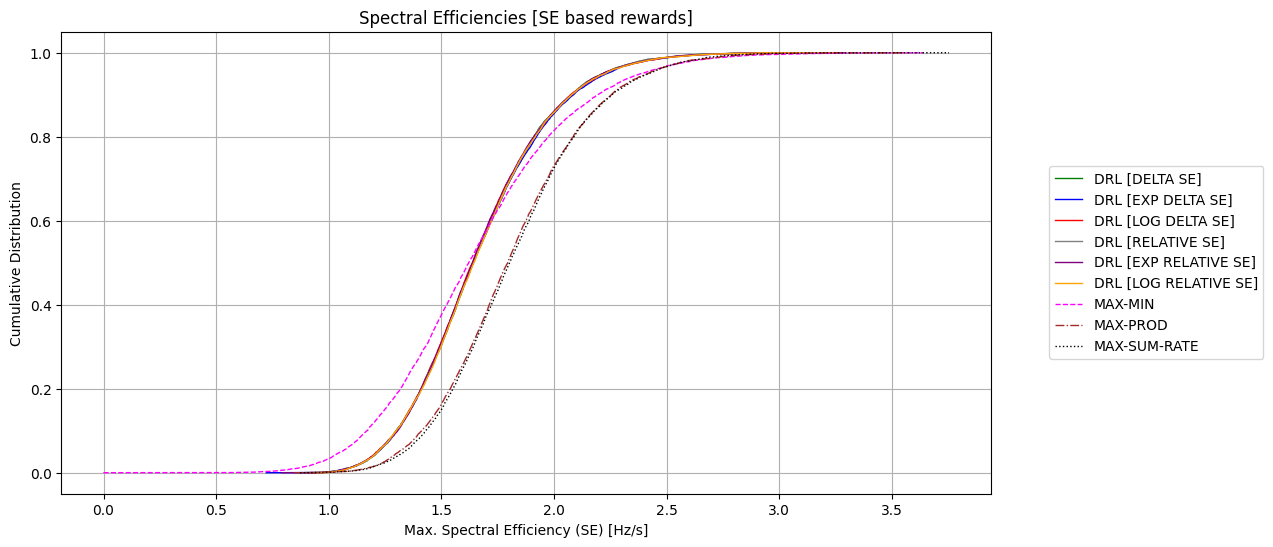

In [17]:
plot_cdf_pdf(data=SE_DATA_R_SE, title='Spectral Efficiencies [SE based rewards]', xlabel='Max. Spectral Efficiency (SE) [Hz/s]', operation='max', cumulative=True)

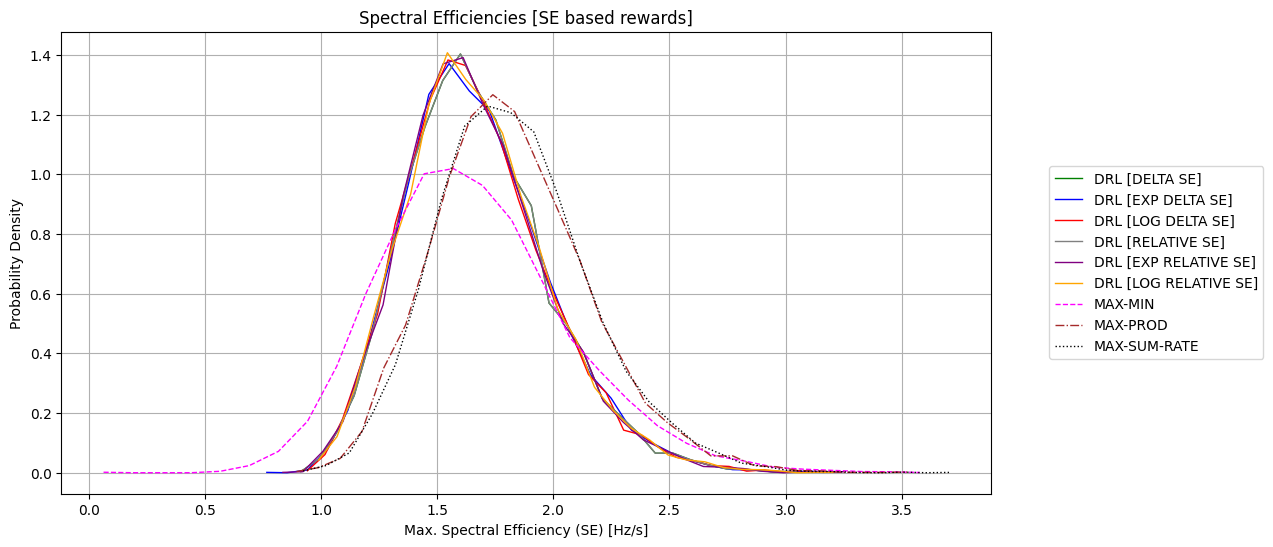

In [18]:
plot_cdf_pdf(data=SE_DATA_R_SE, title='Spectral Efficiencies [SE based rewards]', xlabel='Max. Spectral Efficiency (SE) [Hz/s]', operation='max', cumulative=False)

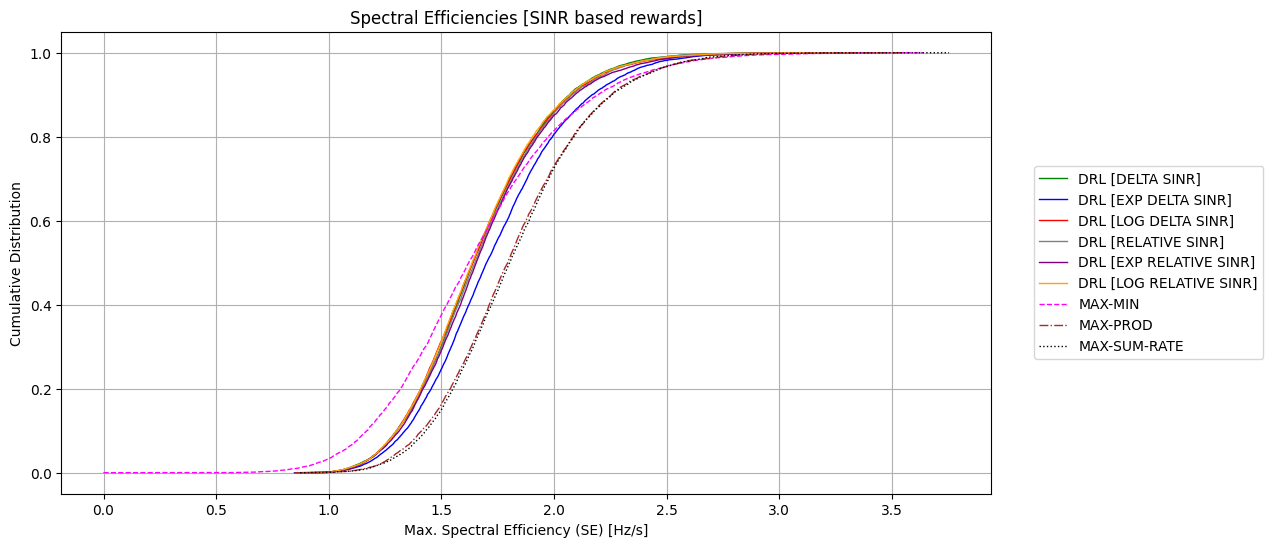

In [19]:
plot_cdf_pdf(data=SE_DATA_R_SINR, title='Spectral Efficiencies [SINR based rewards]', xlabel='Max. Spectral Efficiency (SE) [Hz/s]', operation='max', cumulative=True)

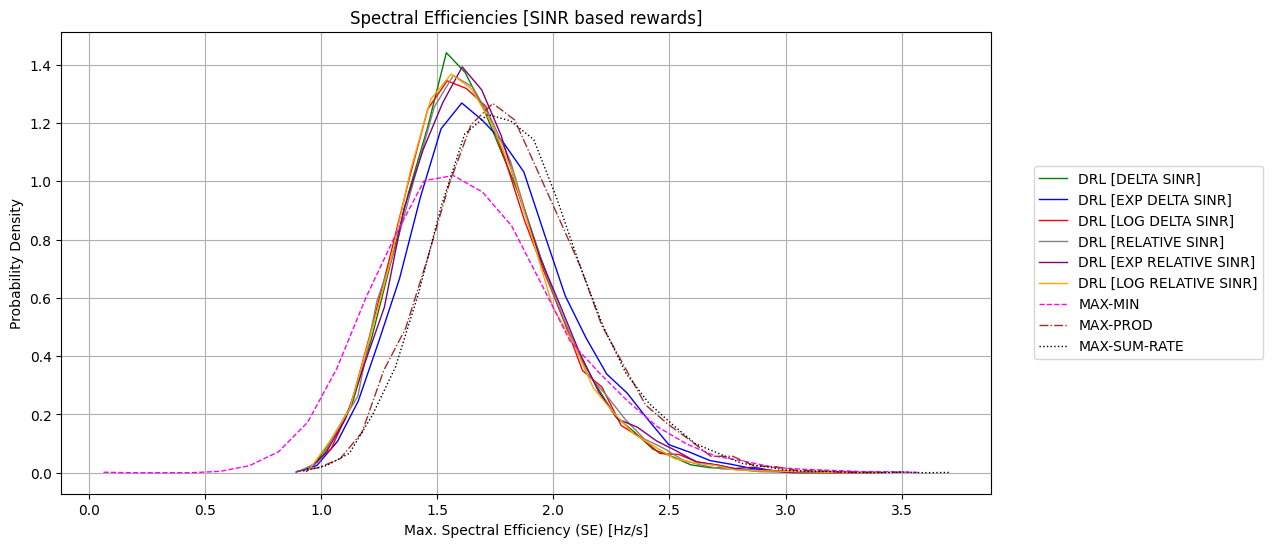

In [20]:
plot_cdf_pdf(data=SE_DATA_R_SINR, title='Spectral Efficiencies [SINR based rewards]', xlabel='Max. Spectral Efficiency (SE) [Hz/s]', operation='max', cumulative=False)

## Sum Spectral Efficiencies

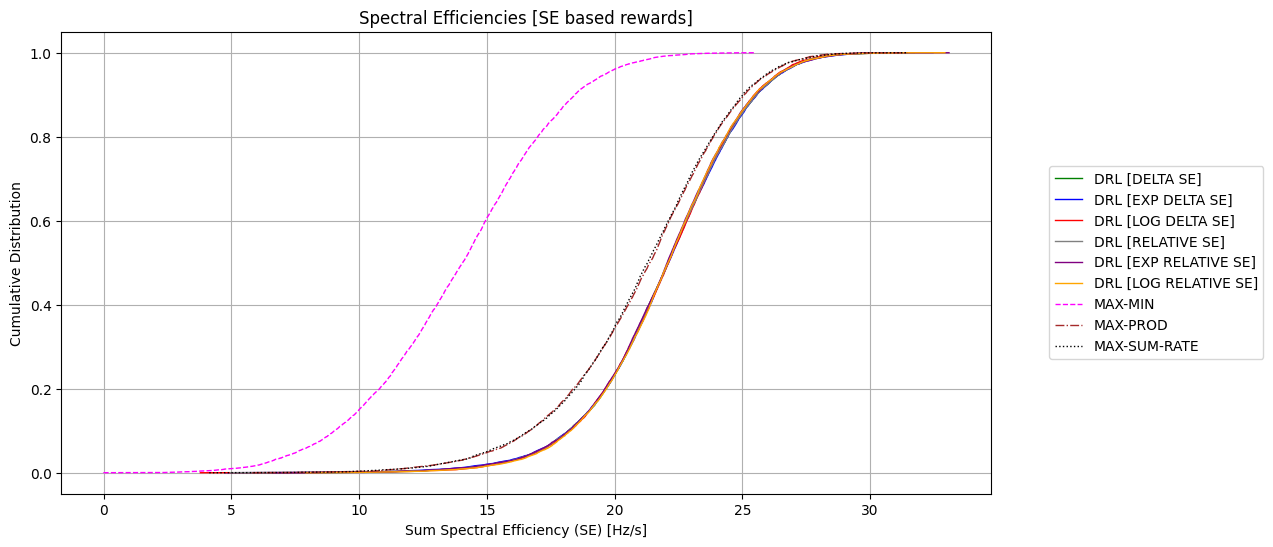

In [21]:
plot_cdf_pdf(data=SE_DATA_R_SE, title='Spectral Efficiencies [SE based rewards]', xlabel='Sum Spectral Efficiency (SE) [Hz/s]', operation='sum', cumulative=True)

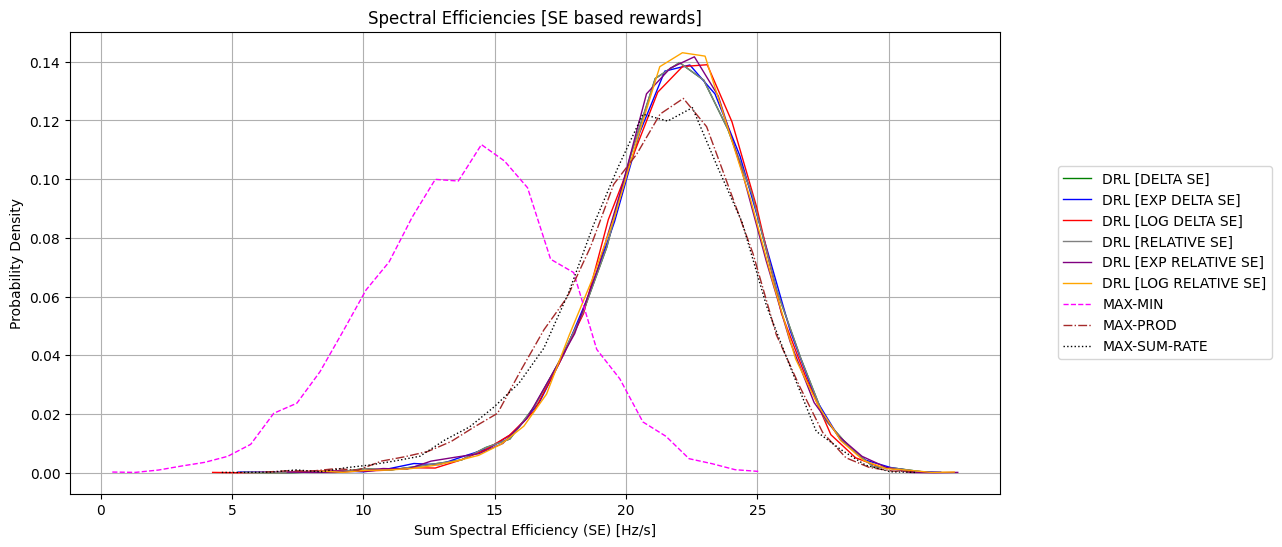

In [22]:
plot_cdf_pdf(data=SE_DATA_R_SE, title='Spectral Efficiencies [SE based rewards]', xlabel='Sum Spectral Efficiency (SE) [Hz/s]', operation='sum', cumulative=False)

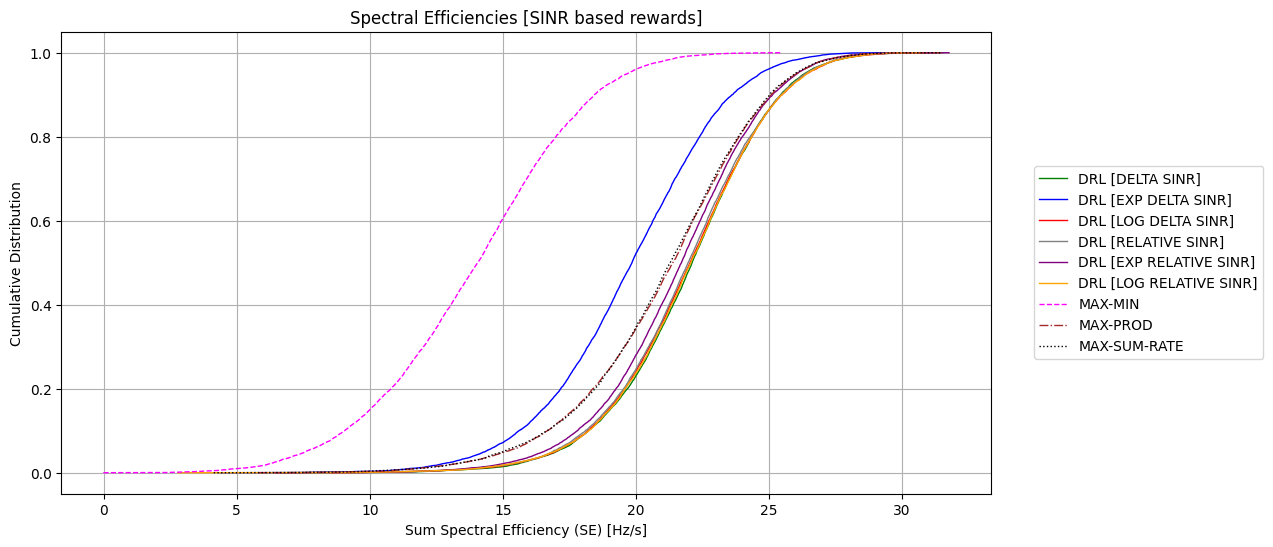

In [23]:
plot_cdf_pdf(data=SE_DATA_R_SINR, title='Spectral Efficiencies [SINR based rewards]', xlabel='Sum Spectral Efficiency (SE) [Hz/s]', operation='sum', cumulative=True)

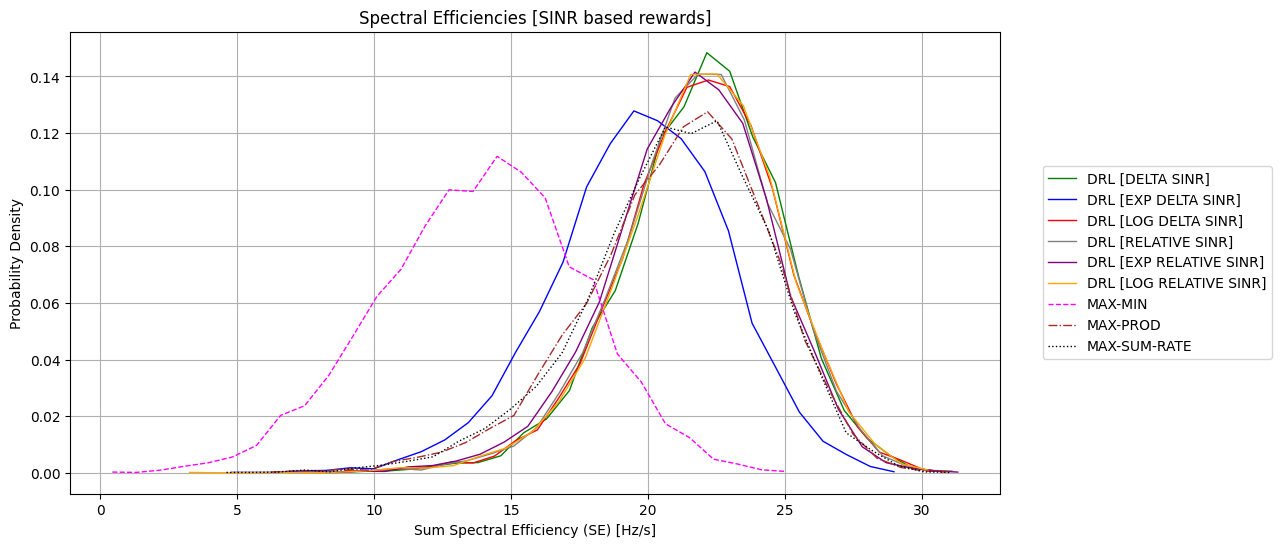

In [24]:
plot_cdf_pdf(data=SE_DATA_R_SINR, title='Spectral Efficiencies [SINR based rewards]', xlabel='Sum Spectral Efficiency (SE) [Hz/s]', operation='sum', cumulative=False)

### CDF Comparison

#### SE based reward

In [25]:
compare_models(SE_DATA_R_SE, operation=None)

Label Average SE    Max SE  \
MODEL_DELTA_SE_SEs                     DRL [DELTA SE]   0.685972  3.087872   
MODEL_EXP_DELTA_CLIP_SE_SEs        DRL [EXP DELTA SE]   0.686155   3.25177   
MODEL_LOG_DELTA_SE_SEs             DRL [LOG DELTA SE]   0.685932  3.097591   
MODEL_RELATIVE_SE_SEs               DRL [RELATIVE SE]   0.685972  3.087872   
MODEL_EXP_RELATIVE_CLIP_SE_SEs  DRL [EXP RELATIVE SE]    0.68482  3.293269   
MODEL_LOG_RELATIVE_SE_SEs       DRL [LOG RELATIVE SE]   0.686156  3.246499   
MAXMIN_SEs                                    MAX-MIN   0.433573  3.640987   
MAXPROD_SEs                                  MAX-PROD   0.658278  3.570834   
SUMRATE_SEs                              MAX-SUM-RATE   0.657153  3.753867   

                               Standard Deviation 25th Percentile  \
MODEL_DELTA_SE_SEs                       0.429664        0.320075   
MODEL_EXP_DELTA_CLIP_SE_SEs              0.431118        0.319422   
MODEL_LOG_DELTA_SE_SEs                   0.428937         0.32169   
MODEL_RELATIVE_SE_SEs                    0.429664        0.320075   
MODEL_EXP_RELATIVE_CLIP_SE_SEs           0.428986         0.31976   
MODEL_LOG_RELATIVE_SE_SEs                0.430156        0.320359   
MAXMIN_SEs                               0.410045        0.127517   
MAXPROD_SEs                              0.464147        0.278405   
SUMRATE_SEs                              0.479985        0.255046   

                               50th Percentile 75th Percentile  
MODEL_DELTA_SE_SEs                    0.681944        0.989463  
MODEL_EXP_DELTA_CLIP_SE_SEs            0.68269        0.989571  
MODEL_LOG_DELTA_SE_SEs                0.684376        0.988668  
MODEL_RELATIVE_SE_SEs                 0.681944        0.989463  
MODEL_EXP_RELATIVE_CLIP_SE_SEs        0.681802        0.988483  
MODEL_LOG_RELATIVE_SE_SEs             0.684729        0.989437  
MAXMIN_SEs                            0.325092        0.600203  
MAXPROD_SEs                           0.598934        0.948577  
SUMRATE_SEs                           0.601243        0.965235

In [26]:
ks_results_r_se = compare_cdfs_ks(SE_DATA_R_SE, operation=None)

In [27]:
ks_results_r_se['Best Model']

Criteria             Best Model
0       KS Statistic         DRL [DELTA SE]
1            P-Value  DRL [LOG RELATIVE SE]
2  Area Between CDFs      DRL [RELATIVE SE]

In [28]:
ks_results_r_se['Details']

Model1                 Model2  KS Statistic        P-Value  \
0          DRL [DELTA SE]     DRL [EXP DELTA SE]      0.002516   2.629219e-01   
1          DRL [DELTA SE]     DRL [LOG DELTA SE]      0.002331   3.489142e-01   
2          DRL [DELTA SE]      DRL [RELATIVE SE]      0.000000   1.000000e+00   
3          DRL [DELTA SE]  DRL [EXP RELATIVE SE]      0.002222   4.078614e-01   
4          DRL [DELTA SE]  DRL [LOG RELATIVE SE]      0.002247   3.938827e-01   
5          DRL [DELTA SE]                MAX-MIN      0.306444   0.000000e+00   
6          DRL [DELTA SE]               MAX-PROD      0.059063   0.000000e+00   
7          DRL [DELTA SE]           MAX-SUM-RATE      0.055378   0.000000e+00   
8      DRL [EXP DELTA SE]     DRL [LOG DELTA SE]      0.002972   1.182097e-01   
9      DRL [EXP DELTA SE]      DRL [RELATIVE SE]      0.002516   2.629219e-01   
10     DRL [EXP DELTA SE]  DRL [EXP RELATIVE SE]      0.003509   3.876517e-02   
11     DRL [EXP DELTA SE]  DRL [LOG RELATIVE SE]      0.001897   6.117591e-01   
12     DRL [EXP DELTA SE]                MAX-MIN      0.305981   0.000000e+00   
13     DRL [EXP DELTA SE]               MAX-PROD      0.059466   0.000000e+00   
14     DRL [EXP DELTA SE]           MAX-SUM-RATE      0.055341   0.000000e+00   
15     DRL [LOG DELTA SE]      DRL [RELATIVE SE]      0.002331   3.489142e-01   
16     DRL [LOG DELTA SE]  DRL [EXP RELATIVE SE]      0.002203   4.185356e-01   
17     DRL [LOG DELTA SE]  DRL [LOG RELATIVE SE]      0.001747   7.126229e-01   
18     DRL [LOG DELTA SE]                MAX-MIN      0.307081   0.000000e+00   
19     DRL [LOG DELTA SE]               MAX-PROD      0.060547   0.000000e+00   
20     DRL [LOG DELTA SE]           MAX-SUM-RATE      0.056356   0.000000e+00   
21      DRL [RELATIVE SE]  DRL [EXP RELATIVE SE]      0.002222   4.078614e-01   
22      DRL [RELATIVE SE]  DRL [LOG RELATIVE SE]      0.002247   3.938827e-01   
23      DRL [RELATIVE SE]                MAX-MIN      0.306444   0.000000e+00   
24      DRL [RELATIVE SE]               MAX-PROD      0.059063   0.000000e+00   
25      DRL [RELATIVE SE]           MAX-SUM-RATE      0.055378   0.000000e+00   
26  DRL [EXP RELATIVE SE]  DRL [LOG RELATIVE SE]      0.002322   3.537391e-01   
27  DRL [EXP RELATIVE SE]                MAX-MIN      0.305947   0.000000e+00   
28  DRL [EXP RELATIVE SE]               MAX-PROD      0.058700   0.000000e+00   
29  DRL [EXP RELATIVE SE]           MAX-SUM-RATE      0.055212   0.000000e+00   
30  DRL [LOG RELATIVE SE]                MAX-MIN      0.307247   0.000000e+00   
31  DRL [LOG RELATIVE SE]               MAX-PROD      0.060750   0.000000e+00   
32  DRL [LOG RELATIVE SE]           MAX-SUM-RATE      0.056584   0.000000e+00   
33                MAX-MIN               MAX-PROD      0.253319   0.000000e+00   
34                MAX-MIN           MAX-SUM-RATE      0.251509   0.000000e+00   
35               MAX-PROD           MAX-SUM-RATE      0.027125  1.057127e-102   

    Area Between CDFs  
0            0.001386  
1            0.001116  
2            0.000000  
3            0.001233  
4            0.000954  
5            0.254510  
6            0.056365  
7            0.064953  
8            0.002024  
9            0.001385  
10           0.001781  
11           0.001364  
12           0.254473  
13           0.055225  
14           0.063746  
15           0.001116  
16           0.001241  
17           0.001183  
18           0.254475  
19           0.056885  
20           0.065521  
21           0.001233  
22           0.000954  
23           0.254510  
24           0.056365  
25           0.064953  
26           0.001667  
27           0.253428  
28           0.056023  
29           0.064683  
30           0.254668  
31           0.056268  
32           0.064892  
33           0.224777  
34           0.223945  
35           0.017390

In [29]:
emd_results_r_se = compare_cdfs_emd(SE_DATA_R_SE, operation=None)

In [30]:
emd_results_r_se['Ranked Models']

Model  Average EMD
0         DRL [DELTA SE]     0.047565
1      DRL [RELATIVE SE]     0.047565
2  DRL [EXP RELATIVE SE]     0.047662
3     DRL [EXP DELTA SE]     0.047674
4  DRL [LOG RELATIVE SE]     0.047744
5     DRL [LOG DELTA SE]     0.047945
6               MAX-PROD     0.072413
7           MAX-SUM-RATE     0.078761
8                MAX-MIN     0.246849

In [31]:
emd_results_r_se['Details']

Model1                 Model2  EMD Value
0          DRL [DELTA SE]     DRL [EXP DELTA SE]   0.001386
1          DRL [DELTA SE]     DRL [LOG DELTA SE]   0.001116
2          DRL [DELTA SE]      DRL [RELATIVE SE]   0.000000
3          DRL [DELTA SE]  DRL [EXP RELATIVE SE]   0.001234
4          DRL [DELTA SE]  DRL [LOG RELATIVE SE]   0.000954
5          DRL [DELTA SE]                MAX-MIN   0.254511
6          DRL [DELTA SE]               MAX-PROD   0.056366
7          DRL [DELTA SE]           MAX-SUM-RATE   0.064954
8      DRL [EXP DELTA SE]     DRL [LOG DELTA SE]   0.002025
9      DRL [EXP DELTA SE]      DRL [RELATIVE SE]   0.001386
10     DRL [EXP DELTA SE]  DRL [EXP RELATIVE SE]   0.001781
11     DRL [EXP DELTA SE]  DRL [LOG RELATIVE SE]   0.001364
12     DRL [EXP DELTA SE]                MAX-MIN   0.254473
13     DRL [EXP DELTA SE]               MAX-PROD   0.055226
14     DRL [EXP DELTA SE]           MAX-SUM-RATE   0.063747
15     DRL [LOG DELTA SE]      DRL [RELATIVE SE]   0.001116
16     DRL [LOG DELTA SE]  DRL [EXP RELATIVE SE]   0.001241
17     DRL [LOG DELTA SE]  DRL [LOG RELATIVE SE]   0.001182
18     DRL [LOG DELTA SE]                MAX-MIN   0.254476
19     DRL [LOG DELTA SE]               MAX-PROD   0.056885
20     DRL [LOG DELTA SE]           MAX-SUM-RATE   0.065522
21      DRL [RELATIVE SE]  DRL [EXP RELATIVE SE]   0.001234
22      DRL [RELATIVE SE]  DRL [LOG RELATIVE SE]   0.000954
23      DRL [RELATIVE SE]                MAX-MIN   0.254511
24      DRL [RELATIVE SE]               MAX-PROD   0.056366
25      DRL [RELATIVE SE]           MAX-SUM-RATE   0.064954
26  DRL [EXP RELATIVE SE]  DRL [LOG RELATIVE SE]   0.001668
27  DRL [EXP RELATIVE SE]                MAX-MIN   0.253429
28  DRL [EXP RELATIVE SE]               MAX-PROD   0.056024
29  DRL [EXP RELATIVE SE]           MAX-SUM-RATE   0.064684
30  DRL [LOG RELATIVE SE]                MAX-MIN   0.254669
31  DRL [LOG RELATIVE SE]               MAX-PROD   0.056268
32  DRL [LOG RELATIVE SE]           MAX-SUM-RATE   0.064892
33                MAX-MIN               MAX-PROD   0.224777
34                MAX-MIN           MAX-SUM-RATE   0.223944
35               MAX-PROD           MAX-SUM-RATE   0.017391

In [32]:
moments_r_se = compare_cdfs_moments(SE_DATA_R_SE, operation=None, criteria='kurtosis')

In [33]:
moments_r_se['Ranked Models']

Model  Rank
0              MODEL_DELTA_SE_SEs     1
3           MODEL_RELATIVE_SE_SEs     2
5       MODEL_LOG_RELATIVE_SE_SEs     3
4  MODEL_EXP_RELATIVE_CLIP_SE_SEs     4
2          MODEL_LOG_DELTA_SE_SEs     5
1     MODEL_EXP_DELTA_CLIP_SE_SEs     6
8                     SUMRATE_SEs     7
7                     MAXPROD_SEs     8
6                      MAXMIN_SEs     9

In [34]:
moments_r_se['Details']

Model      Mean  Variance  Skewness  Kurtosis
0              MODEL_DELTA_SE_SEs  0.685972  0.184611  0.448013 -0.017003
1     MODEL_EXP_DELTA_CLIP_SE_SEs  0.686155  0.185863  0.455325  0.003302
2          MODEL_LOG_DELTA_SE_SEs  0.685932  0.183987  0.445793 -0.002494
3           MODEL_RELATIVE_SE_SEs  0.685972  0.184611  0.448013 -0.017003
4  MODEL_EXP_RELATIVE_CLIP_SE_SEs  0.684820  0.184029  0.448260 -0.007724
5       MODEL_LOG_RELATIVE_SE_SEs  0.686156  0.185035  0.445981 -0.010502
6                      MAXMIN_SEs  0.433573  0.168137  1.647579  3.397338
7                     MAXPROD_SEs  0.658278  0.215432  0.792793  0.545877
8                     SUMRATE_SEs  0.657153  0.230386  0.722258  0.301901

In [35]:
calculate_and_rank_percentiles(SE_DATA_R_SE, [50, 75])

Model  50th Percentile  75th Percentile  Rank
1     DRL [EXP DELTA SE]         0.682690         0.989571     1
0         DRL [DELTA SE]         0.681944         0.989463     2
3      DRL [RELATIVE SE]         0.681944         0.989463     2
5  DRL [LOG RELATIVE SE]         0.684729         0.989437     4
2     DRL [LOG DELTA SE]         0.684376         0.988668     5
4  DRL [EXP RELATIVE SE]         0.681802         0.988483     6
8           MAX-SUM-RATE         0.601243         0.965235     7
7               MAX-PROD         0.598934         0.948577     8
6                MAX-MIN         0.325092         0.600203     9

#### SINR based reward

In [36]:
compare_models(SE_DATA_R_SINR, operation=None)

Label Average SE  \
MODEL_DELTA_SINR_SEs                     DRL [DELTA SINR]   0.685622   
MODEL_EXP_DELTA_CLIP_SINR_SEs        DRL [EXP DELTA SINR]   0.616127   
MODEL_LOG_DELTA_SINR_SEs             DRL [LOG DELTA SINR]   0.684127   
MODEL_RELATIVE_SINR_SEs               DRL [RELATIVE SINR]   0.682317   
MODEL_EXP_RELATIVE_CLIP_SINR_SEs  DRL [EXP RELATIVE SINR]   0.673338   
MODEL_LOG_RELATIVE_SINR_SEs       DRL [LOG RELATIVE SINR]   0.684811   
MAXMIN_SEs                                        MAX-MIN   0.433573   
MAXPROD_SEs                                      MAX-PROD   0.658278   
SUMRATE_SEs                                  MAX-SUM-RATE   0.657153   

                                    Max SE Standard Deviation 25th Percentile  \
MODEL_DELTA_SINR_SEs              3.280468           0.428925        0.320245   
MODEL_EXP_DELTA_CLIP_SINR_SEs     3.433391           0.478868        0.174524   
MODEL_LOG_DELTA_SINR_SEs          3.333457           0.430376        0.317093   
MODEL_RELATIVE_SINR_SEs           3.257248           0.433024        0.311733   
MODEL_EXP_RELATIVE_CLIP_SINR_SEs  3.325569           0.439792        0.291812   
MODEL_LOG_RELATIVE_SINR_SEs         3.4418           0.429195        0.318726   
MAXMIN_SEs                        3.640987           0.410045        0.127517   
MAXPROD_SEs                       3.570834           0.464147        0.278405   
SUMRATE_SEs                       3.753867           0.479985        0.255046   

                                 50th Percentile 75th Percentile  
MODEL_DELTA_SINR_SEs                    0.683625          0.9888  
MODEL_EXP_DELTA_CLIP_SINR_SEs           0.569683        0.978567  
MODEL_LOG_DELTA_SINR_SEs                0.679995        0.989065  
MODEL_RELATIVE_SINR_SEs                 0.678889        0.988464  
MODEL_EXP_RELATIVE_CLIP_SINR_SEs        0.664442        0.987595  
MODEL_LOG_RELATIVE_SINR_SEs             0.682294        0.989265  
MAXMIN_SEs                              0.325092        0.600203  
MAXPROD_SEs                             0.598934        0.948577  
SUMRATE_SEs                             0.601243        0.965235

In [37]:
# Kolmogorov-Smirnov Test
ks_results_r_sinr = compare_cdfs_ks(SE_DATA_R_SINR, operation=None)

In [38]:
ks_results_r_sinr['Details']

Model1                   Model2  KS Statistic  \
0          DRL [DELTA SINR]     DRL [EXP DELTA SINR]      0.109234   
1          DRL [DELTA SINR]     DRL [LOG DELTA SINR]      0.003272   
2          DRL [DELTA SINR]      DRL [RELATIVE SINR]      0.006300   
3          DRL [DELTA SINR]  DRL [EXP RELATIVE SINR]      0.020884   
4          DRL [DELTA SINR]  DRL [LOG RELATIVE SINR]      0.002225   
5          DRL [DELTA SINR]                  MAX-MIN      0.307297   
6          DRL [DELTA SINR]                 MAX-PROD      0.060044   
7          DRL [DELTA SINR]             MAX-SUM-RATE      0.056163   
8      DRL [EXP DELTA SINR]     DRL [LOG DELTA SINR]      0.107222   
9      DRL [EXP DELTA SINR]      DRL [RELATIVE SINR]      0.103797   
10     DRL [EXP DELTA SINR]  DRL [EXP RELATIVE SINR]      0.090222   
11     DRL [EXP DELTA SINR]  DRL [LOG RELATIVE SINR]      0.107897   
12     DRL [EXP DELTA SINR]                  MAX-MIN      0.236941   
13     DRL [EXP DELTA SINR]                 MAX-PROD      0.083716   
14     DRL [EXP DELTA SINR]             MAX-SUM-RATE      0.062153   
15     DRL [LOG DELTA SINR]      DRL [RELATIVE SINR]      0.004312   
16     DRL [LOG DELTA SINR]  DRL [EXP RELATIVE SINR]      0.018550   
17     DRL [LOG DELTA SINR]  DRL [LOG RELATIVE SINR]      0.002797   
18     DRL [LOG DELTA SINR]                  MAX-MIN      0.305209   
19     DRL [LOG DELTA SINR]                 MAX-PROD      0.057703   
20     DRL [LOG DELTA SINR]             MAX-SUM-RATE      0.054366   
21      DRL [RELATIVE SINR]  DRL [EXP RELATIVE SINR]      0.015153   
22      DRL [RELATIVE SINR]  DRL [LOG RELATIVE SINR]      0.005550   
23      DRL [RELATIVE SINR]                  MAX-MIN      0.302406   
24      DRL [RELATIVE SINR]                 MAX-PROD      0.057216   
25      DRL [RELATIVE SINR]             MAX-SUM-RATE      0.052025   
26  DRL [EXP RELATIVE SINR]  DRL [LOG RELATIVE SINR]      0.020084   
27  DRL [EXP RELATIVE SINR]                  MAX-MIN      0.291931   
28  DRL [EXP RELATIVE SINR]                 MAX-PROD      0.049047   
29  DRL [EXP RELATIVE SINR]             MAX-SUM-RATE      0.041984   
30  DRL [LOG RELATIVE SINR]                  MAX-MIN      0.306809   
31  DRL [LOG RELATIVE SINR]                 MAX-PROD      0.059225   
32  DRL [LOG RELATIVE SINR]             MAX-SUM-RATE      0.055697   
33                  MAX-MIN                 MAX-PROD      0.253319   
34                  MAX-MIN             MAX-SUM-RATE      0.251509   
35                 MAX-PROD             MAX-SUM-RATE      0.027125   

          P-Value  Area Between CDFs  
0    0.000000e+00           0.079395  
1    6.491187e-02           0.001905  
2    6.071243e-06           0.004959  
3    4.727034e-61           0.015303  
4    4.060981e-01           0.001049  
5    0.000000e+00           0.254337  
6    0.000000e+00           0.056637  
7    0.000000e+00           0.065263  
8    0.000000e+00           0.077604  
9    0.000000e+00           0.074495  
10   0.000000e+00           0.064212  
11   0.000000e+00           0.078967  
12   0.000000e+00           0.184199  
13   0.000000e+00           0.052416  
14   0.000000e+00           0.044339  
15   5.190142e-03           0.003225  
16   2.955876e-48           0.013518  
17   1.632510e-01           0.001393  
18   0.000000e+00           0.252608  
19   0.000000e+00           0.054845  
20   0.000000e+00           0.063470  
21   2.422055e-32           0.010355  
22   1.043869e-04           0.004525  
23   0.000000e+00           0.250683  
24   0.000000e+00           0.051708  
25   0.000000e+00           0.060314  
26   1.700375e-56           0.014849  
27   0.000000e+00           0.241385  
28   0.000000e+00           0.041362  
29  1.678735e-245           0.049961  
30   0.000000e+00           0.253529  
31   0.000000e+00           0.056191  
32   0.000000e+00           0.064800  
33   0.000000e+00           0.224777  
34   0.000000e+00           0.223945  
35  1.057127e-102         

In [39]:
ks_results_r_sinr['Details']

Model1                   Model2  KS Statistic  \
0          DRL [DELTA SINR]     DRL [EXP DELTA SINR]      0.109234   
1          DRL [DELTA SINR]     DRL [LOG DELTA SINR]      0.003272   
2          DRL [DELTA SINR]      DRL [RELATIVE SINR]      0.006300   
3          DRL [DELTA SINR]  DRL [EXP RELATIVE SINR]      0.020884   
4          DRL [DELTA SINR]  DRL [LOG RELATIVE SINR]      0.002225   
5          DRL [DELTA SINR]                  MAX-MIN      0.307297   
6          DRL [DELTA SINR]                 MAX-PROD      0.060044   
7          DRL [DELTA SINR]             MAX-SUM-RATE      0.056163   
8      DRL [EXP DELTA SINR]     DRL [LOG DELTA SINR]      0.107222   
9      DRL [EXP DELTA SINR]      DRL [RELATIVE SINR]      0.103797   
10     DRL [EXP DELTA SINR]  DRL [EXP RELATIVE SINR]      0.090222   
11     DRL [EXP DELTA SINR]  DRL [LOG RELATIVE SINR]      0.107897   
12     DRL [EXP DELTA SINR]                  MAX-MIN      0.236941   
13     DRL [EXP DELTA SINR]                 MAX-PROD      0.083716   
14     DRL [EXP DELTA SINR]             MAX-SUM-RATE      0.062153   
15     DRL [LOG DELTA SINR]      DRL [RELATIVE SINR]      0.004312   
16     DRL [LOG DELTA SINR]  DRL [EXP RELATIVE SINR]      0.018550   
17     DRL [LOG DELTA SINR]  DRL [LOG RELATIVE SINR]      0.002797   
18     DRL [LOG DELTA SINR]                  MAX-MIN      0.305209   
19     DRL [LOG DELTA SINR]                 MAX-PROD      0.057703   
20     DRL [LOG DELTA SINR]             MAX-SUM-RATE      0.054366   
21      DRL [RELATIVE SINR]  DRL [EXP RELATIVE SINR]      0.015153   
22      DRL [RELATIVE SINR]  DRL [LOG RELATIVE SINR]      0.005550   
23      DRL [RELATIVE SINR]                  MAX-MIN      0.302406   
24      DRL [RELATIVE SINR]                 MAX-PROD      0.057216   
25      DRL [RELATIVE SINR]             MAX-SUM-RATE      0.052025   
26  DRL [EXP RELATIVE SINR]  DRL [LOG RELATIVE SINR]      0.020084   
27  DRL [EXP RELATIVE SINR]                  MAX-MIN      0.291931   
28  DRL [EXP RELATIVE SINR]                 MAX-PROD      0.049047   
29  DRL [EXP RELATIVE SINR]             MAX-SUM-RATE      0.041984   
30  DRL [LOG RELATIVE SINR]                  MAX-MIN      0.306809   
31  DRL [LOG RELATIVE SINR]                 MAX-PROD      0.059225   
32  DRL [LOG RELATIVE SINR]             MAX-SUM-RATE      0.055697   
33                  MAX-MIN                 MAX-PROD      0.253319   
34                  MAX-MIN             MAX-SUM-RATE      0.251509   
35                 MAX-PROD             MAX-SUM-RATE      0.027125   

          P-Value  Area Between CDFs  
0    0.000000e+00           0.079395  
1    6.491187e-02           0.001905  
2    6.071243e-06           0.004959  
3    4.727034e-61           0.015303  
4    4.060981e-01           0.001049  
5    0.000000e+00           0.254337  
6    0.000000e+00           0.056637  
7    0.000000e+00           0.065263  
8    0.000000e+00           0.077604  
9    0.000000e+00           0.074495  
10   0.000000e+00           0.064212  
11   0.000000e+00           0.078967  
12   0.000000e+00           0.184199  
13   0.000000e+00           0.052416  
14   0.000000e+00           0.044339  
15   5.190142e-03           0.003225  
16   2.955876e-48           0.013518  
17   1.632510e-01           0.001393  
18   0.000000e+00           0.252608  
19   0.000000e+00           0.054845  
20   0.000000e+00           0.063470  
21   2.422055e-32           0.010355  
22   1.043869e-04           0.004525  
23   0.000000e+00           0.250683  
24   0.000000e+00           0.051708  
25   0.000000e+00           0.060314  
26   1.700375e-56           0.014849  
27   0.000000e+00           0.241385  
28   0.000000e+00           0.041362  
29  1.678735e-245           0.049961  
30   0.000000e+00           0.253529  
31   0.000000e+00           0.056191  
32   0.000000e+00           0.064800  
33   0.000000e+00           0.224777  
34   0.000000e+00           0.223945  
35  1.057127e-102         

In [40]:
# Earth Mover's Distance
emd_results_r_sinr = compare_cdfs_emd(SE_DATA_R_SINR, operation=None)

In [41]:
emd_results_r_sinr['Ranked Models']

Model  Average EMD
0  DRL [EXP RELATIVE SINR]     0.056368
1      DRL [RELATIVE SINR]     0.057533
2     DRL [LOG DELTA SINR]     0.058571
3  DRL [LOG RELATIVE SINR]     0.059413
4         DRL [DELTA SINR]     0.059856
5                 MAX-PROD     0.069416
6             MAX-SUM-RATE     0.073686
7     DRL [EXP DELTA SINR]     0.081954
8                  MAX-MIN     0.235683

In [42]:
emd_results_r_sinr['Details']

Model1                   Model2  EMD Value
0          DRL [DELTA SINR]     DRL [EXP DELTA SINR]   0.079396
1          DRL [DELTA SINR]     DRL [LOG DELTA SINR]   0.001905
2          DRL [DELTA SINR]      DRL [RELATIVE SINR]   0.004960
3          DRL [DELTA SINR]  DRL [EXP RELATIVE SINR]   0.015303
4          DRL [DELTA SINR]  DRL [LOG RELATIVE SINR]   0.001050
5          DRL [DELTA SINR]                  MAX-MIN   0.254337
6          DRL [DELTA SINR]                 MAX-PROD   0.056637
7          DRL [DELTA SINR]             MAX-SUM-RATE   0.065264
8      DRL [EXP DELTA SINR]     DRL [LOG DELTA SINR]   0.077605
9      DRL [EXP DELTA SINR]      DRL [RELATIVE SINR]   0.074495
10     DRL [EXP DELTA SINR]  DRL [EXP RELATIVE SINR]   0.064212
11     DRL [EXP DELTA SINR]  DRL [LOG RELATIVE SINR]   0.078967
12     DRL [EXP DELTA SINR]                  MAX-MIN   0.184200
13     DRL [EXP DELTA SINR]                 MAX-PROD   0.052416
14     DRL [EXP DELTA SINR]             MAX-SUM-RATE   0.044340
15     DRL [LOG DELTA SINR]      DRL [RELATIVE SINR]   0.003225
16     DRL [LOG DELTA SINR]  DRL [EXP RELATIVE SINR]   0.013518
17     DRL [LOG DELTA SINR]  DRL [LOG RELATIVE SINR]   0.001393
18     DRL [LOG DELTA SINR]                  MAX-MIN   0.252609
19     DRL [LOG DELTA SINR]                 MAX-PROD   0.054846
20     DRL [LOG DELTA SINR]             MAX-SUM-RATE   0.063470
21      DRL [RELATIVE SINR]  DRL [EXP RELATIVE SINR]   0.010355
22      DRL [RELATIVE SINR]  DRL [LOG RELATIVE SINR]   0.004526
23      DRL [RELATIVE SINR]                  MAX-MIN   0.250683
24      DRL [RELATIVE SINR]                 MAX-PROD   0.051708
25      DRL [RELATIVE SINR]             MAX-SUM-RATE   0.060315
26  DRL [EXP RELATIVE SINR]  DRL [LOG RELATIVE SINR]   0.014849
27  DRL [EXP RELATIVE SINR]                  MAX-MIN   0.241385
28  DRL [EXP RELATIVE SINR]                 MAX-PROD   0.041363
29  DRL [EXP RELATIVE SINR]             MAX-SUM-RATE   0.049961
30  DRL [LOG RELATIVE SINR]                  MAX-MIN   0.253529
31  DRL [LOG RELATIVE SINR]                 MAX-PROD   0.056191
32  DRL [LOG RELATIVE SINR]             MAX-SUM-RATE   0.064800
33                  MAX-MIN                 MAX-PROD   0.224777
34                  MAX-MIN             MAX-SUM-RATE   0.223944
35                 MAX-PROD             MAX-SUM-RATE   0.017391

In [43]:
moments_r_sinr = compare_cdfs_moments(SE_DATA_R_SINR, operation=None, criteria='kurtosis')

In [44]:
moments_r_sinr['Ranked Models']

Model  Rank
1     MODEL_EXP_DELTA_CLIP_SINR_SEs     1
0              MODEL_DELTA_SINR_SEs     2
4  MODEL_EXP_RELATIVE_CLIP_SINR_SEs     3
5       MODEL_LOG_RELATIVE_SINR_SEs     4
3           MODEL_RELATIVE_SINR_SEs     5
2          MODEL_LOG_DELTA_SINR_SEs     6
8                       SUMRATE_SEs     7
7                       MAXPROD_SEs     8
6                        MAXMIN_SEs     9

In [45]:
moments_r_sinr['Details']

Model      Mean  Variance  Skewness  Kurtosis
0              MODEL_DELTA_SINR_SEs  0.685622  0.183976  0.439377 -0.038402
1     MODEL_EXP_DELTA_CLIP_SINR_SEs  0.616127  0.229315  0.601577 -0.091909
2          MODEL_LOG_DELTA_SINR_SEs  0.684127  0.185224  0.450256 -0.005604
3           MODEL_RELATIVE_SINR_SEs  0.682317  0.187510  0.456742 -0.024795
4  MODEL_EXP_RELATIVE_CLIP_SINR_SEs  0.673338  0.193417  0.478347 -0.025765
5       MODEL_LOG_RELATIVE_SINR_SEs  0.684811  0.184208  0.439827 -0.025083
6                        MAXMIN_SEs  0.433573  0.168137  1.647579  3.397338
7                       MAXPROD_SEs  0.658278  0.215432  0.792793  0.545877
8                       SUMRATE_SEs  0.657153  0.230386  0.722258  0.301901

In [46]:
calculate_and_rank_percentiles(SE_DATA_R_SINR, [50, 75])

Model  50th Percentile  75th Percentile  Rank
5  DRL [LOG RELATIVE SINR]         0.682294         0.989265     1
2     DRL [LOG DELTA SINR]         0.679995         0.989065     2
0         DRL [DELTA SINR]         0.683625         0.988800     3
3      DRL [RELATIVE SINR]         0.678889         0.988464     4
4  DRL [EXP RELATIVE SINR]         0.664442         0.987595     5
1     DRL [EXP DELTA SINR]         0.569683         0.978567     6
8             MAX-SUM-RATE         0.601243         0.965235     7
7                 MAX-PROD         0.598934         0.948577     8
6                  MAX-MIN         0.325092         0.600203     9

## Area Throughput

In [47]:
MODEL_DELTA_SE_ATHP               = calculate_area_throughput(MODEL_DELTA_SE_SEs              , bandwidth, square_length, 'numpy')
MODEL_EXP_DELTA_CLIP_SE_ATHP      = calculate_area_throughput(MODEL_EXP_DELTA_CLIP_SE_SEs     , bandwidth, square_length, 'numpy')
MODEL_LOG_DELTA_SE_ATHP           = calculate_area_throughput(MODEL_LOG_DELTA_SE_SEs          , bandwidth, square_length, 'numpy')
MODEL_RELATIVE_SE_ATHP            = calculate_area_throughput(MODEL_RELATIVE_SE_SEs           , bandwidth, square_length, 'numpy')
MODEL_EXP_RELATIVE_CLIP_SE_ATHP   = calculate_area_throughput(MODEL_EXP_RELATIVE_CLIP_SE_SEs  , bandwidth, square_length, 'numpy')
MODEL_LOG_RELATIVE_SE_ATHP        = calculate_area_throughput(MODEL_LOG_RELATIVE_SE_SEs       , bandwidth, square_length, 'numpy')
MODEL_DELTA_SINR_ATHP             = calculate_area_throughput(MODEL_DELTA_SINR_SEs            , bandwidth, square_length, 'numpy')
MODEL_EXP_DELTA_CLIP_SINR_ATHP    = calculate_area_throughput(MODEL_EXP_DELTA_CLIP_SINR_SEs   , bandwidth, square_length, 'numpy')
MODEL_LOG_DELTA_SINR_ATHP         = calculate_area_throughput(MODEL_LOG_DELTA_SINR_SEs        , bandwidth, square_length, 'numpy')
MODEL_RELATIVE_SINR_ATHP          = calculate_area_throughput(MODEL_RELATIVE_SINR_SEs         , bandwidth, square_length, 'numpy')
MODEL_EXP_RELATIVE_CLIP_SINR_ATHP = calculate_area_throughput(MODEL_EXP_RELATIVE_CLIP_SINR_SEs, bandwidth, square_length, 'numpy')
MODEL_LOG_RELATIVE_SINR_ATHP      = calculate_area_throughput(MODEL_LOG_RELATIVE_SINR_SEs     , bandwidth, square_length, 'numpy')
MAXMIN_ATHP                       = calculate_area_throughput(MAXMIN_SEs                      , bandwidth, square_length, 'numpy')
MAXPROD_ATHP                      = calculate_area_throughput(MAXPROD_SEs                     , bandwidth, square_length, 'numpy')
SUMRATE_ATHP                      = calculate_area_throughput(SUMRATE_SEs                     , bandwidth, square_length, 'numpy')

In [48]:
ATHP_DATA_R_SE = {
    'MODEL_DELTA_SE_ATHP':               {'label': 'DRL [DELTA SE]',             'data': MODEL_DELTA_SE_ATHP,                 'color': 'green',   'linestyle': '-',  'linewidth': 1},
    'MODEL_EXP_DELTA_CLIP_SE_ATHP':      {'label': 'DRL [EXP DELTA SE]',         'data': MODEL_EXP_DELTA_CLIP_SE_ATHP,        'color': 'blue',    'linestyle': '-',  'linewidth': 1},
    'MODEL_LOG_DELTA_SE_ATHP':           {'label': 'DRL [LOG DELTA SE]',         'data': MODEL_LOG_DELTA_SE_ATHP,             'color': 'red',     'linestyle': '-',  'linewidth': 1},
    'MODEL_RELATIVE_SE_ATHP':            {'label': 'DRL [RELATIVE SE]',          'data': MODEL_RELATIVE_SE_ATHP,              'color': 'gray',    'linestyle': '-',  'linewidth': 1},
    'MODEL_EXP_RELATIVE_CLIP_SE_ATHP':   {'label': 'DRL [EXP RELATIVE SE]',      'data': MODEL_EXP_RELATIVE_CLIP_SE_ATHP,     'color': 'purple',  'linestyle': '-',  'linewidth': 1},
    'MODEL_LOG_RELATIVE_SE_ATHP':        {'label': 'DRL [LOG RELATIVE SE]',      'data': MODEL_LOG_RELATIVE_SE_ATHP,          'color': 'orange',  'linestyle': '-',  'linewidth': 1},
    'MAXMIN_ATHP':                       {'label': 'MAX-MIN',                    'data': MAXMIN_ATHP,                         'color': 'magenta', 'linestyle': '--', 'linewidth': 1},
    'MAXPROD_ATHP':                      {'label': 'MAX-PROD',                   'data': MAXPROD_ATHP,                        'color': 'brown',   'linestyle': '-.', 'linewidth': 1},
    'SUMRATE_ATHP':                      {'label': 'MAX-SUM-RATE',               'data': SUMRATE_ATHP,                        'color': 'black',   'linestyle': ':',  'linewidth': 1},
}

ATHP_DATA_R_SINR = {
    'MODEL_DELTA_SINR_ATHP':             {'label': 'DRL [DELTA SINR]',           'data': MODEL_DELTA_SINR_ATHP,               'color': 'green',   'linestyle': '-',  'linewidth': 1},
    'MODEL_EXP_DELTA_CLIP_SINR_ATHP':    {'label': 'DRL [EXP DELTA SINR]',       'data': MODEL_EXP_DELTA_CLIP_SINR_ATHP,      'color': 'blue',    'linestyle': '-',  'linewidth': 1},
    'MODEL_LOG_DELTA_SINR_ATHP':         {'label': 'DRL [LOG DELTA SINR]',       'data': MODEL_LOG_DELTA_SINR_ATHP,           'color': 'red',     'linestyle': '-',  'linewidth': 1},
    'MODEL_RELATIVE_SINR_ATHP':          {'label': 'DRL [RELATIVE SINR]',        'data': MODEL_RELATIVE_SINR_ATHP,            'color': 'gray',    'linestyle': '-',  'linewidth': 1},
    'MODEL_EXP_RELATIVE_CLIP_SINR_ATHP': {'label': 'DRL [EXP RELATIVE SINR]',    'data': MODEL_EXP_RELATIVE_CLIP_SINR_ATHP,   'color': 'purple',  'linestyle': '-',  'linewidth': 1},
    'MODEL_LOG_RELATIVE_SINR_ATHP':      {'label': 'DRL [LOG RELATIVE SINR]',    'data': MODEL_LOG_RELATIVE_SINR_ATHP,        'color': 'orange',  'linestyle': '-',  'linewidth': 1},
    'MAXMIN_ATHP':                       {'label': 'MAX-MIN',                    'data': MAXMIN_ATHP,                         'color': 'magenta', 'linestyle': '--', 'linewidth': 1},
    'MAXPROD_ATHP':                      {'label': 'MAX-PROD',                   'data': MAXPROD_ATHP,                        'color': 'brown',   'linestyle': '-.', 'linewidth': 1},
    'SUMRATE_ATHP':                      {'label': 'MAX-SUM-RATE',               'data': SUMRATE_ATHP,                        'color': 'black',   'linestyle': ':',  'linewidth': 1},
}

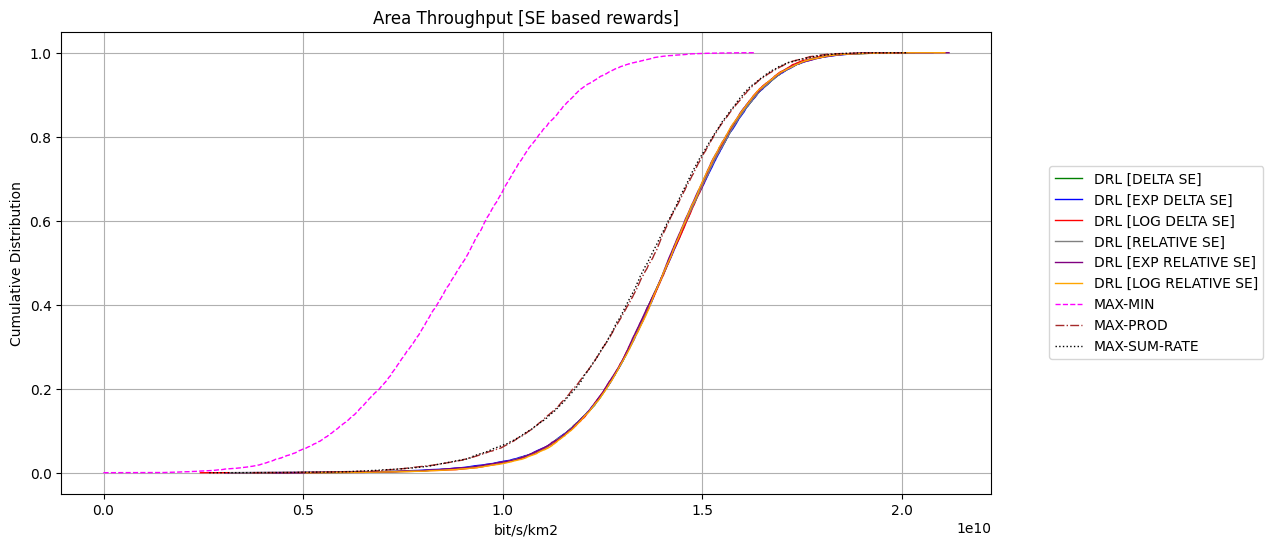

In [49]:
plot_cdf_pdf(data=ATHP_DATA_R_SE, title='Area Throughput [SE based rewards]', xlabel='bit/s/km2', operation=None, cumulative=True)

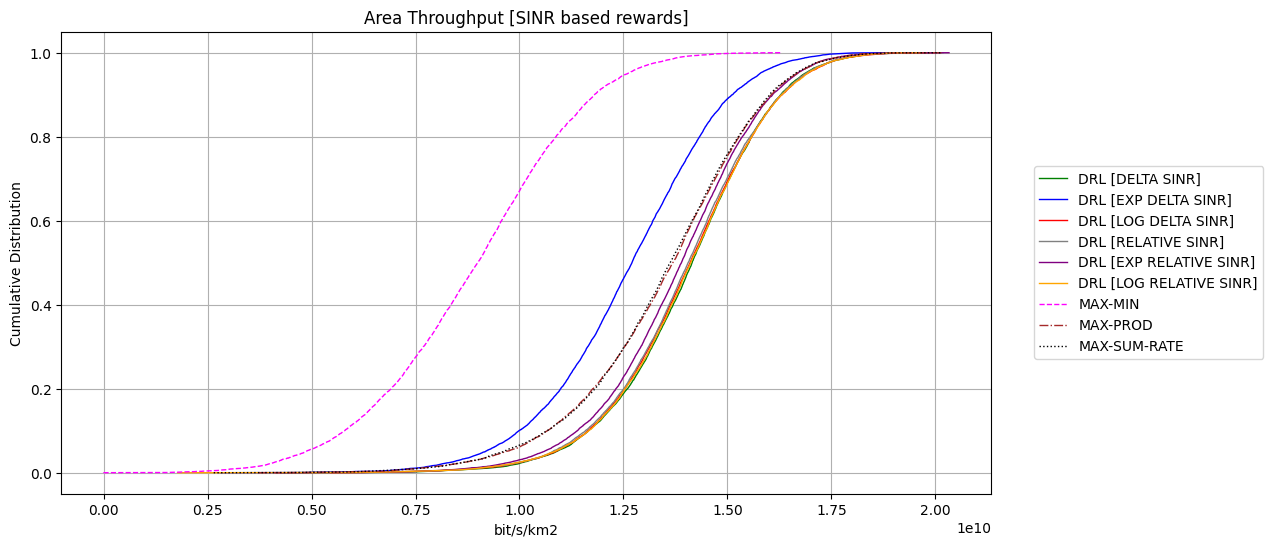

In [50]:
plot_cdf_pdf(data=ATHP_DATA_R_SINR, title='Area Throughput [SINR based rewards]', xlabel='bit/s/km2', operation=None, cumulative=True)

## Uplink Power

In [51]:
# load data from csv files
MODEL_DELTA_SE_POWERs                  = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_DELTA_SE_POWERs.csv', index_col=0)
MODEL_EXP_DELTA_CLIP_SE_POWERs         = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_EXP_DELTA_CLIP_SEv0_POWERs.csv', index_col=0)
MODEL_LOG_DELTA_SE_POWERs              = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_LOG_DELTA_SE_POWERs.csv', index_col=0)
MODEL_RELATIVE_SE_POWERs               = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_DELTA_SE_POWERs.csv', index_col=0)
MODEL_EXP_RELATIVE_CLIP_SE_POWERs      = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_RELATIVE_SE_POWERs.csv', index_col=0)
MODEL_LOG_RELATIVE_SE_POWERs           = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_LOG_RELATIVE_SE_POWERs.csv', index_col=0)
MODEL_DELTA_SINR_POWERs                = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_DELTA_SINR_POWERs.csv', index_col=0)
MODEL_EXP_DELTA_CLIP_SINR_POWERs       = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_EXP_DELTA_CLIP_SINR_POWERs.csv', index_col=0)
MODEL_LOG_DELTA_SINR_POWERs            = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_LOG_DELTA_SINR_POWERs.csv', index_col=0)
MODEL_RELATIVE_SINR_POWERs             = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_RELATIVE_SINR_POWERs.csv', index_col=0)
MODEL_EXP_RELATIVE_CLIP_SINR_POWERs    = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_EXP_RELATIVE_CLIP_SINR_POWERs.csv', index_col=0)
MODEL_LOG_RELATIVE_SINR_POWERs         = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_LOG_RELATIVE_SINR_POWERs.csv', index_col=0)

MAXMIN_POWERs  =  pd.read_csv(f'{results_dir}/{results_folder}/MAXMIN_POWERs.csv', index_col=0)
MAXPROD_POWERs = pd.read_csv(f'{results_dir}/{results_folder}/MAXPROD_POWERs.csv', index_col=0)
SUMRATE_POWERs = pd.read_csv(f'{results_dir}/{results_folder}/SUMRATE_POWERs.csv', index_col=0)

In [52]:
P_DATA_R_SE = {
    'MODEL_DELTA_SE_POWERs':               {'label': 'DRL [DELTA SE]',             'data': MODEL_DELTA_SE_POWERs,                 'color': 'green',   'linestyle': '-',  'linewidth': 1},
    'MODEL_EXP_DELTA_CLIP_SE_POWERs':      {'label': 'DRL [EXP DELTA SE]',         'data': MODEL_EXP_DELTA_CLIP_SE_POWERs,        'color': 'blue',    'linestyle': '-',  'linewidth': 1},
    'MODEL_LOG_DELTA_SE_POWERs':           {'label': 'DRL [LOG DELTA SE]',         'data': MODEL_LOG_DELTA_SE_POWERs,             'color': 'red',     'linestyle': '-',  'linewidth': 1},
    'MODEL_RELATIVE_SE_POWERs':            {'label': 'DRL [RELATIVE SE]',          'data': MODEL_RELATIVE_SE_POWERs,              'color': 'gray',    'linestyle': '-',  'linewidth': 1},
    'MODEL_EXP_RELATIVE_CLIP_SE_POWERs':   {'label': 'DRL [EXP RELATIVE SE]',      'data': MODEL_EXP_RELATIVE_CLIP_SE_POWERs,     'color': 'purple',  'linestyle': '-',  'linewidth': 1},
    'MODEL_LOG_RELATIVE_SE_POWERs':        {'label': 'DRL [LOG RELATIVE SE]',      'data': MODEL_LOG_RELATIVE_SE_POWERs,          'color': 'orange',  'linestyle': '-',  'linewidth': 1},
    'MAXMIN_POWERs':                       {'label': 'MAX-MIN',                    'data': MAXMIN_POWERs,                         'color': 'magenta', 'linestyle': '--', 'linewidth': 1},
    'MAXPROD_POWERs':                      {'label': 'MAX-PROD',                   'data': MAXPROD_POWERs,                        'color': 'brown',   'linestyle': '-.', 'linewidth': 1},
    'SUMRATE_POWERs':                      {'label': 'MAX-SUM-RATE',               'data': SUMRATE_POWERs,                        'color': 'black',   'linestyle': ':',  'linewidth': 1},
}

P_DATA_R_SINR = {
    'MODEL_DELTA_SINR_POWERs':             {'label': 'DRL [DELTA SINR]',           'data': MODEL_DELTA_SINR_POWERs,               'color': 'green',   'linestyle': '-',  'linewidth': 1},
    'MODEL_EXP_DELTA_CLIP_SINR_POWERs':    {'label': 'DRL [EXP DELTA SINR]',       'data': MODEL_EXP_DELTA_CLIP_SINR_POWERs,      'color': 'blue',    'linestyle': '-',  'linewidth': 1},
    'MODEL_LOG_DELTA_SINR_POWERs':         {'label': 'DRL [LOG DELTA SINR]',       'data': MODEL_LOG_DELTA_SINR_POWERs,           'color': 'red',     'linestyle': '-',  'linewidth': 1},
    'MODEL_RELATIVE_SINR_POWERs':          {'label': 'DRL [RELATIVE SINR]',        'data': MODEL_RELATIVE_SINR_POWERs,            'color': 'gray',    'linestyle': '-',  'linewidth': 1},
    'MODEL_EXP_RELATIVE_CLIP_SINR_POWERs': {'label': 'DRL [EXP RELATIVE SINR]',    'data': MODEL_EXP_RELATIVE_CLIP_SINR_POWERs,   'color': 'purple',  'linestyle': '-',  'linewidth': 1},
    'MODEL_LOG_RELATIVE_SINR_POWERs':      {'label': 'DRL [LOG RELATIVE SINR]',    'data': MODEL_LOG_RELATIVE_SINR_POWERs,        'color': 'orange',  'linestyle': '-',  'linewidth': 1},
    'MAXMIN_POWERs':                       {'label': 'MAX-MIN',                    'data': MAXMIN_POWERs,                         'color': 'magenta', 'linestyle': '--', 'linewidth': 1},
    'MAXPROD_POWERs':                      {'label': 'MAX-PROD',                   'data': MAXPROD_POWERs,                        'color': 'brown',   'linestyle': '-.', 'linewidth': 1},
    'SUMRATE_POWERs':                      {'label': 'MAX-SUM-RATE',               'data': SUMRATE_POWERs,                        'color': 'black',   'linestyle': ':',  'linewidth': 1},
}

### Uplink Power

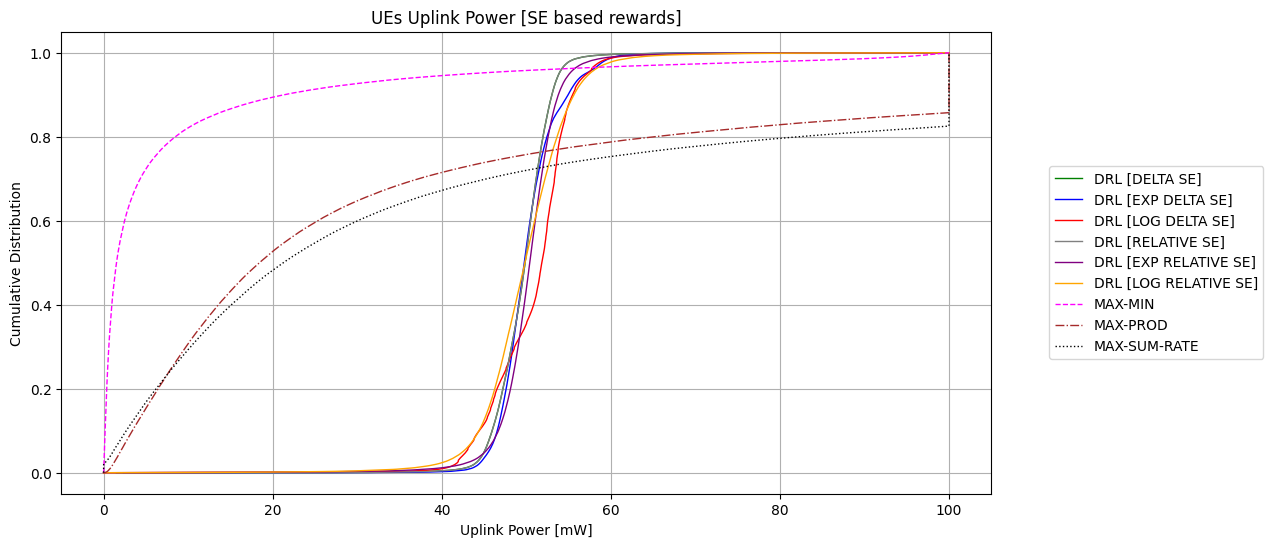

In [53]:
plot_cdf_pdf(data=P_DATA_R_SE, title='UEs Uplink Power [SE based rewards]', xlabel='Uplink Power [mW]', operation=None, cumulative=True)

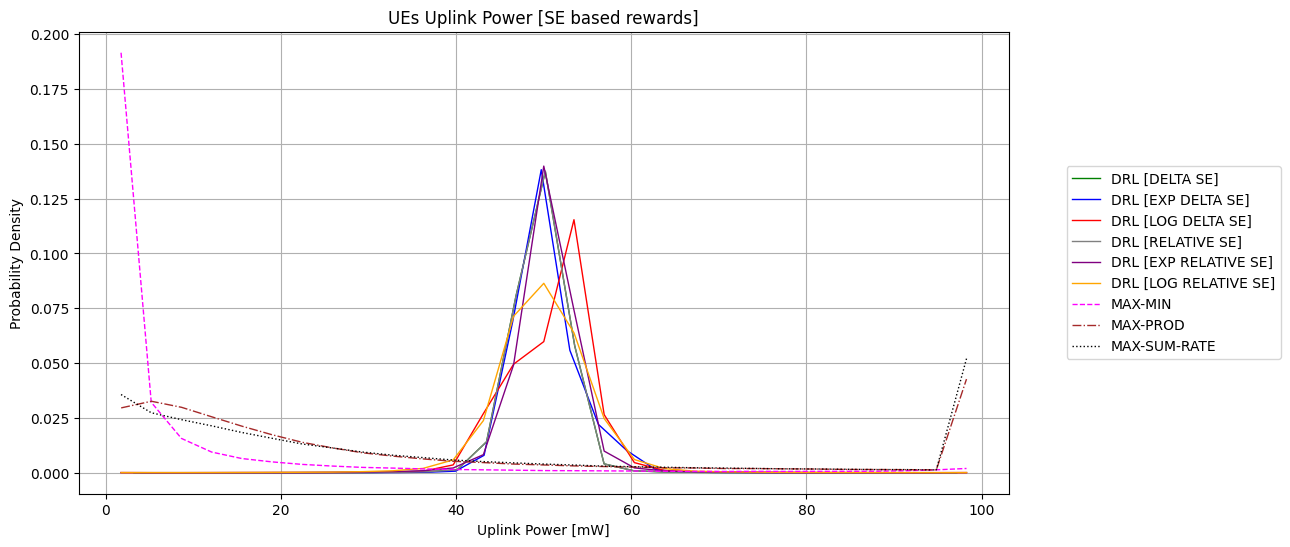

In [54]:
plot_cdf_pdf(data=P_DATA_R_SE, title='UEs Uplink Power [SE based rewards]', xlabel='Uplink Power [mW]', operation=None, cumulative=False)

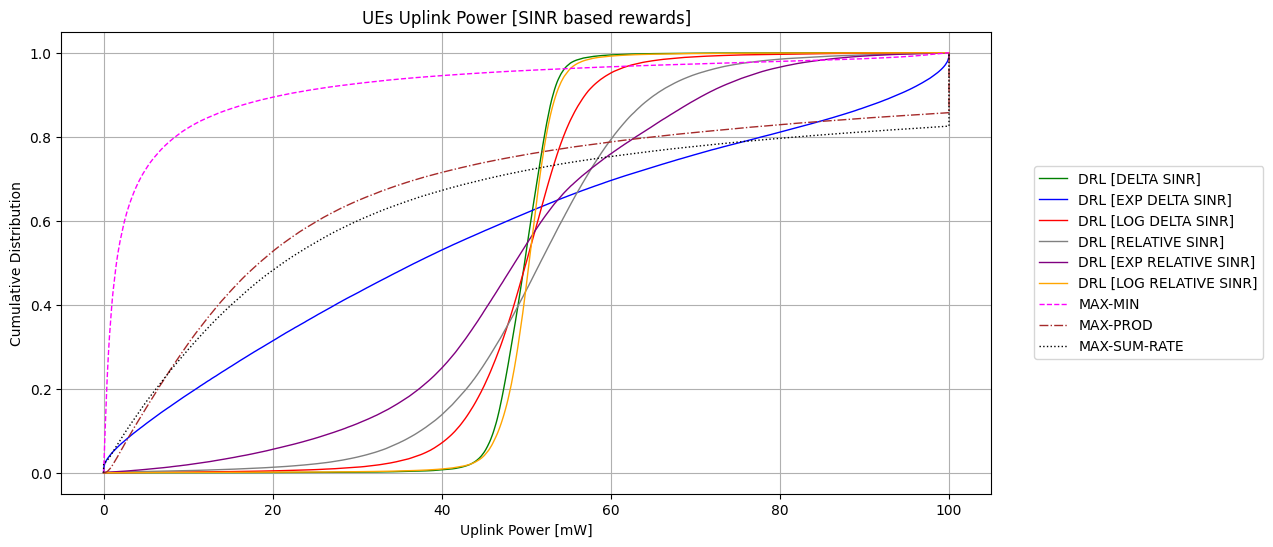

In [55]:
plot_cdf_pdf(data=P_DATA_R_SINR, title='UEs Uplink Power [SINR based rewards]', xlabel='Uplink Power [mW]', operation=None, cumulative=True)

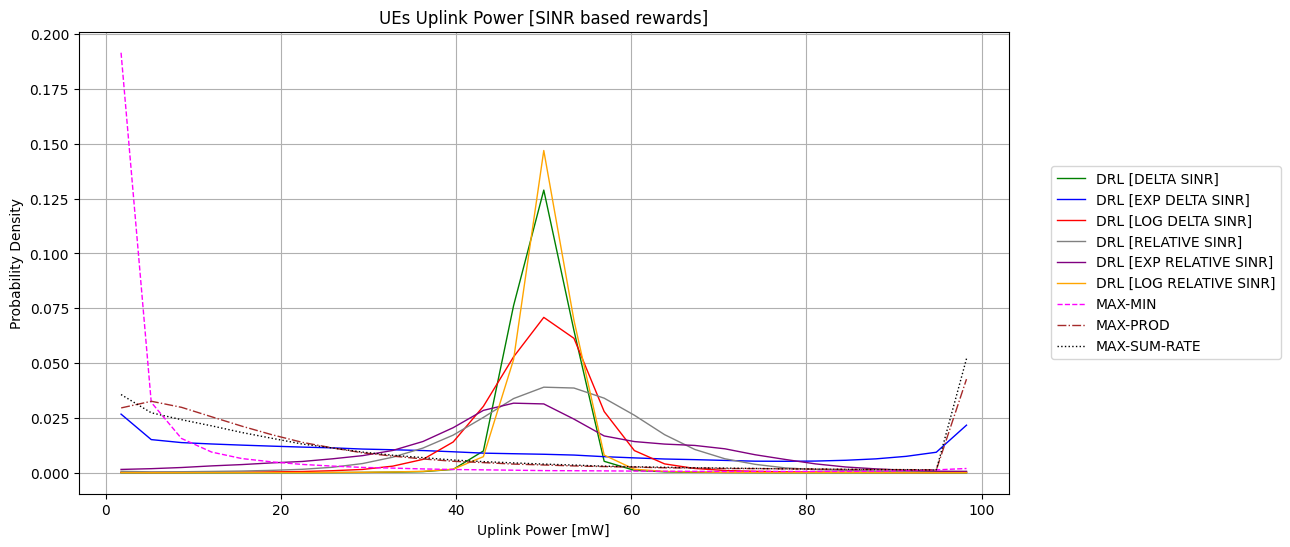

In [56]:
plot_cdf_pdf(data=P_DATA_R_SINR, title='UEs Uplink Power [SINR based rewards]', xlabel='Uplink Power [mW]', operation=None, cumulative=False)

### Mean Uplink Power

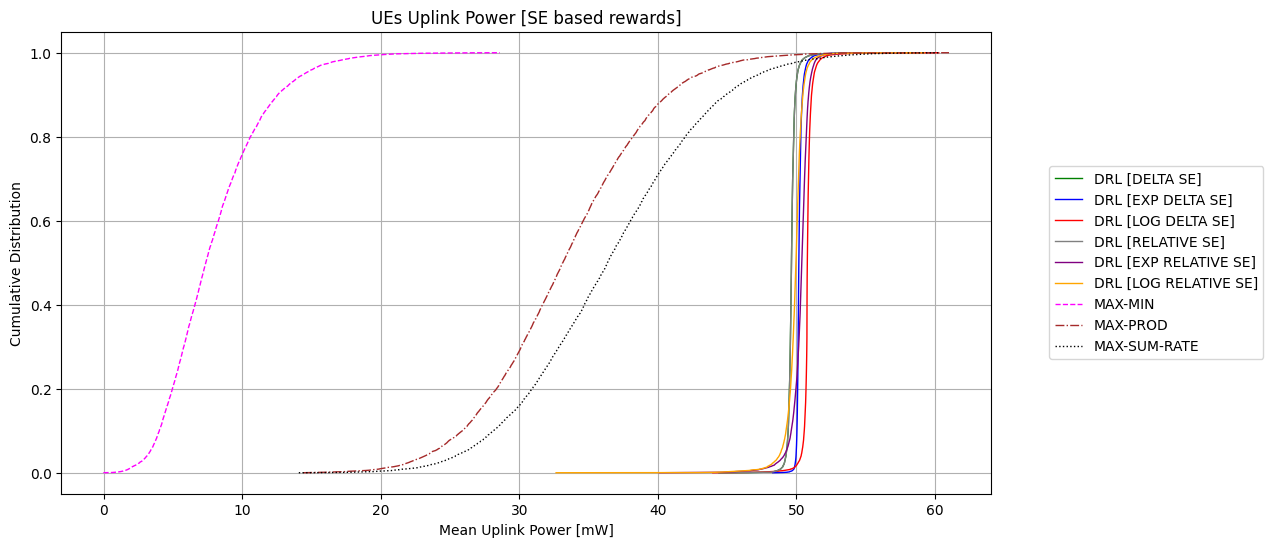

In [57]:
plot_cdf_pdf(data=P_DATA_R_SE, title='UEs Uplink Power [SE based rewards]', xlabel='Mean Uplink Power [mW]', operation='mean', cumulative=True)

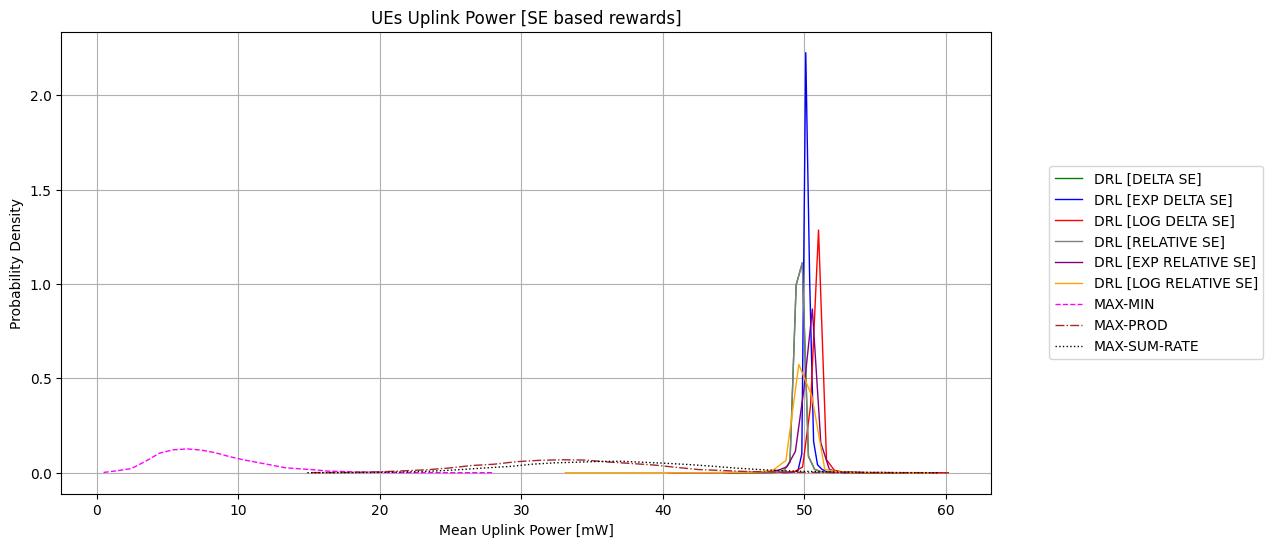

In [58]:
plot_cdf_pdf(data=P_DATA_R_SE, title='UEs Uplink Power [SE based rewards]', xlabel='Mean Uplink Power [mW]', operation='mean', cumulative=False)

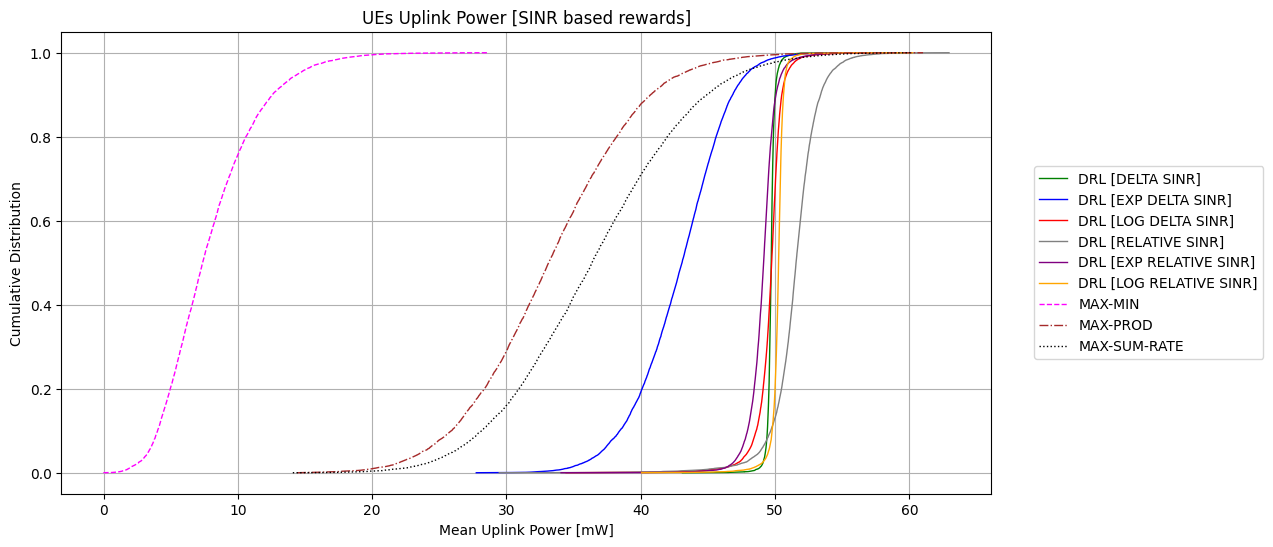

In [59]:
plot_cdf_pdf(data=P_DATA_R_SINR, title='UEs Uplink Power [SINR based rewards]', xlabel='Mean Uplink Power [mW]', operation='mean', cumulative=True)

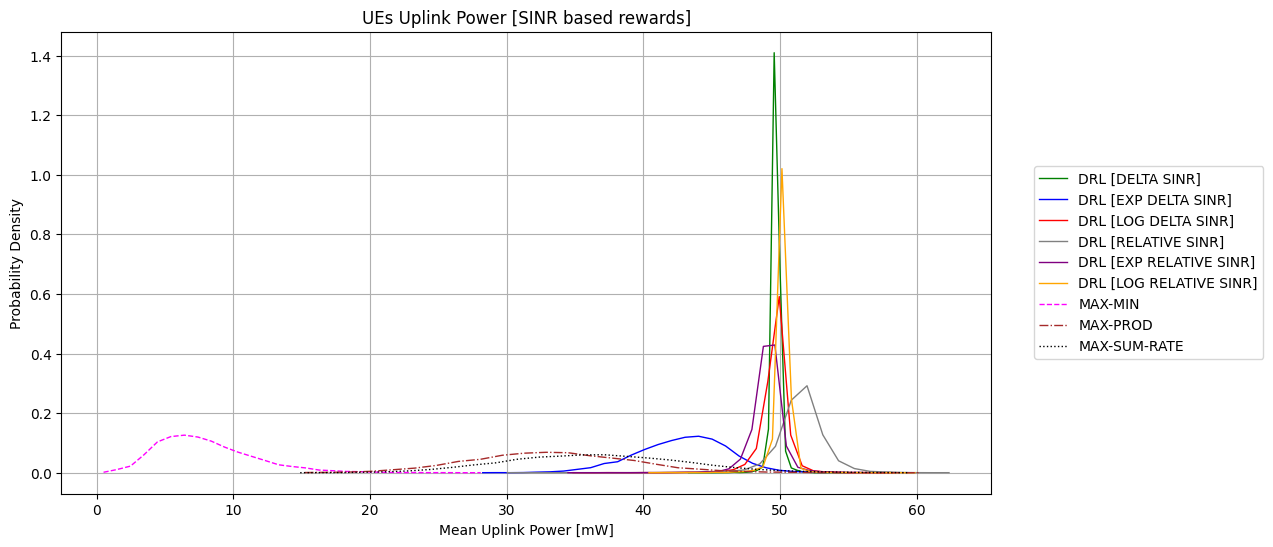

In [60]:
plot_cdf_pdf(data=P_DATA_R_SINR, title='UEs Uplink Power [SINR based rewards]', xlabel='Mean Uplink Power [mW]', operation='mean', cumulative=False)

### Min Uplink Power

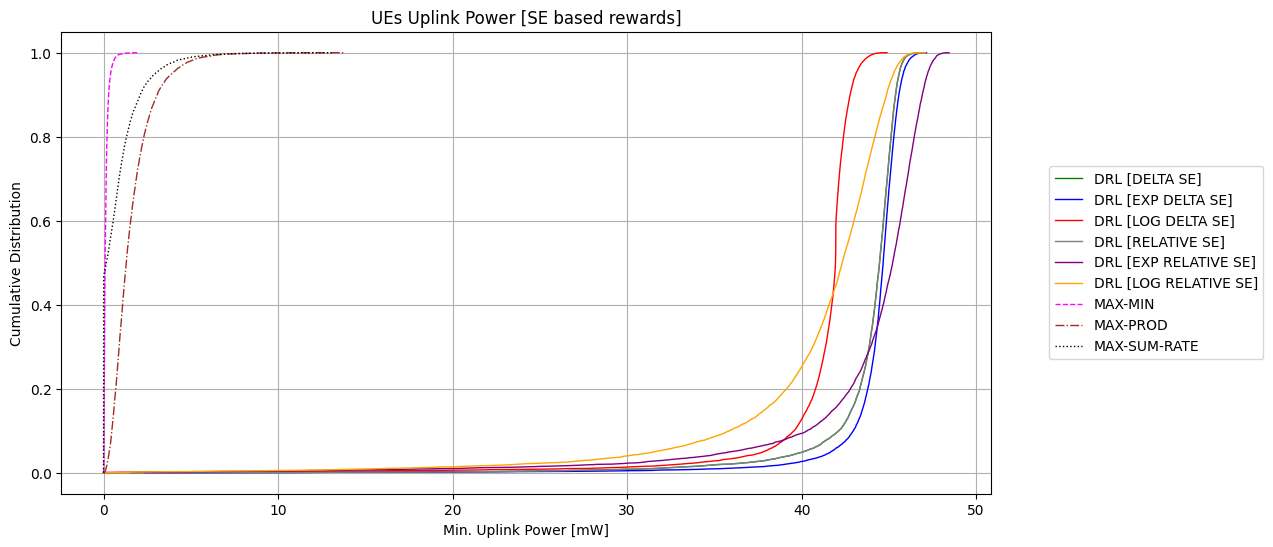

In [61]:
plot_cdf_pdf(data=P_DATA_R_SE, title='UEs Uplink Power [SE based rewards]', xlabel='Min. Uplink Power [mW]', operation='min', cumulative=True)

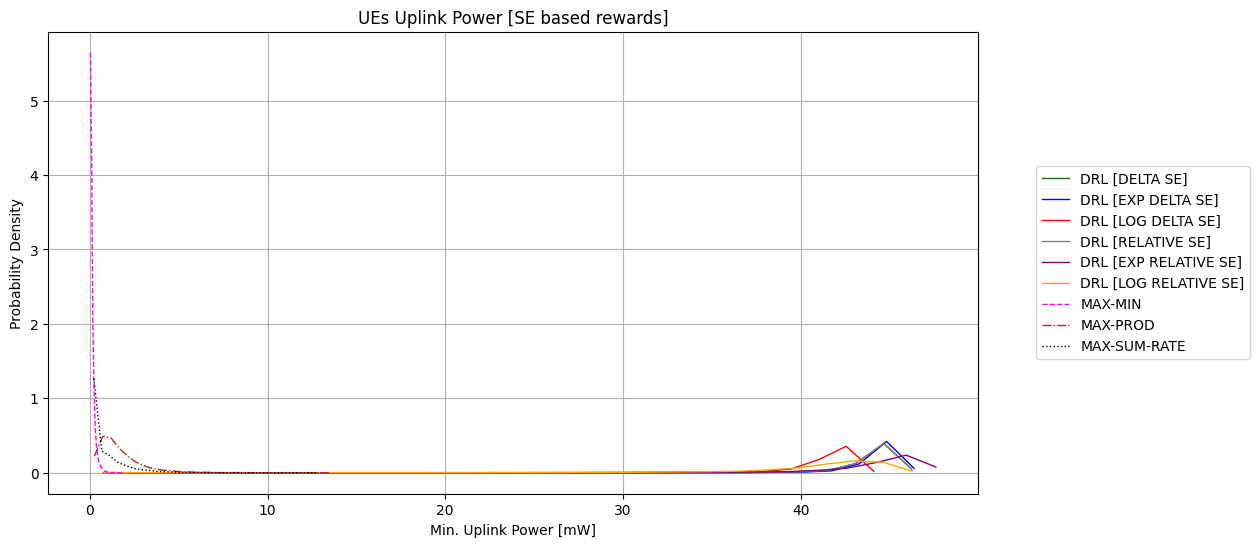

In [62]:
plot_cdf_pdf(data=P_DATA_R_SE, title='UEs Uplink Power [SE based rewards]', xlabel='Min. Uplink Power [mW]', operation='min', cumulative=False)

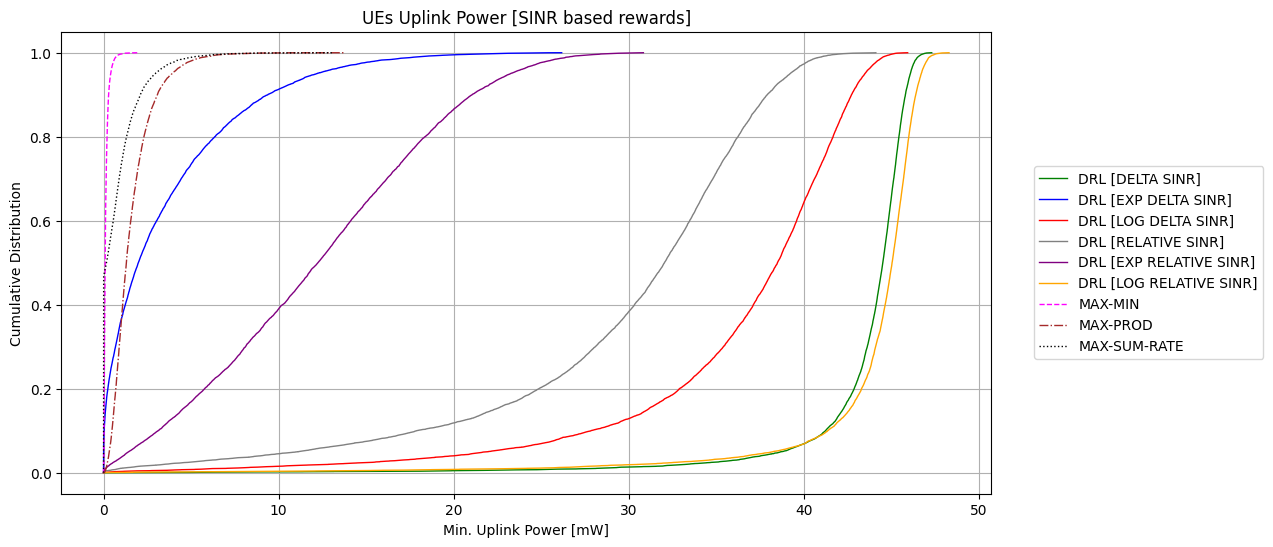

In [63]:
plot_cdf_pdf(data=P_DATA_R_SINR, title='UEs Uplink Power [SINR based rewards]', xlabel='Min. Uplink Power [mW]', operation='min', cumulative=True)

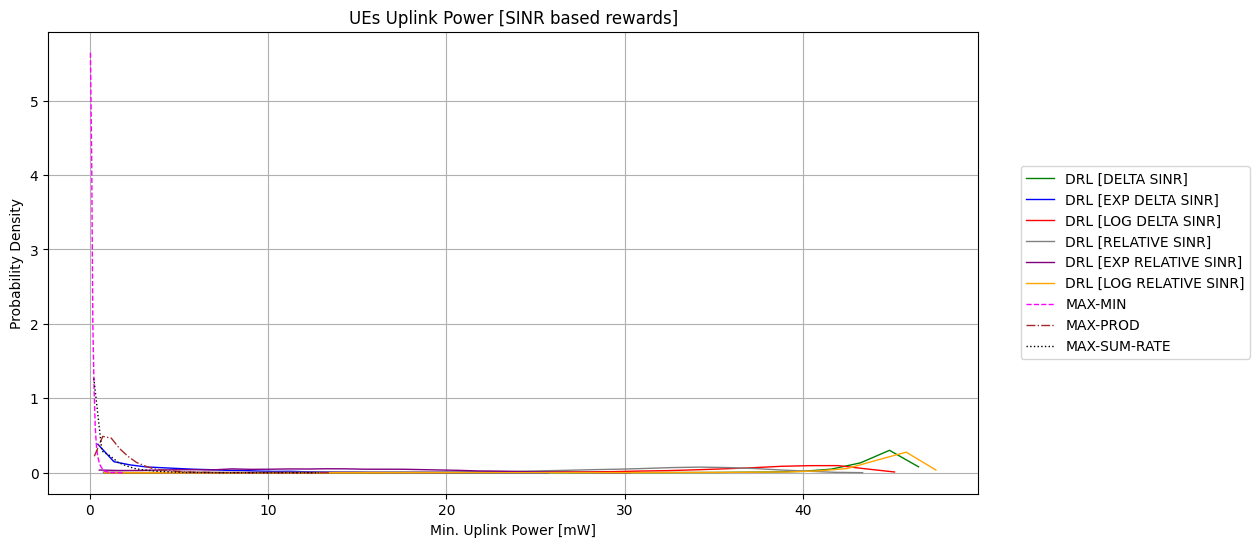

In [64]:
plot_cdf_pdf(data=P_DATA_R_SINR, title='UEs Uplink Power [SINR based rewards]', xlabel='Min. Uplink Power [mW]', operation='min', cumulative=False)

### Max Uplink Power

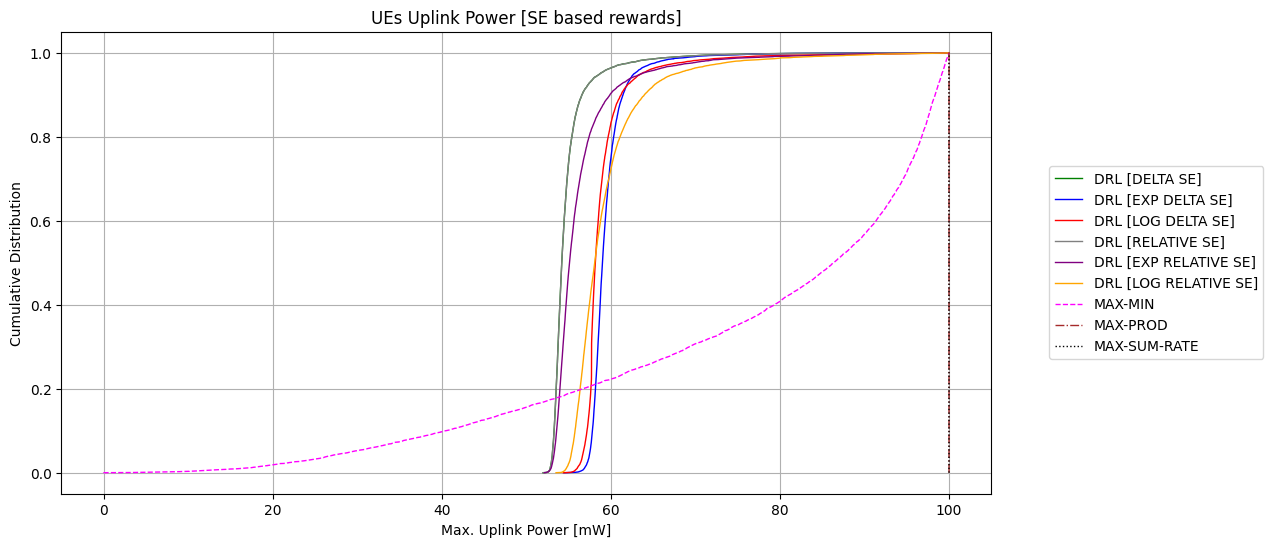

In [65]:
plot_cdf_pdf(data=P_DATA_R_SE, title='UEs Uplink Power [SE based rewards]', xlabel='Max. Uplink Power [mW]', operation='max', cumulative=True)

Data for MAXPROD_POWERs lacks variability, skipping PDF plot.
Data for SUMRATE_POWERs lacks variability, skipping PDF plot.


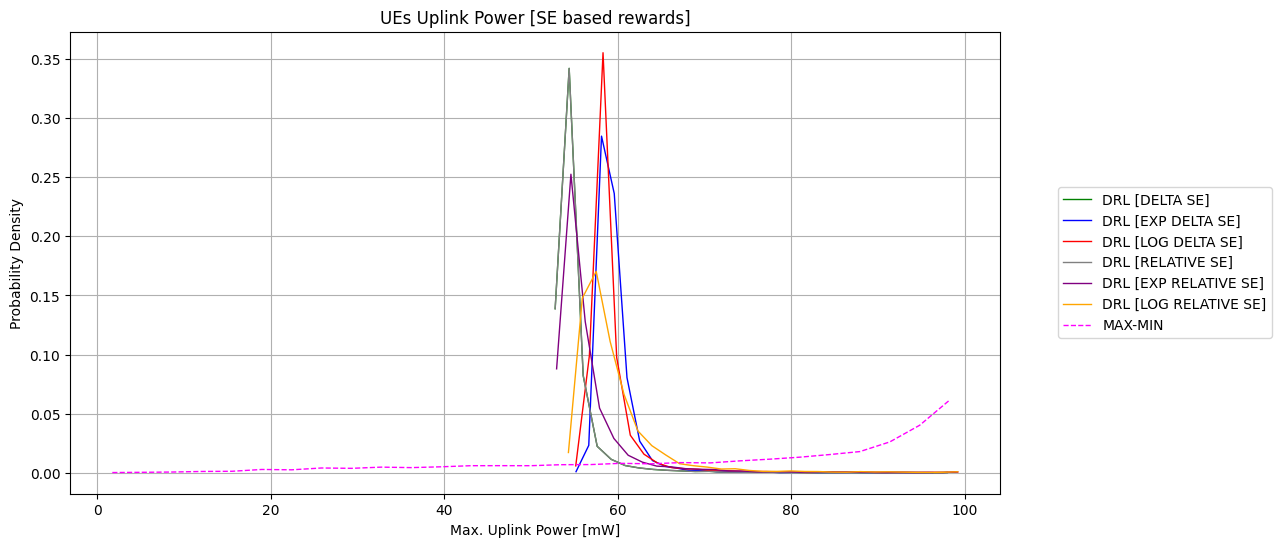

In [66]:
plot_cdf_pdf(data=P_DATA_R_SE, title='UEs Uplink Power [SE based rewards]', xlabel='Max. Uplink Power [mW]', operation='max', cumulative=False)

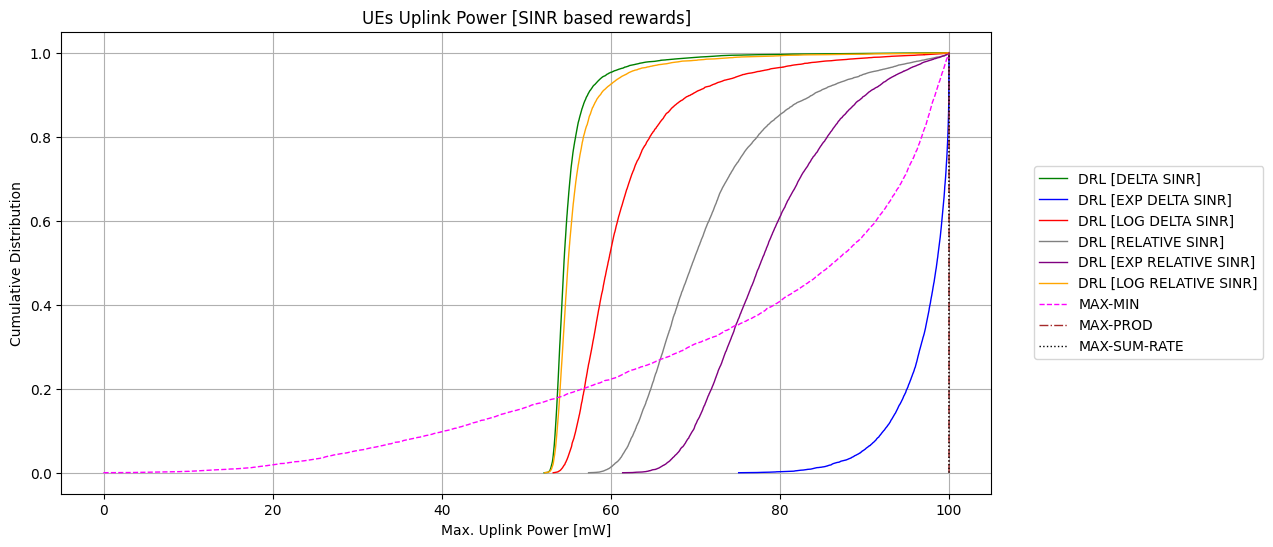

In [67]:
plot_cdf_pdf(data=P_DATA_R_SINR, title='UEs Uplink Power [SINR based rewards]', xlabel='Max. Uplink Power [mW]', operation='max', cumulative=True)

Data for MAXPROD_POWERs lacks variability, skipping PDF plot.
Data for SUMRATE_POWERs lacks variability, skipping PDF plot.


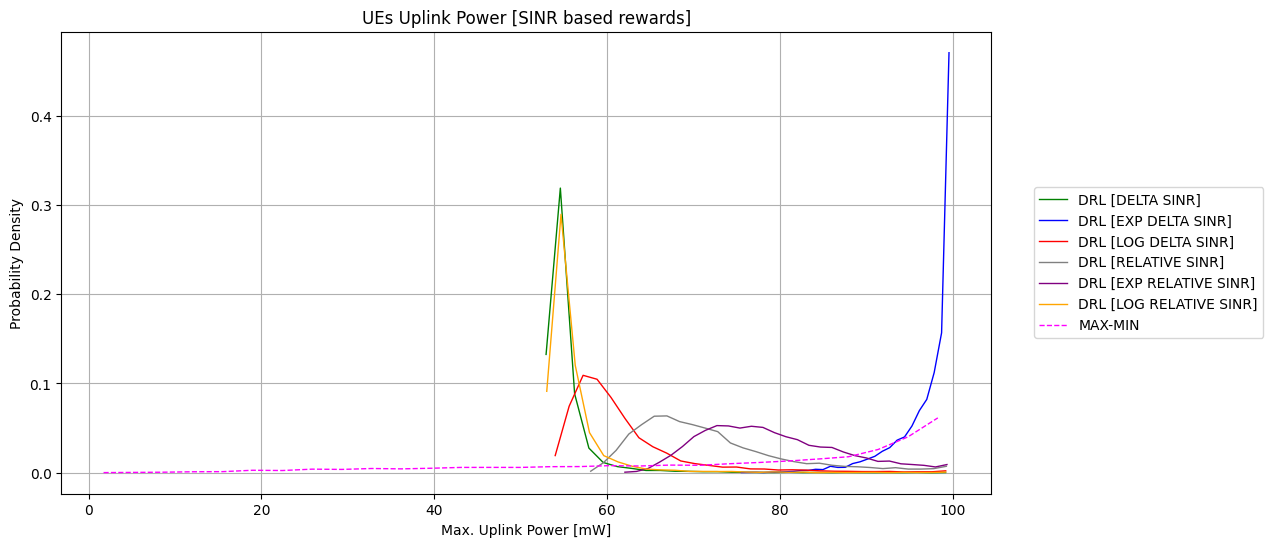

In [68]:
plot_cdf_pdf(data=P_DATA_R_SINR, title='UEs Uplink Power [SINR based rewards]', xlabel='Max. Uplink Power [mW]', operation='max', cumulative=False)

### Sum Uplink Power

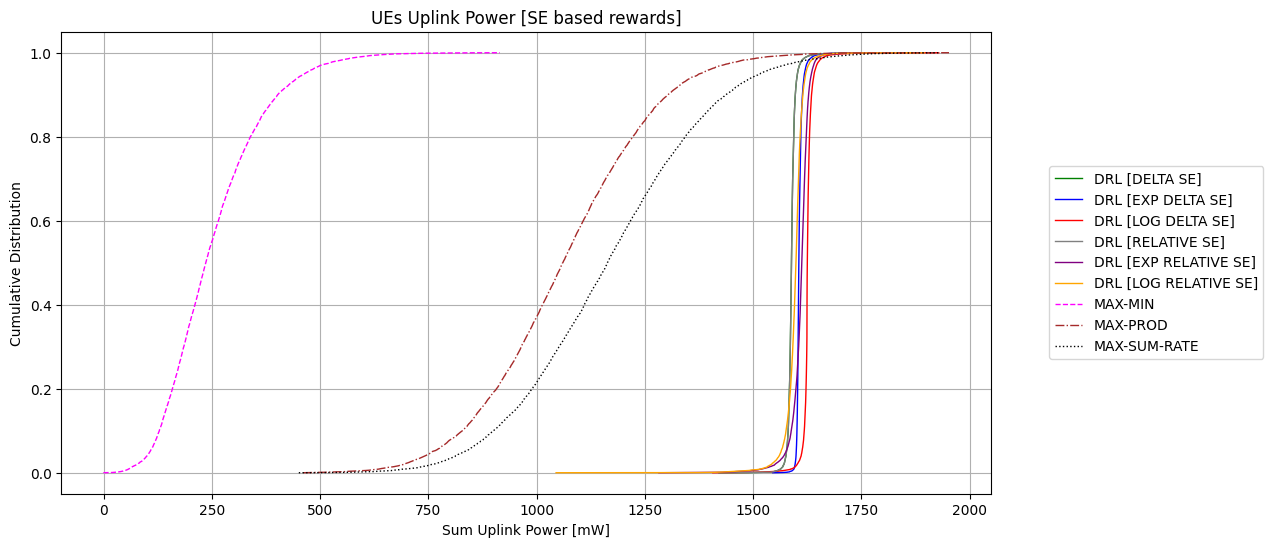

In [69]:
plot_cdf_pdf(data=P_DATA_R_SE, title='UEs Uplink Power [SE based rewards]', xlabel='Sum Uplink Power [mW]', operation='sum', cumulative=True)

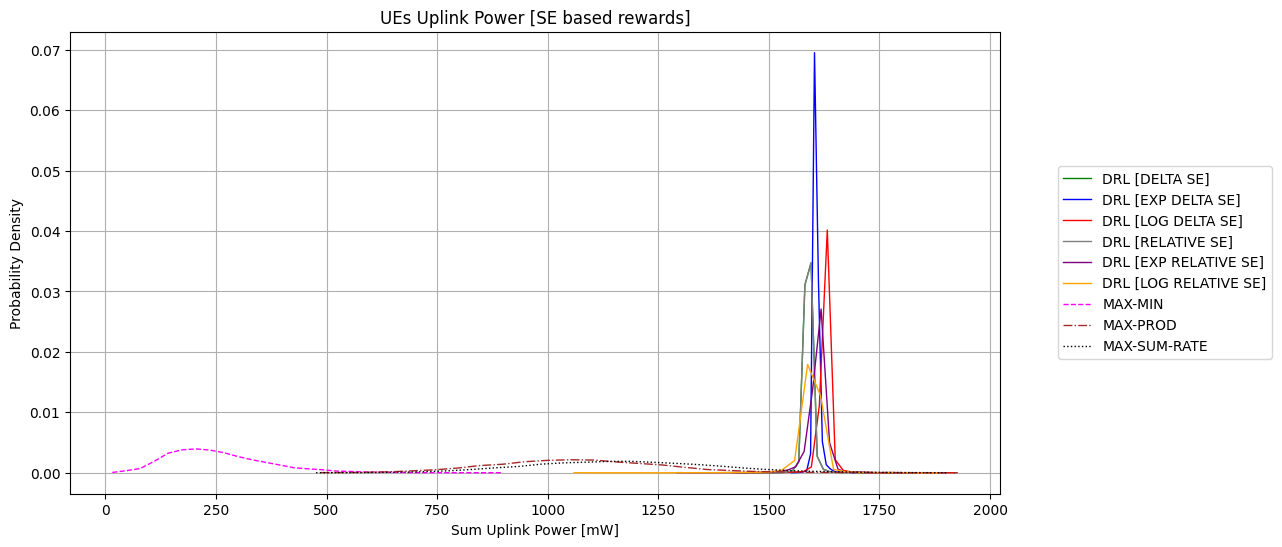

In [70]:
plot_cdf_pdf(data=P_DATA_R_SE, title='UEs Uplink Power [SE based rewards]', xlabel='Sum Uplink Power [mW]', operation='sum', cumulative=False)

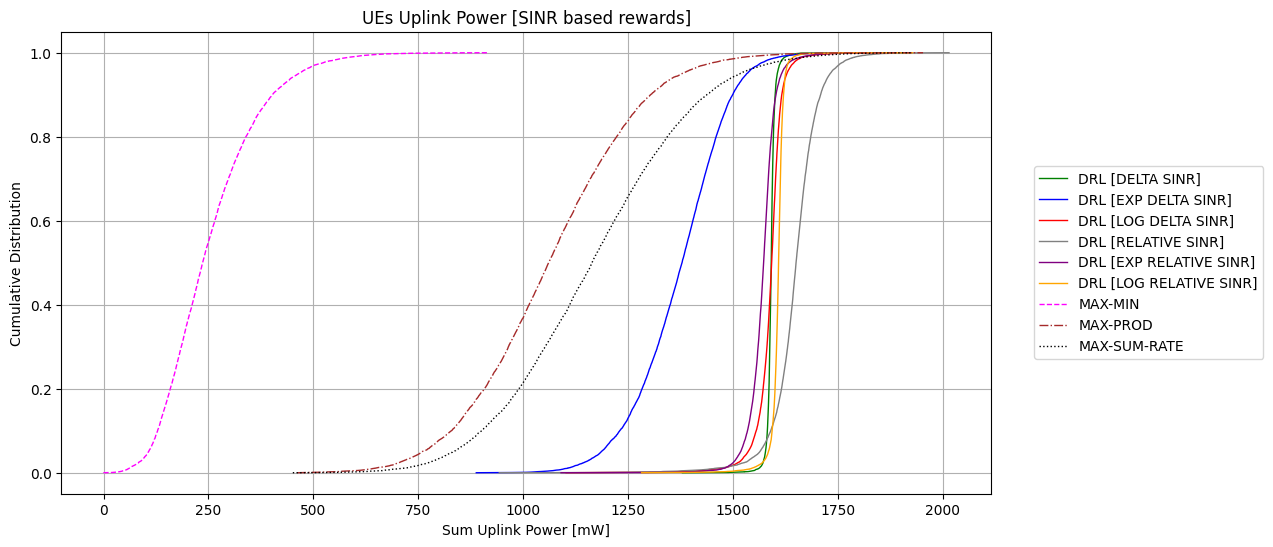

In [71]:
plot_cdf_pdf(data=P_DATA_R_SINR, title='UEs Uplink Power [SINR based rewards]', xlabel='Sum Uplink Power [mW]', operation='sum', cumulative=True)

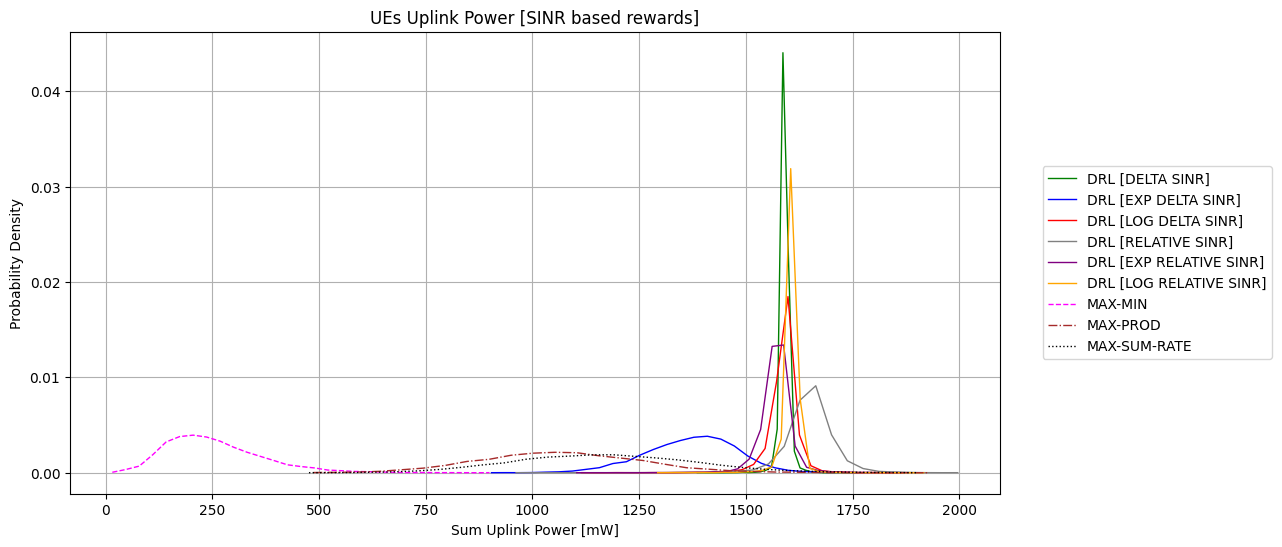

In [72]:
plot_cdf_pdf(data=P_DATA_R_SINR, title='UEs Uplink Power [SINR based rewards]', xlabel='Sum Uplink Power [mW]', operation='sum', cumulative=False)

## SINR

In [73]:
# load data from csv files
MODEL_DELTA_SE_SINRs                  = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_DELTA_SE_SINRs.csv', index_col=0)
MODEL_EXP_DELTA_CLIP_SE_SINRs         = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_EXP_DELTA_CLIP_SEv0_SINRs.csv', index_col=0)
MODEL_LOG_DELTA_SE_SINRs              = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_LOG_DELTA_SE_SINRs.csv', index_col=0)
MODEL_RELATIVE_SE_SINRs               = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_DELTA_SE_SINRs.csv', index_col=0)
MODEL_EXP_RELATIVE_CLIP_SE_SINRs      = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_RELATIVE_SE_SINRs.csv', index_col=0)
MODEL_LOG_RELATIVE_SE_SINRs           = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_LOG_RELATIVE_SE_SINRs.csv', index_col=0)
MODEL_DELTA_SINR_SINRs                = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_DELTA_SINR_SINRs.csv', index_col=0)
MODEL_EXP_DELTA_CLIP_SINR_SINRs       = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_EXP_DELTA_CLIP_SINR_SINRs.csv', index_col=0)
MODEL_LOG_DELTA_SINR_SINRs            = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_LOG_DELTA_SINR_SINRs.csv', index_col=0)
MODEL_RELATIVE_SINR_SINRs             = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_RELATIVE_SINR_SINRs.csv', index_col=0)
MODEL_EXP_RELATIVE_CLIP_SINR_SINRs    = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_EXP_RELATIVE_CLIP_SINR_SINRs.csv', index_col=0)
MODEL_LOG_RELATIVE_SINR_SINRs         = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_LOG_RELATIVE_SINR_SINRs.csv', index_col=0)

MAXMIN_SINRs  =  pd.read_csv(f'{results_dir}/{results_folder}/MAXMIN_SINRs.csv', index_col=0)
MAXPROD_SINRs = pd.read_csv(f'{results_dir}/{results_folder}/MAXPROD_SINRs.csv', index_col=0)
SUMRATE_SINRs = pd.read_csv(f'{results_dir}/{results_folder}/SUMRATE_SINRs.csv', index_col=0)

In [74]:
SINR_DATA_R_SE = {
    'MODEL_DELTA_SE_SINRs':               {'label': 'DRL [DELTA SE]',             'data': MODEL_DELTA_SE_SINRs,                 'color': 'green',   'linestyle': '-',  'linewidth': 1},
    'MODEL_EXP_DELTA_CLIP_SE_SINRs':      {'label': 'DRL [EXP DELTA SE]',         'data': MODEL_EXP_DELTA_CLIP_SE_SINRs,        'color': 'blue',    'linestyle': '-',  'linewidth': 1},
    'MODEL_LOG_DELTA_SE_SINRs':           {'label': 'DRL [LOG DELTA SE]',         'data': MODEL_LOG_DELTA_SE_SINRs,             'color': 'red',     'linestyle': '-',  'linewidth': 1},
    'MODEL_RELATIVE_SE_SINRs':            {'label': 'DRL [RELATIVE SE]',          'data': MODEL_RELATIVE_SE_SINRs,              'color': 'gray',    'linestyle': '-',  'linewidth': 1},
    'MODEL_EXP_RELATIVE_CLIP_SE_SINRs':   {'label': 'DRL [EXP RELATIVE SE]',      'data': MODEL_EXP_RELATIVE_CLIP_SE_SINRs,     'color': 'purple',  'linestyle': '-',  'linewidth': 1},
    'MODEL_LOG_RELATIVE_SE_SINRs':        {'label': 'DRL [LOG RELATIVE SE]',      'data': MODEL_LOG_RELATIVE_SE_SINRs,          'color': 'orange',  'linestyle': '-',  'linewidth': 1},
    'MAXMIN_SINRs':                       {'label': 'MAX-MIN',                    'data': MAXMIN_SINRs,                         'color': 'magenta', 'linestyle': '--', 'linewidth': 1},
    'MAXPROD_SINRs':                      {'label': 'MAX-PROD',                   'data': MAXPROD_SINRs,                        'color': 'brown',   'linestyle': '-.', 'linewidth': 1},
    'SUMRATE_SINRs':                      {'label': 'MAX-SUM-RATE',               'data': SUMRATE_SINRs,                        'color': 'black',   'linestyle': ':',  'linewidth': 1},
}

SINR_DATA_R_SINR = {
    'MODEL_DELTA_SINR_SINRs':             {'label': 'DRL [DELTA SINR]',           'data': MODEL_DELTA_SINR_SINRs,               'color': 'green',   'linestyle': '-',  'linewidth': 1},
    'MODEL_EXP_DELTA_CLIP_SINR_SINRs':    {'label': 'DRL [EXP DELTA SINR]',       'data': MODEL_EXP_DELTA_CLIP_SINR_SINRs,      'color': 'blue',    'linestyle': '-',  'linewidth': 1},
    'MODEL_LOG_DELTA_SINR_SINRs':         {'label': 'DRL [LOG DELTA SINR]',       'data': MODEL_LOG_DELTA_SINR_SINRs,           'color': 'red',     'linestyle': '-',  'linewidth': 1},
    'MODEL_RELATIVE_SINR_SINRs':          {'label': 'DRL [RELATIVE SINR]',        'data': MODEL_RELATIVE_SINR_SINRs,            'color': 'gray',    'linestyle': '-',  'linewidth': 1},
    'MODEL_EXP_RELATIVE_CLIP_SINR_SINRs': {'label': 'DRL [EXP RELATIVE SINR]',    'data': MODEL_EXP_RELATIVE_CLIP_SINR_SINRs,   'color': 'purple',  'linestyle': '-',  'linewidth': 1},
    'MODEL_LOG_RELATIVE_SINR_SINRs':      {'label': 'DRL [LOG RELATIVE SINR]',    'data': MODEL_LOG_RELATIVE_SINR_SINRs,        'color': 'orange',  'linestyle': '-',  'linewidth': 1},
    'MAXMIN_SINRs':                       {'label': 'MAX-MIN',                    'data': MAXMIN_SINRs,                         'color': 'magenta', 'linestyle': '--', 'linewidth': 1},
    'MAXPROD_SINRs':                      {'label': 'MAX-PROD',                   'data': MAXPROD_SINRs,                        'color': 'brown',   'linestyle': '-.', 'linewidth': 1},
    'SUMRATE_SINRs':                      {'label': 'MAX-SUM-RATE',               'data': SUMRATE_SINRs,                        'color': 'black',   'linestyle': ':',  'linewidth': 1},
}

### SINR

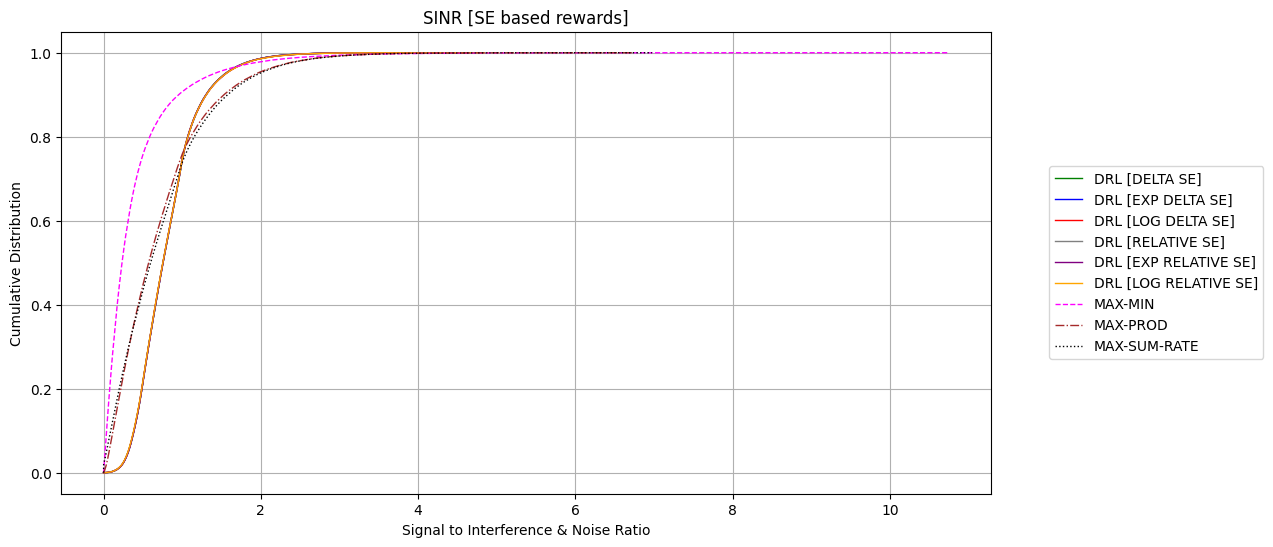

In [75]:
plot_cdf_pdf(data=SINR_DATA_R_SE, title='SINR [SE based rewards]', xlabel='Signal to Interference & Noise Ratio', operation=None, cumulative=True)

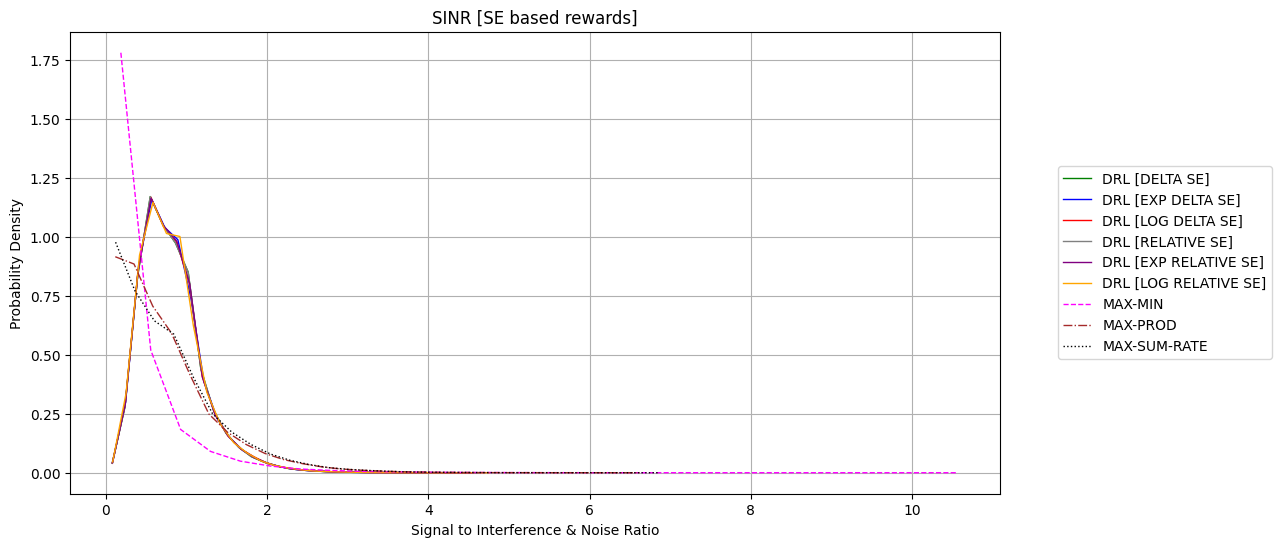

In [76]:
plot_cdf_pdf(data=SINR_DATA_R_SE, title='SINR [SE based rewards]', xlabel='Signal to Interference & Noise Ratio', operation=None, cumulative=False)

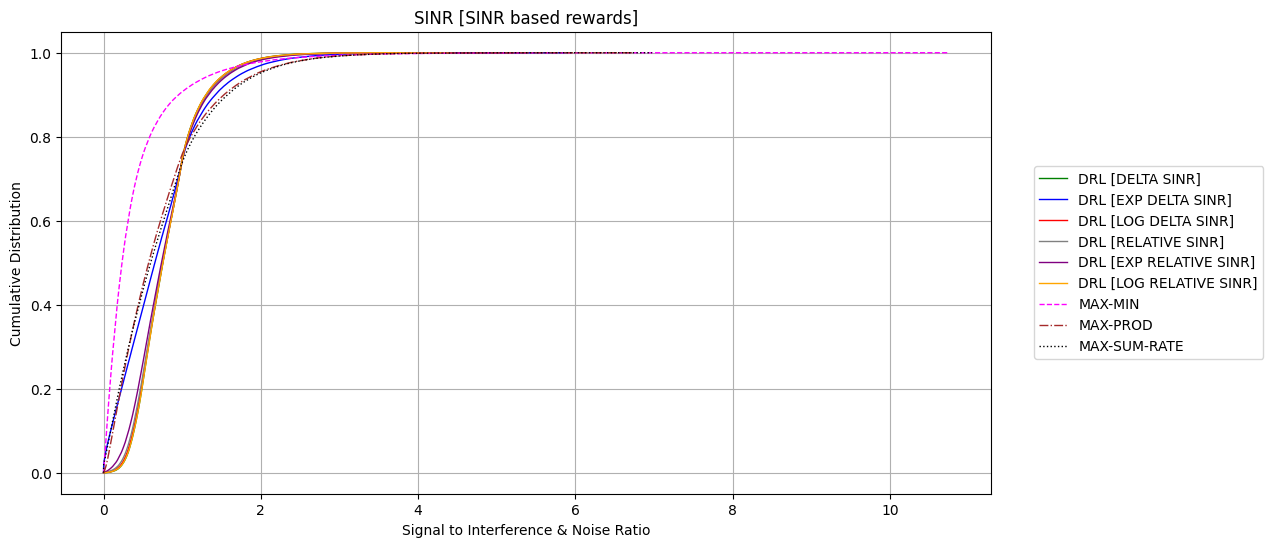

In [77]:
plot_cdf_pdf(data=SINR_DATA_R_SINR, title='SINR [SINR based rewards]', xlabel='Signal to Interference & Noise Ratio', operation=None, cumulative=True)

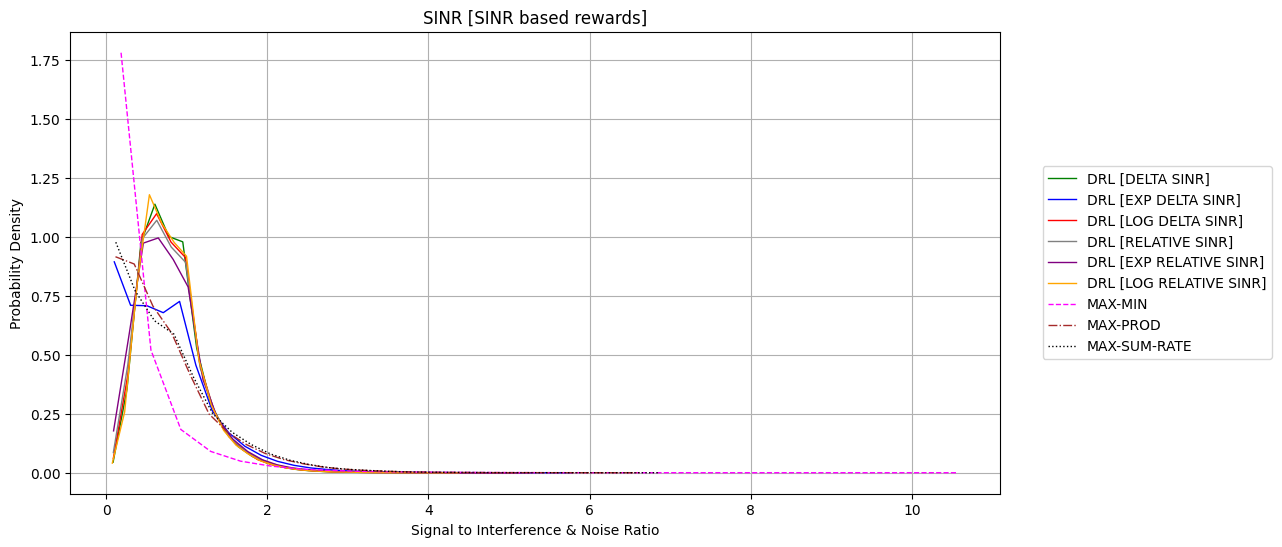

In [78]:
plot_cdf_pdf(data=SINR_DATA_R_SINR, title='SINR [SINR based rewards]', xlabel='Signal to Interference & Noise Ratio', operation=None, cumulative=False)

### Mean SINR

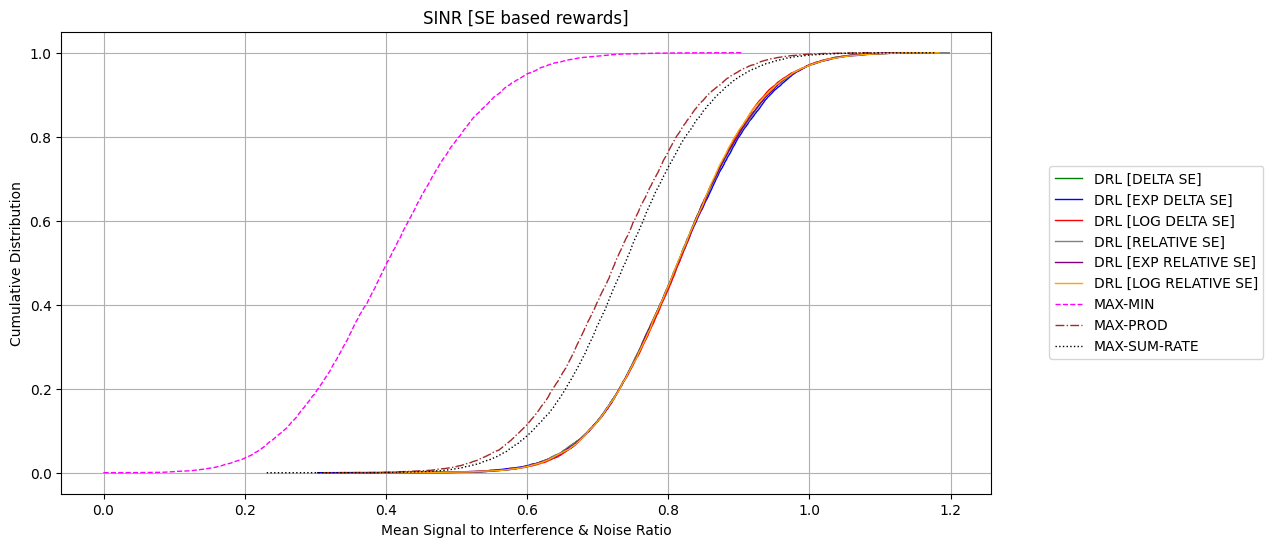

In [79]:
plot_cdf_pdf(data=SINR_DATA_R_SE, title='SINR [SE based rewards]', xlabel='Mean Signal to Interference & Noise Ratio', operation='mean', cumulative=True)

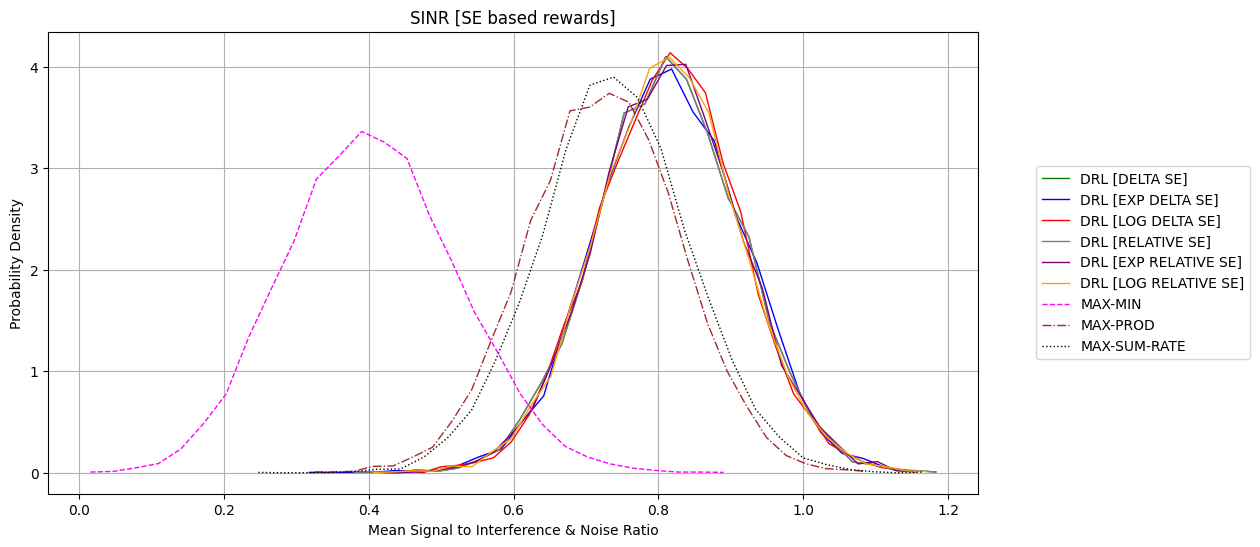

In [80]:
plot_cdf_pdf(data=SINR_DATA_R_SE, title='SINR [SE based rewards]', xlabel='Mean Signal to Interference & Noise Ratio', operation='mean', cumulative=False)

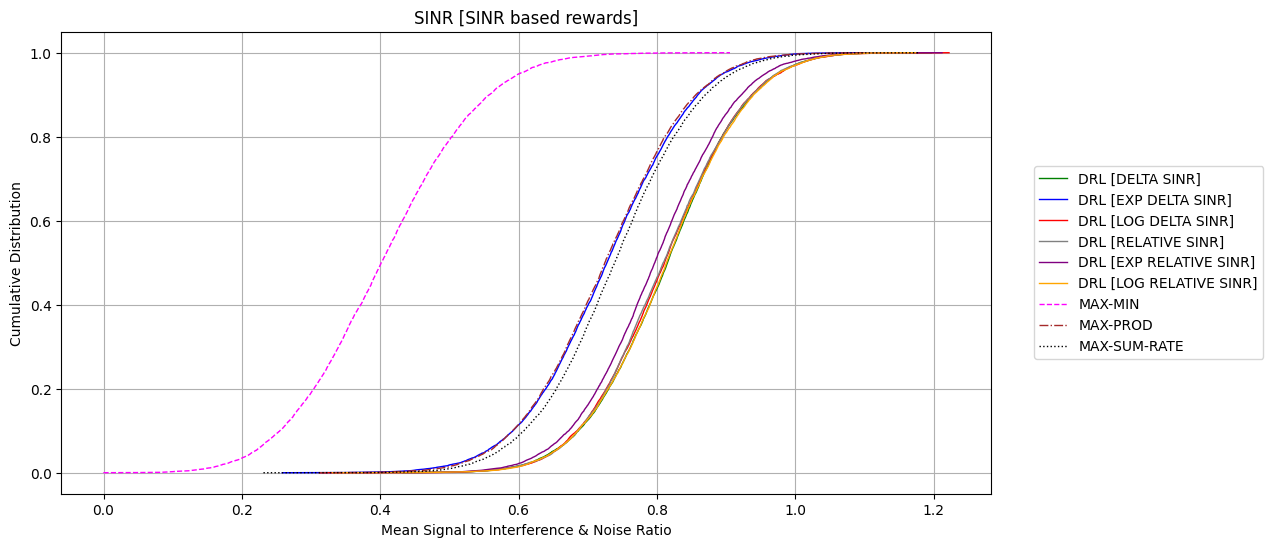

In [81]:
plot_cdf_pdf(data=SINR_DATA_R_SINR, title='SINR [SINR based rewards]', xlabel='Mean Signal to Interference & Noise Ratio', operation='mean', cumulative=True)

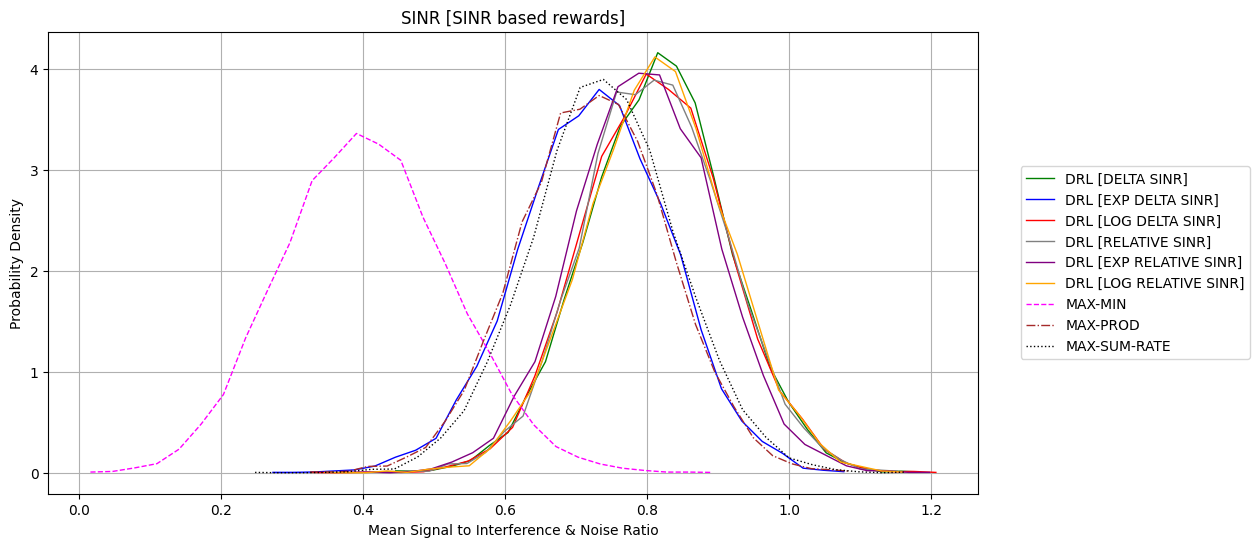

In [82]:
plot_cdf_pdf(data=SINR_DATA_R_SINR, title='SINR [SINR based rewards]', xlabel='Mean Signal to Interference & Noise Ratio', operation='mean', cumulative=False)

### Min SINR

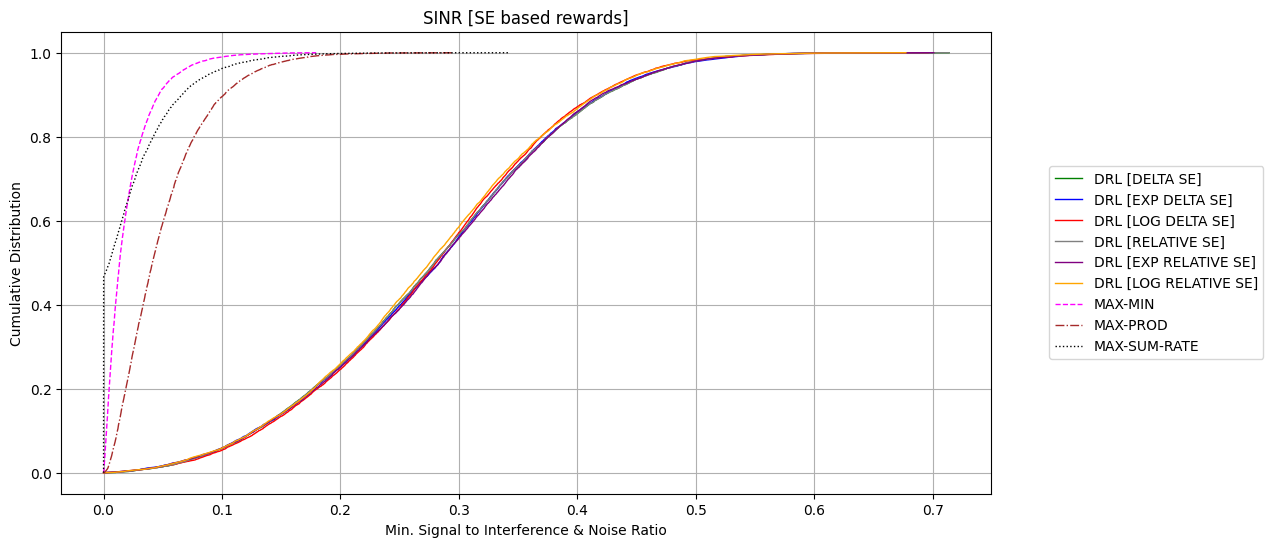

In [83]:
plot_cdf_pdf(data=SINR_DATA_R_SE, title='SINR [SE based rewards]', xlabel='Min. Signal to Interference & Noise Ratio', operation='min', cumulative=True)

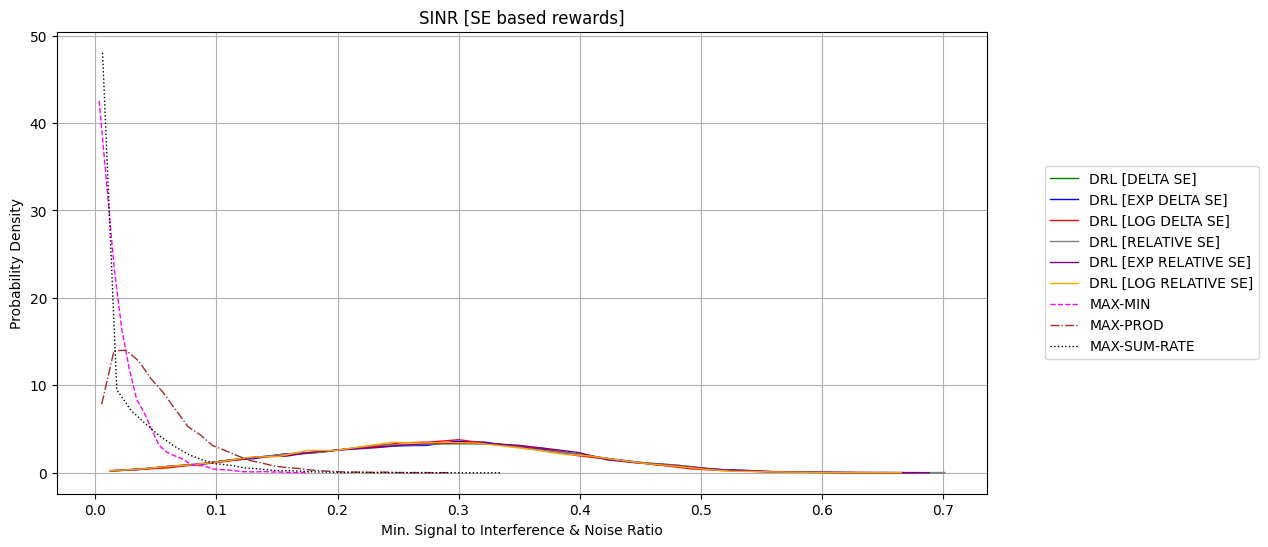

In [84]:
plot_cdf_pdf(data=SINR_DATA_R_SE, title='SINR [SE based rewards]', xlabel='Min. Signal to Interference & Noise Ratio', operation='min', cumulative=False)

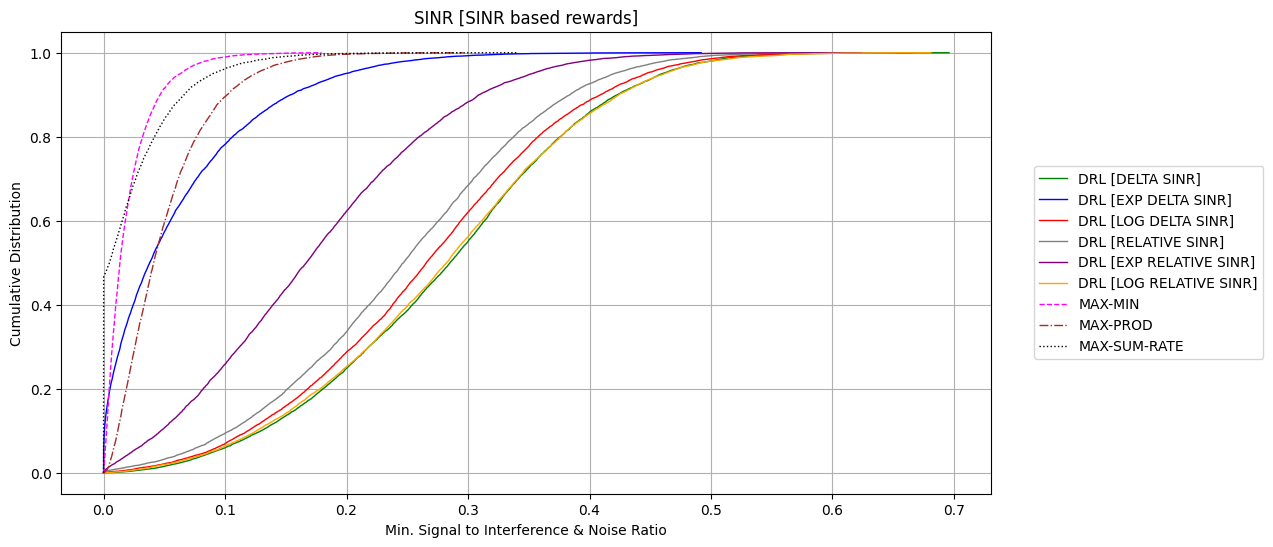

In [85]:
plot_cdf_pdf(data=SINR_DATA_R_SINR, title='SINR [SINR based rewards]', xlabel='Min. Signal to Interference & Noise Ratio', operation='min', cumulative=True)

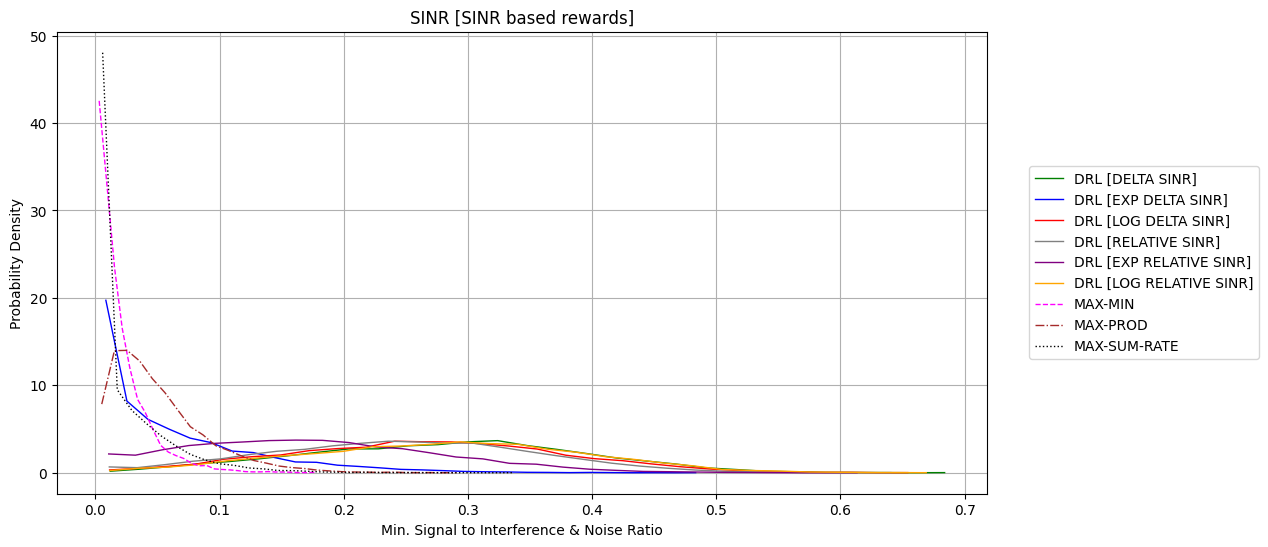

In [86]:
plot_cdf_pdf(data=SINR_DATA_R_SINR, title='SINR [SINR based rewards]', xlabel='Min. Signal to Interference & Noise Ratio', operation='min', cumulative=False)

### Max SINR

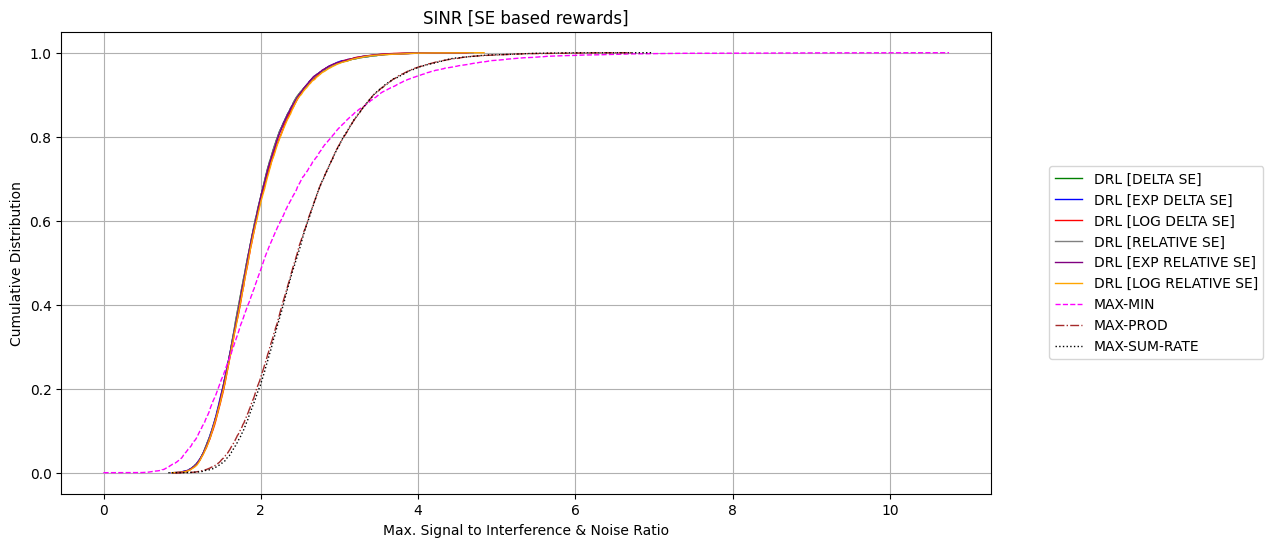

In [87]:
plot_cdf_pdf(data=SINR_DATA_R_SE, title='SINR [SE based rewards]', xlabel='Max. Signal to Interference & Noise Ratio', operation='max', cumulative=True)

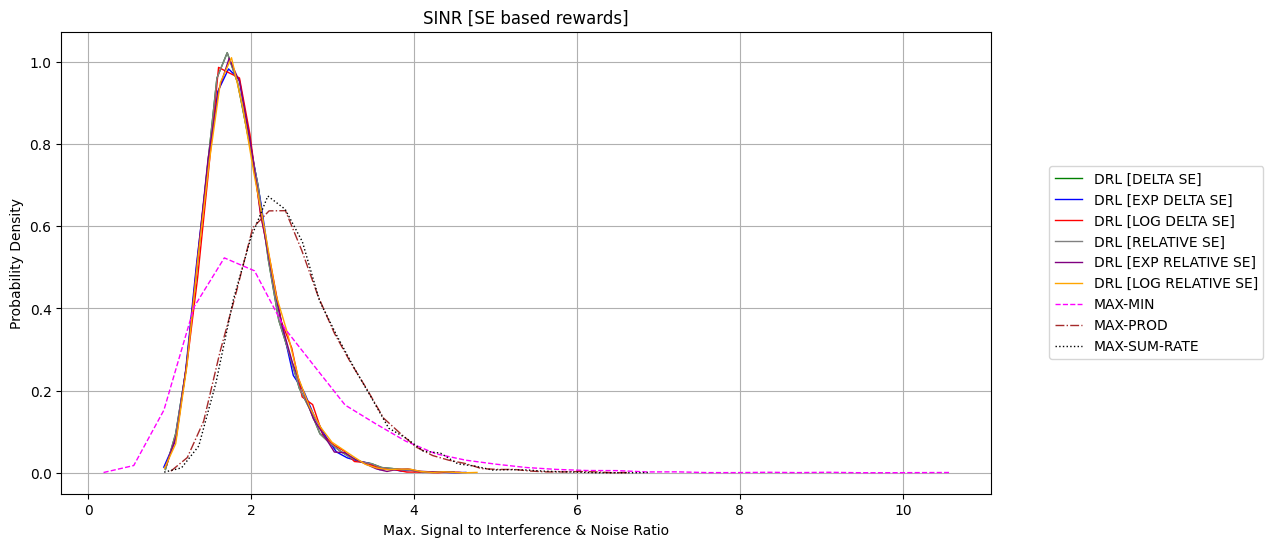

In [88]:
plot_cdf_pdf(data=SINR_DATA_R_SE, title='SINR [SE based rewards]', xlabel='Max. Signal to Interference & Noise Ratio', operation='max', cumulative=False)

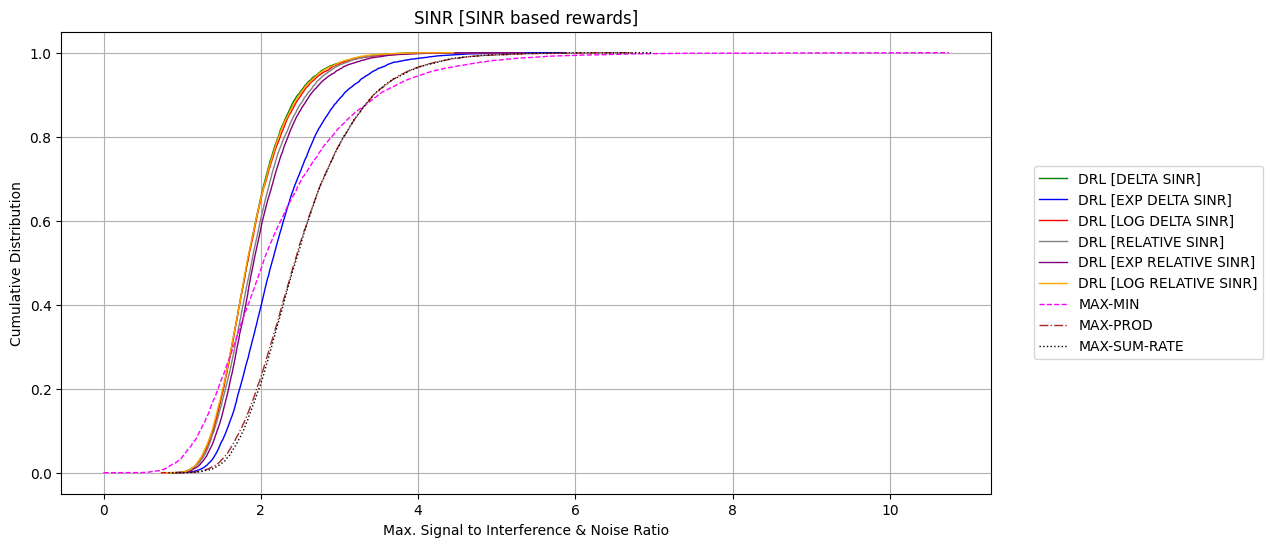

In [89]:
plot_cdf_pdf(data=SINR_DATA_R_SINR, title='SINR [SINR based rewards]', xlabel='Max. Signal to Interference & Noise Ratio', operation='max', cumulative=True)

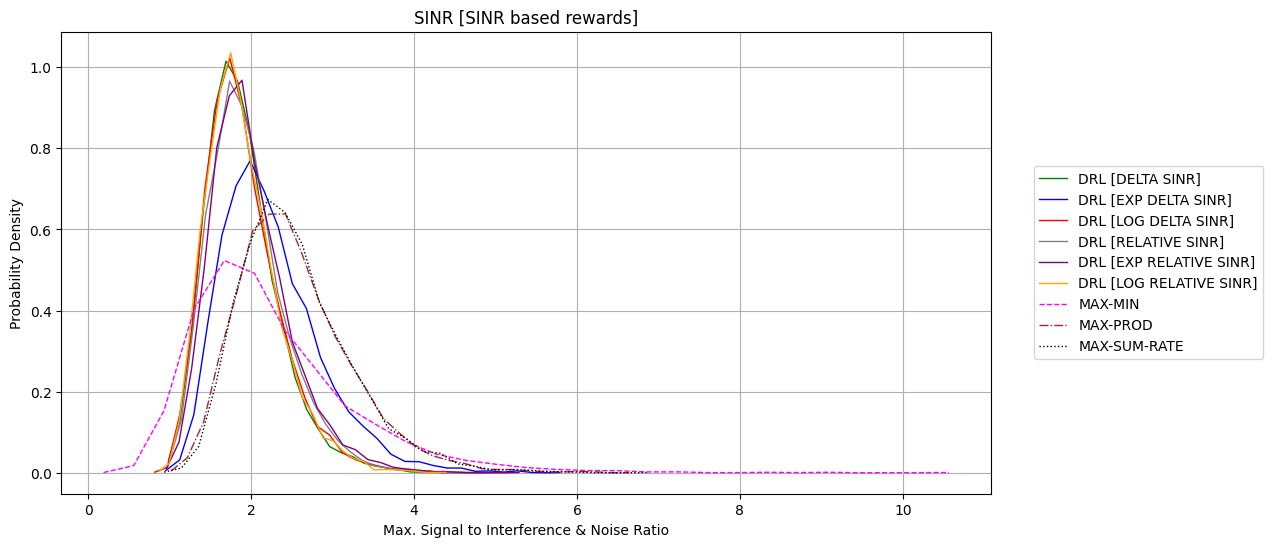

In [90]:
plot_cdf_pdf(data=SINR_DATA_R_SINR, title='SINR [SINR based rewards]', xlabel='Max. Signal to Interference & Noise Ratio', operation='max', cumulative=False)

## CDF Comparison

#### SE based reward

In [91]:
compare_models(SINR_DATA_R_SE, operation=None)

Label Average SE     Max SE  \
MODEL_DELTA_SE_SINRs                     DRL [DELTA SE]   0.813664   4.550825   
MODEL_EXP_DELTA_CLIP_SE_SINRs        DRL [EXP DELTA SE]   0.814904   4.701731   
MODEL_LOG_DELTA_SE_SINRs             DRL [LOG DELTA SE]   0.813994   4.614018   
MODEL_RELATIVE_SE_SINRs               DRL [RELATIVE SE]   0.813664   4.550825   
MODEL_EXP_RELATIVE_CLIP_SE_SINRs  DRL [EXP RELATIVE SE]   0.813935   4.635325   
MODEL_LOG_RELATIVE_SE_SINRs       DRL [LOG RELATIVE SE]   0.813377       4.84   
MAXMIN_SINRs                                    MAX-MIN   0.404302  10.753083   
MAXPROD_SINRs                                  MAX-PROD   0.724485    6.73814   
SUMRATE_SINRs                              MAX-SUM-RATE   0.739011   6.974748   

                                 Standard Deviation 25th Percentile  \
MODEL_DELTA_SE_SINRs                        0.39408        0.528793   
MODEL_EXP_DELTA_CLIP_SE_SINRs              0.394608            0.53   
MODEL_LOG_DELTA_SE_SINRs                    0.39598         0.52868   
MODEL_RELATIVE_SE_SINRs                     0.39408        0.528793   
MODEL_EXP_RELATIVE_CLIP_SE_SINRs           0.394149        0.529408   
MODEL_LOG_RELATIVE_SE_SINRs                0.397997        0.527325   
MAXMIN_SINRs                               0.523557        0.100093   
MAXPROD_SINRs                              0.614375        0.270609   
SUMRATE_SINRs                              0.632743        0.257884   

                                 50th Percentile 75th Percentile  
MODEL_DELTA_SE_SINRs                     0.75556        1.005862  
MODEL_EXP_DELTA_CLIP_SE_SINRs           0.756916        1.006169  
MODEL_LOG_DELTA_SE_SINRs                0.754855        1.004508  
MODEL_RELATIVE_SE_SINRs                  0.75556        1.005862  
MODEL_EXP_RELATIVE_CLIP_SE_SINRs        0.756529        1.005199  
MODEL_LOG_RELATIVE_SE_SINRs             0.754324         1.00509  
MAXMIN_SINRs                            0.234896        0.488756  
MAXPROD_SINRs                           0.573958        0.982938  
SUMRATE_SINRs                           0.598592        1.024495

In [92]:
# Kolmogorov-Smirnov Test
ks_results_r_se = compare_cdfs_ks(SINR_DATA_R_SE, operation=None)

In [93]:
ks_results_r_se['Best Model']

Criteria          Best Model
0       KS Statistic      DRL [DELTA SE]
1            P-Value   DRL [RELATIVE SE]
2  Area Between CDFs  DRL [LOG DELTA SE]

In [94]:
ks_results_r_se['Details']

Model1                 Model2  KS Statistic        P-Value  \
0          DRL [DELTA SE]     DRL [EXP DELTA SE]      0.001794   6.812404e-01   
1          DRL [DELTA SE]     DRL [LOG DELTA SE]      0.001838   6.517511e-01   
2          DRL [DELTA SE]      DRL [RELATIVE SE]      0.000000   1.000000e+00   
3          DRL [DELTA SE]  DRL [EXP RELATIVE SE]      0.001519   8.536306e-01   
4          DRL [DELTA SE]  DRL [LOG RELATIVE SE]      0.004006   1.173068e-02   
5          DRL [DELTA SE]                MAX-MIN      0.575772   0.000000e+00   
6          DRL [DELTA SE]               MAX-PROD      0.255325   0.000000e+00   
7          DRL [DELTA SE]           MAX-SUM-RATE      0.252925   0.000000e+00   
8      DRL [EXP DELTA SE]     DRL [LOG DELTA SE]      0.002812   1.587413e-01   
9      DRL [EXP DELTA SE]      DRL [RELATIVE SE]      0.001794   6.812404e-01   
10     DRL [EXP DELTA SE]  DRL [EXP RELATIVE SE]      0.002213   4.131784e-01   
11     DRL [EXP DELTA SE]  DRL [LOG RELATIVE SE]      0.004581   2.415035e-03   
12     DRL [EXP DELTA SE]                MAX-MIN      0.576294   0.000000e+00   
13     DRL [EXP DELTA SE]               MAX-PROD      0.255766   0.000000e+00   
14     DRL [EXP DELTA SE]           MAX-SUM-RATE      0.253244   0.000000e+00   
15     DRL [LOG DELTA SE]      DRL [RELATIVE SE]      0.001838   6.517511e-01   
16     DRL [LOG DELTA SE]  DRL [EXP RELATIVE SE]      0.002303   3.635187e-01   
17     DRL [LOG DELTA SE]  DRL [LOG RELATIVE SE]      0.003106   9.102394e-02   
18     DRL [LOG DELTA SE]                MAX-MIN      0.575522   0.000000e+00   
19     DRL [LOG DELTA SE]               MAX-PROD      0.255028   0.000000e+00   
20     DRL [LOG DELTA SE]           MAX-SUM-RATE      0.252644   0.000000e+00   
21      DRL [RELATIVE SE]  DRL [EXP RELATIVE SE]      0.001519   8.536306e-01   
22      DRL [RELATIVE SE]  DRL [LOG RELATIVE SE]      0.004006   1.173068e-02   
23      DRL [RELATIVE SE]                MAX-MIN      0.575772   0.000000e+00   
24      DRL [RELATIVE SE]               MAX-PROD      0.255325   0.000000e+00   
25      DRL [RELATIVE SE]           MAX-SUM-RATE      0.252925   0.000000e+00   
26  DRL [EXP RELATIVE SE]  DRL [LOG RELATIVE SE]      0.004294   5.465259e-03   
27  DRL [EXP RELATIVE SE]                MAX-MIN      0.576522   0.000000e+00   
28  DRL [EXP RELATIVE SE]               MAX-PROD      0.256072   0.000000e+00   
29  DRL [EXP RELATIVE SE]           MAX-SUM-RATE      0.253375   0.000000e+00   
30  DRL [LOG RELATIVE SE]                MAX-MIN      0.572831   0.000000e+00   
31  DRL [LOG RELATIVE SE]               MAX-PROD      0.252384   0.000000e+00   
32  DRL [LOG RELATIVE SE]           MAX-SUM-RATE      0.249950   0.000000e+00   
33                MAX-MIN               MAX-PROD      0.320769   0.000000e+00   
34                MAX-MIN           MAX-SUM-RATE      0.327053   0.000000e+00   
35               MAX-PROD           MAX-SUM-RATE      0.031650  1.115407e-139   

    Area Between CDFs  
0            0.001388  
1            0.001747  
2            0.000000  
3            0.000954  
4            0.002760  
5            0.436999  
6            0.206386  
7            0.211676  
8            0.001856  
9            0.001388  
10           0.001109  
11           0.002861  
12           0.438131  
13           0.206344  
14           0.211593  
15           0.001747  
16           0.001777  
17           0.001536  
18           0.436603  
19           0.204987  
20           0.210357  
21           0.000954  
22           0.002760  
23           0.436999  
24           0.206386  
25           0.211676  
26           0.002874  
27           0.437206  
28           0.206509  
29           0.211839  
30           0.435632  
31           0.203649  
32           0.208990  
33           0.322767  
34           0.337568  
35           0.028449

In [95]:
# Earth Mover's Distance
emd_results_r_se = compare_cdfs_emd(SINR_DATA_R_SE, operation=None)

In [96]:
emd_results_r_se['Ranked Models']

Model  Average EMD
0     DRL [LOG DELTA SE]     0.107578
1  DRL [LOG RELATIVE SE]     0.107635
2         DRL [DELTA SE]     0.107741
3      DRL [RELATIVE SE]     0.107741
4  DRL [EXP RELATIVE SE]     0.107905
5     DRL [EXP DELTA SE]     0.108086
6               MAX-PROD     0.198200
7           MAX-SUM-RATE     0.204031
8                MAX-MIN     0.410270

In [97]:
emd_results_r_se['Details']

Model1                 Model2  EMD Value
0          DRL [DELTA SE]     DRL [EXP DELTA SE]   0.001388
1          DRL [DELTA SE]     DRL [LOG DELTA SE]   0.001747
2          DRL [DELTA SE]      DRL [RELATIVE SE]   0.000000
3          DRL [DELTA SE]  DRL [EXP RELATIVE SE]   0.000954
4          DRL [DELTA SE]  DRL [LOG RELATIVE SE]   0.002760
5          DRL [DELTA SE]                MAX-MIN   0.437008
6          DRL [DELTA SE]               MAX-PROD   0.206389
7          DRL [DELTA SE]           MAX-SUM-RATE   0.211679
8      DRL [EXP DELTA SE]     DRL [LOG DELTA SE]   0.001856
9      DRL [EXP DELTA SE]      DRL [RELATIVE SE]   0.001388
10     DRL [EXP DELTA SE]  DRL [EXP RELATIVE SE]   0.001109
11     DRL [EXP DELTA SE]  DRL [LOG RELATIVE SE]   0.002861
12     DRL [EXP DELTA SE]                MAX-MIN   0.438141
13     DRL [EXP DELTA SE]               MAX-PROD   0.206347
14     DRL [EXP DELTA SE]           MAX-SUM-RATE   0.211597
15     DRL [LOG DELTA SE]      DRL [RELATIVE SE]   0.001747
16     DRL [LOG DELTA SE]  DRL [EXP RELATIVE SE]   0.001776
17     DRL [LOG DELTA SE]  DRL [LOG RELATIVE SE]   0.001536
18     DRL [LOG DELTA SE]                MAX-MIN   0.436613
19     DRL [LOG DELTA SE]               MAX-PROD   0.204990
20     DRL [LOG DELTA SE]           MAX-SUM-RATE   0.210361
21      DRL [RELATIVE SE]  DRL [EXP RELATIVE SE]   0.000954
22      DRL [RELATIVE SE]  DRL [LOG RELATIVE SE]   0.002760
23      DRL [RELATIVE SE]                MAX-MIN   0.437008
24      DRL [RELATIVE SE]               MAX-PROD   0.206389
25      DRL [RELATIVE SE]           MAX-SUM-RATE   0.211679
26  DRL [EXP RELATIVE SE]  DRL [LOG RELATIVE SE]   0.002874
27  DRL [EXP RELATIVE SE]                MAX-MIN   0.437216
28  DRL [EXP RELATIVE SE]               MAX-PROD   0.206512
29  DRL [EXP RELATIVE SE]           MAX-SUM-RATE   0.211842
30  DRL [LOG RELATIVE SE]                MAX-MIN   0.435641
31  DRL [LOG RELATIVE SE]               MAX-PROD   0.203652
32  DRL [LOG RELATIVE SE]           MAX-SUM-RATE   0.208993
33                MAX-MIN               MAX-PROD   0.322880
34                MAX-MIN           MAX-SUM-RATE   0.337653
35               MAX-PROD           MAX-SUM-RATE   0.028444

In [98]:
moments_r_se = compare_cdfs_moments(SINR_DATA_R_SE, operation=None, criteria='kurtosis')

In [99]:
moments_r_se['Ranked Models']

Model  Rank
1     MODEL_EXP_DELTA_CLIP_SE_SINRs     1
2          MODEL_LOG_DELTA_SE_SINRs     2
4  MODEL_EXP_RELATIVE_CLIP_SE_SINRs     3
0              MODEL_DELTA_SE_SINRs     4
3           MODEL_RELATIVE_SE_SINRs     5
5       MODEL_LOG_RELATIVE_SE_SINRs     6
8                     SUMRATE_SINRs     7
7                     MAXPROD_SINRs     8
6                      MAXMIN_SINRs     9

In [100]:
moments_r_se['Details']

Model      Mean  Variance  Skewness   Kurtosis
0              MODEL_DELTA_SE_SINRs  0.813664  0.155299  1.302784   3.329465
1     MODEL_EXP_DELTA_CLIP_SE_SINRs  0.814904  0.155715  1.291191   3.200984
2          MODEL_LOG_DELTA_SE_SINRs  0.813994  0.156800  1.309190   3.234582
3           MODEL_RELATIVE_SE_SINRs  0.813664  0.155299  1.302784   3.329465
4  MODEL_EXP_RELATIVE_CLIP_SE_SINRs  0.813935  0.155354  1.298830   3.281297
5       MODEL_LOG_RELATIVE_SE_SINRs  0.813377  0.158402  1.320571   3.388540
6                      MAXMIN_SINRs  0.404302  0.274112  3.513964  20.417200
7                     MAXPROD_SINRs  0.724485  0.377457  1.674263   4.149753
8                     SUMRATE_SINRs  0.739011  0.400363  1.515867   3.415945

In [101]:
calculate_and_rank_percentiles(SINR_DATA_R_SE, [50, 75])

Model  50th Percentile  75th Percentile  Rank
8           MAX-SUM-RATE         0.598592         1.024495     1
1     DRL [EXP DELTA SE]         0.756916         1.006169     2
0         DRL [DELTA SE]         0.755560         1.005862     3
3      DRL [RELATIVE SE]         0.755560         1.005862     3
4  DRL [EXP RELATIVE SE]         0.756529         1.005199     5
5  DRL [LOG RELATIVE SE]         0.754324         1.005090     6
2     DRL [LOG DELTA SE]         0.754855         1.004508     7
7               MAX-PROD         0.573958         0.982938     8
6                MAX-MIN         0.234896         0.488756     9

#### SINR based reward

In [102]:
compare_models(SINR_DATA_R_SINR, operation=None)

Label Average SE  \
MODEL_DELTA_SINR_SINRs                     DRL [DELTA SINR]   0.813159   
MODEL_EXP_DELTA_CLIP_SINR_SINRs        DRL [EXP DELTA SINR]   0.726418   
MODEL_LOG_DELTA_SINR_SINRs             DRL [LOG DELTA SINR]   0.810848   
MODEL_RELATIVE_SINR_SINRs               DRL [RELATIVE SINR]   0.810078   
MODEL_EXP_RELATIVE_CLIP_SINR_SINRs  DRL [EXP RELATIVE SINR]   0.796821   
MODEL_LOG_RELATIVE_SINR_SINRs       DRL [LOG RELATIVE SINR]   0.813347   
MAXMIN_SINRs                                        MAX-MIN   0.404302   
MAXPROD_SINRs                                      MAX-PROD   0.724485   
SUMRATE_SINRs                                  MAX-SUM-RATE   0.739011   

                                       Max SE Standard Deviation  \
MODEL_DELTA_SINR_SINRs               5.014465            0.39408   
MODEL_EXP_DELTA_CLIP_SINR_SINRs      5.874649           0.554825   
MODEL_LOG_DELTA_SINR_SINRs           5.190497            0.39977   
MODEL_RELATIVE_SINR_SINRs            5.205597           0.413822   
MODEL_EXP_RELATIVE_CLIP_SINR_SINRs   5.364919           0.434708   
MODEL_LOG_RELATIVE_SINR_SINRs        4.451155           0.394092   
MAXMIN_SINRs                        10.753083           0.523557   
MAXPROD_SINRs                         6.73814           0.614375   
SUMRATE_SINRs                        6.974748           0.632743   

                                   25th Percentile 50th Percentile  \
MODEL_DELTA_SINR_SINRs                    0.528499        0.754242   
MODEL_EXP_DELTA_CLIP_SINR_SINRs           0.298957        0.652573   
MODEL_LOG_DELTA_SINR_SINRs                0.523328        0.752753   
MODEL_RELATIVE_SINR_SINRs                 0.515228        0.750244   
MODEL_EXP_RELATIVE_CLIP_SINR_SINRs        0.488733        0.736959   
MODEL_LOG_RELATIVE_SINR_SINRs             0.529032        0.755569   
MAXMIN_SINRs                              0.100093        0.234896   
MAXPROD_SINRs                             0.270609        0.573958   
SUMRATE_SINRs                             0.257884        0.598592   

                                   75th Percentile  
MODEL_DELTA_SINR_SINRs                    1.004734  
MODEL_EXP_DELTA_CLIP_SINR_SINRs           1.007826  
MODEL_LOG_DELTA_SINR_SINRs                1.004841  
MODEL_RELATIVE_SINR_SINRs                 1.007334  
MODEL_EXP_RELATIVE_CLIP_SINR_SINRs        1.007614  
MODEL_LOG_RELATIVE_SINR_SINRs             1.004518  
MAXMIN_SINRs                              0.488756  
MAXPROD_SINRs                             0.982938  
SUMRATE_SINRs                             1.024495

In [103]:
# Kolmogorov-Smirnov Test
ks_results_r_sinr = compare_cdfs_ks(SINR_DATA_R_SINR, operation=None)

In [104]:
ks_results_r_sinr['Details']

Model1                   Model2  KS Statistic  \
0          DRL [DELTA SINR]     DRL [EXP DELTA SINR]      0.214581   
1          DRL [DELTA SINR]     DRL [LOG DELTA SINR]      0.009147   
2          DRL [DELTA SINR]      DRL [RELATIVE SINR]      0.022241   
3          DRL [DELTA SINR]  DRL [EXP RELATIVE SINR]      0.053681   
4          DRL [DELTA SINR]  DRL [LOG RELATIVE SINR]      0.001600   
5          DRL [DELTA SINR]                  MAX-MIN      0.576212   
6          DRL [DELTA SINR]                 MAX-PROD      0.255769   
7          DRL [DELTA SINR]             MAX-SUM-RATE      0.253334   
8      DRL [EXP DELTA SINR]     DRL [LOG DELTA SINR]      0.207362   
9      DRL [EXP DELTA SINR]      DRL [RELATIVE SINR]      0.195481   
10     DRL [EXP DELTA SINR]  DRL [EXP RELATIVE SINR]      0.164400   
11     DRL [EXP DELTA SINR]  DRL [LOG RELATIVE SINR]      0.214681   
12     DRL [EXP DELTA SINR]                  MAX-MIN      0.367669   
13     DRL [EXP DELTA SINR]                 MAX-PROD      0.055316   
14     DRL [EXP DELTA SINR]             MAX-SUM-RATE      0.041400   
15     DRL [LOG DELTA SINR]      DRL [RELATIVE SINR]      0.013791   
16     DRL [LOG DELTA SINR]  DRL [EXP RELATIVE SINR]      0.045459   
17     DRL [LOG DELTA SINR]  DRL [LOG RELATIVE SINR]      0.010213   
18     DRL [LOG DELTA SINR]                  MAX-MIN      0.568072   
19     DRL [LOG DELTA SINR]                 MAX-PROD      0.247556   
20     DRL [LOG DELTA SINR]             MAX-SUM-RATE      0.245831   
21      DRL [RELATIVE SINR]  DRL [EXP RELATIVE SINR]      0.032500   
22      DRL [RELATIVE SINR]  DRL [LOG RELATIVE SINR]      0.022809   
23      DRL [RELATIVE SINR]                  MAX-MIN      0.555622   
24      DRL [RELATIVE SINR]                 MAX-PROD      0.235144   
25      DRL [RELATIVE SINR]             MAX-SUM-RATE      0.234028   
26  DRL [EXP RELATIVE SINR]  DRL [LOG RELATIVE SINR]      0.054175   
27  DRL [EXP RELATIVE SINR]                  MAX-MIN      0.523375   
28  DRL [EXP RELATIVE SINR]                 MAX-PROD      0.202897   
29  DRL [EXP RELATIVE SINR]             MAX-SUM-RATE      0.201934   
30  DRL [LOG RELATIVE SINR]                  MAX-MIN      0.576459   
31  DRL [LOG RELATIVE SINR]                 MAX-PROD      0.256025   
32  DRL [LOG RELATIVE SINR]             MAX-SUM-RATE      0.253328   
33                  MAX-MIN                 MAX-PROD      0.320769   
34                  MAX-MIN             MAX-SUM-RATE      0.327053   
35                 MAX-PROD             MAX-SUM-RATE      0.031650   

          P-Value  Area Between CDFs  
0    0.000000e+00           0.150952  
1    4.686596e-12           0.004454  
2    3.500750e-69           0.014038  
3    0.000000e+00           0.034088  
4    8.066931e-01           0.001069  
5    0.000000e+00           0.436516  
6    0.000000e+00           0.205872  
7    0.000000e+00           0.211252  
8    0.000000e+00           0.146513  
9    0.000000e+00           0.137029  
10   0.000000e+00           0.116913  
11   0.000000e+00           0.151389  
12   0.000000e+00           0.330870  
13   0.000000e+00           0.064500  
14  1.005269e-238           0.061089  
15   7.339234e-27           0.009739  
16  9.085623e-288           0.029656  
17   6.359424e-15           0.004941  
18   0.000000e+00           0.433270  
19   0.000000e+00           0.201452  
20   0.000000e+00           0.206805  
21  2.922884e-147           0.020113  
22   9.602272e-73           0.014525  
23   0.000000e+00           0.429314  
24   0.000000e+00           0.192126  
25   0.000000e+00           0.197287  
26   0.000000e+00           0.034582  
27   0.000000e+00           0.413946  
28   0.000000e+00           0.172075  
29   0.000000e+00           0.177179  
30   0.000000e+00           0.436435  
31   0.000000e+00           0.206357  
32   0.000000e+00           0.211746  
33   0.000000e+00           0.322767  
34   0.000000e+00           0.337568  
35  1.115407e-139         

In [105]:
ks_results_r_sinr['Details']

Model1                   Model2  KS Statistic  \
0          DRL [DELTA SINR]     DRL [EXP DELTA SINR]      0.214581   
1          DRL [DELTA SINR]     DRL [LOG DELTA SINR]      0.009147   
2          DRL [DELTA SINR]      DRL [RELATIVE SINR]      0.022241   
3          DRL [DELTA SINR]  DRL [EXP RELATIVE SINR]      0.053681   
4          DRL [DELTA SINR]  DRL [LOG RELATIVE SINR]      0.001600   
5          DRL [DELTA SINR]                  MAX-MIN      0.576212   
6          DRL [DELTA SINR]                 MAX-PROD      0.255769   
7          DRL [DELTA SINR]             MAX-SUM-RATE      0.253334   
8      DRL [EXP DELTA SINR]     DRL [LOG DELTA SINR]      0.207362   
9      DRL [EXP DELTA SINR]      DRL [RELATIVE SINR]      0.195481   
10     DRL [EXP DELTA SINR]  DRL [EXP RELATIVE SINR]      0.164400   
11     DRL [EXP DELTA SINR]  DRL [LOG RELATIVE SINR]      0.214681   
12     DRL [EXP DELTA SINR]                  MAX-MIN      0.367669   
13     DRL [EXP DELTA SINR]                 MAX-PROD      0.055316   
14     DRL [EXP DELTA SINR]             MAX-SUM-RATE      0.041400   
15     DRL [LOG DELTA SINR]      DRL [RELATIVE SINR]      0.013791   
16     DRL [LOG DELTA SINR]  DRL [EXP RELATIVE SINR]      0.045459   
17     DRL [LOG DELTA SINR]  DRL [LOG RELATIVE SINR]      0.010213   
18     DRL [LOG DELTA SINR]                  MAX-MIN      0.568072   
19     DRL [LOG DELTA SINR]                 MAX-PROD      0.247556   
20     DRL [LOG DELTA SINR]             MAX-SUM-RATE      0.245831   
21      DRL [RELATIVE SINR]  DRL [EXP RELATIVE SINR]      0.032500   
22      DRL [RELATIVE SINR]  DRL [LOG RELATIVE SINR]      0.022809   
23      DRL [RELATIVE SINR]                  MAX-MIN      0.555622   
24      DRL [RELATIVE SINR]                 MAX-PROD      0.235144   
25      DRL [RELATIVE SINR]             MAX-SUM-RATE      0.234028   
26  DRL [EXP RELATIVE SINR]  DRL [LOG RELATIVE SINR]      0.054175   
27  DRL [EXP RELATIVE SINR]                  MAX-MIN      0.523375   
28  DRL [EXP RELATIVE SINR]                 MAX-PROD      0.202897   
29  DRL [EXP RELATIVE SINR]             MAX-SUM-RATE      0.201934   
30  DRL [LOG RELATIVE SINR]                  MAX-MIN      0.576459   
31  DRL [LOG RELATIVE SINR]                 MAX-PROD      0.256025   
32  DRL [LOG RELATIVE SINR]             MAX-SUM-RATE      0.253328   
33                  MAX-MIN                 MAX-PROD      0.320769   
34                  MAX-MIN             MAX-SUM-RATE      0.327053   
35                 MAX-PROD             MAX-SUM-RATE      0.031650   

          P-Value  Area Between CDFs  
0    0.000000e+00           0.150952  
1    4.686596e-12           0.004454  
2    3.500750e-69           0.014038  
3    0.000000e+00           0.034088  
4    8.066931e-01           0.001069  
5    0.000000e+00           0.436516  
6    0.000000e+00           0.205872  
7    0.000000e+00           0.211252  
8    0.000000e+00           0.146513  
9    0.000000e+00           0.137029  
10   0.000000e+00           0.116913  
11   0.000000e+00           0.151389  
12   0.000000e+00           0.330870  
13   0.000000e+00           0.064500  
14  1.005269e-238           0.061089  
15   7.339234e-27           0.009739  
16  9.085623e-288           0.029656  
17   6.359424e-15           0.004941  
18   0.000000e+00           0.433270  
19   0.000000e+00           0.201452  
20   0.000000e+00           0.206805  
21  2.922884e-147           0.020113  
22   9.602272e-73           0.014525  
23   0.000000e+00           0.429314  
24   0.000000e+00           0.192126  
25   0.000000e+00           0.197287  
26   0.000000e+00           0.034582  
27   0.000000e+00           0.413946  
28   0.000000e+00           0.172075  
29   0.000000e+00           0.177179  
30   0.000000e+00           0.436435  
31   0.000000e+00           0.206357  
32   0.000000e+00           0.211746  
33   0.000000e+00           0.322767  
34   0.000000e+00           0.337568  
35  1.115407e-139         

In [106]:
# Earth Mover's Distance
emd_results_r_sinr = compare_cdfs_emd(SINR_DATA_R_SINR, operation=None)

In [107]:
emd_results_r_sinr['Ranked Models']

Model  Average EMD
0  DRL [EXP RELATIVE SINR]     0.124822
1      DRL [RELATIVE SINR]     0.126773
2     DRL [LOG DELTA SINR]     0.129605
3         DRL [DELTA SINR]     0.132283
4  DRL [LOG RELATIVE SINR]     0.132641
5     DRL [EXP DELTA SINR]     0.144914
6                 MAX-PROD     0.174215
7             MAX-SUM-RATE     0.178934
8                  MAX-MIN     0.392617

In [108]:
emd_results_r_sinr['Details']

Model1                   Model2  EMD Value
0          DRL [DELTA SINR]     DRL [EXP DELTA SINR]   0.150954
1          DRL [DELTA SINR]     DRL [LOG DELTA SINR]   0.004455
2          DRL [DELTA SINR]      DRL [RELATIVE SINR]   0.014038
3          DRL [DELTA SINR]  DRL [EXP RELATIVE SINR]   0.034089
4          DRL [DELTA SINR]  DRL [LOG RELATIVE SINR]   0.001071
5          DRL [DELTA SINR]                  MAX-MIN   0.436525
6          DRL [DELTA SINR]                 MAX-PROD   0.205874
7          DRL [DELTA SINR]             MAX-SUM-RATE   0.211255
8      DRL [EXP DELTA SINR]     DRL [LOG DELTA SINR]   0.146503
9      DRL [EXP DELTA SINR]      DRL [RELATIVE SINR]   0.137023
10     DRL [EXP DELTA SINR]  DRL [EXP RELATIVE SINR]   0.116913
11     DRL [EXP DELTA SINR]  DRL [LOG RELATIVE SINR]   0.151445
12     DRL [EXP DELTA SINR]                  MAX-MIN   0.330877
13     DRL [EXP DELTA SINR]                 MAX-PROD   0.064502
14     DRL [EXP DELTA SINR]             MAX-SUM-RATE   0.061091
15     DRL [LOG DELTA SINR]      DRL [RELATIVE SINR]   0.009739
16     DRL [LOG DELTA SINR]  DRL [EXP RELATIVE SINR]   0.029657
17     DRL [LOG DELTA SINR]  DRL [LOG RELATIVE SINR]   0.004943
18     DRL [LOG DELTA SINR]                  MAX-MIN   0.433279
19     DRL [LOG DELTA SINR]                 MAX-PROD   0.201455
20     DRL [LOG DELTA SINR]             MAX-SUM-RATE   0.206808
21      DRL [RELATIVE SINR]  DRL [EXP RELATIVE SINR]   0.020113
22      DRL [RELATIVE SINR]  DRL [LOG RELATIVE SINR]   0.014528
23      DRL [RELATIVE SINR]                  MAX-MIN   0.429322
24      DRL [RELATIVE SINR]                 MAX-PROD   0.192128
25      DRL [RELATIVE SINR]             MAX-SUM-RATE   0.197290
26  DRL [EXP RELATIVE SINR]  DRL [LOG RELATIVE SINR]   0.034588
27  DRL [EXP RELATIVE SINR]                  MAX-MIN   0.413954
28  DRL [EXP RELATIVE SINR]                 MAX-PROD   0.172078
29  DRL [EXP RELATIVE SINR]             MAX-SUM-RATE   0.177181
30  DRL [LOG RELATIVE SINR]                  MAX-MIN   0.436445
31  DRL [LOG RELATIVE SINR]                 MAX-PROD   0.206361
32  DRL [LOG RELATIVE SINR]             MAX-SUM-RATE   0.211750
33                  MAX-MIN                 MAX-PROD   0.322880
34                  MAX-MIN             MAX-SUM-RATE   0.337653
35                 MAX-PROD             MAX-SUM-RATE   0.028444

In [109]:
moments_r_sinr = compare_cdfs_moments(SINR_DATA_R_SINR, operation=None, criteria='kurtosis')

In [110]:
moments_r_sinr['Ranked Models']

Model  Rank
1     MODEL_EXP_DELTA_CLIP_SINR_SINRs     1
4  MODEL_EXP_RELATIVE_CLIP_SINR_SINRs     2
5       MODEL_LOG_RELATIVE_SINR_SINRs     3
3           MODEL_RELATIVE_SINR_SINRs     4
0              MODEL_DELTA_SINR_SINRs     5
2          MODEL_LOG_DELTA_SINR_SINRs     6
8                       SUMRATE_SINRs     7
7                       MAXPROD_SINRs     8
6                        MAXMIN_SINRs     9

In [111]:
moments_r_sinr['Details']

Model      Mean  Variance  Skewness   Kurtosis
0              MODEL_DELTA_SINR_SINRs  0.813159  0.155299  1.300124   3.252506
1     MODEL_EXP_DELTA_CLIP_SINR_SINRs  0.726418  0.307831  1.268109   2.916033
2          MODEL_LOG_DELTA_SINR_SINRs  0.810848  0.159816  1.306806   3.400775
3           MODEL_RELATIVE_SINR_SINRs  0.810078  0.171249  1.302143   3.242593
4  MODEL_EXP_RELATIVE_CLIP_SINR_SINRs  0.796821  0.188971  1.260976   3.192352
5       MODEL_LOG_RELATIVE_SINR_SINRs  0.813347  0.155308  1.300686   3.240122
6                        MAXMIN_SINRs  0.404302  0.274112  3.513964  20.417200
7                       MAXPROD_SINRs  0.724485  0.377457  1.674263   4.149753
8                       SUMRATE_SINRs  0.739011  0.400363  1.515867   3.415945

In [112]:
calculate_and_rank_percentiles(SINR_DATA_R_SINR, [50, 75])

Model  50th Percentile  75th Percentile  Rank
8             MAX-SUM-RATE         0.598592         1.024495     1
1     DRL [EXP DELTA SINR]         0.652573         1.007826     2
4  DRL [EXP RELATIVE SINR]         0.736959         1.007614     3
3      DRL [RELATIVE SINR]         0.750244         1.007334     4
2     DRL [LOG DELTA SINR]         0.752753         1.004841     5
0         DRL [DELTA SINR]         0.754242         1.004734     6
5  DRL [LOG RELATIVE SINR]         0.755569         1.004518     7
7                 MAX-PROD         0.573958         0.982938     8
6                  MAX-MIN         0.234896         0.488756     9

## SINR Heatmaps

In [113]:
MODEL_DELTA_SE_SINRs                  = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_DELTA_SE_SINRs.csv', index_col=0)
MODEL_EXP_DELTA_CLIP_SE_SINRs         = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_EXP_DELTA_CLIP_SEv0_SINRs.csv', index_col=0)
MODEL_LOG_DELTA_SE_SINRs              = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_LOG_DELTA_SE_SINRs.csv', index_col=0)
MODEL_RELATIVE_SE_SINRs               = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_DELTA_SE_SINRs.csv', index_col=0)
MODEL_EXP_RELATIVE_CLIP_SE_SINRs      = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_RELATIVE_SE_SINRs.csv', index_col=0)
MODEL_LOG_RELATIVE_SE_SINRs           = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_LOG_RELATIVE_SE_SINRs.csv', index_col=0)
MODEL_DELTA_SINR_SINRs                = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_DELTA_SINR_SINRs.csv', index_col=0)
MODEL_EXP_DELTA_CLIP_SINR_SINRs       = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_EXP_DELTA_CLIP_SINR_SINRs.csv', index_col=0)
MODEL_LOG_DELTA_SINR_SINRs            = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_LOG_DELTA_SINR_SINRs.csv', index_col=0)
MODEL_RELATIVE_SINR_SINRs             = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_RELATIVE_SINR_SINRs.csv', index_col=0)
MODEL_EXP_RELATIVE_CLIP_SINR_SINRs    = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_EXP_RELATIVE_CLIP_SINR_SINRs.csv', index_col=0)
MODEL_LOG_RELATIVE_SINR_SINRs         = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_LOG_RELATIVE_SINR_SINRs.csv', index_col=0)

MAXMIN_SINRs  =  pd.read_csv(f'{results_dir}/{results_folder}/MAXMIN_SINRs.csv', index_col=0)
MAXPROD_SINRs = pd.read_csv(f'{results_dir}/{results_folder}/MAXPROD_SINRs.csv', index_col=0)
SUMRATE_SINRs = pd.read_csv(f'{results_dir}/{results_folder}/SUMRATE_SINRs.csv', index_col=0)

UEs_LOCATIONS = pd.read_csv(f'{results_dir}/{results_folder}/UEs_LOCATIONS.csv', index_col=0)
APs_LOCATIONS = pd.read_csv(f'{results_dir}/{results_folder}/APs_LOCATIONS.csv', index_col=0)

In [114]:
grid_size = (100, 100)

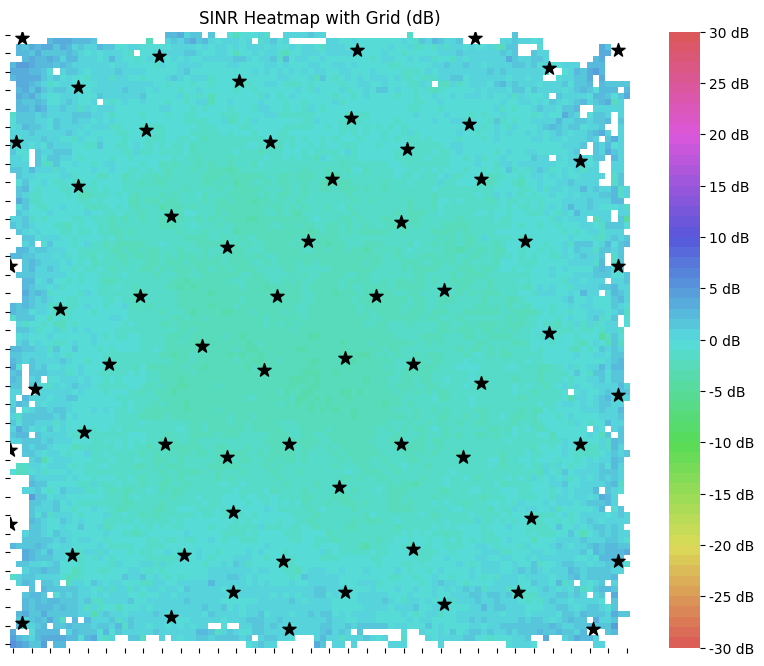

In [115]:
plot_sinr_heatmap(MODEL_DELTA_SE_SINRs, UEs_LOCATIONS, APs_LOCATIONS, grid_size, colorbar_ticks='custom')

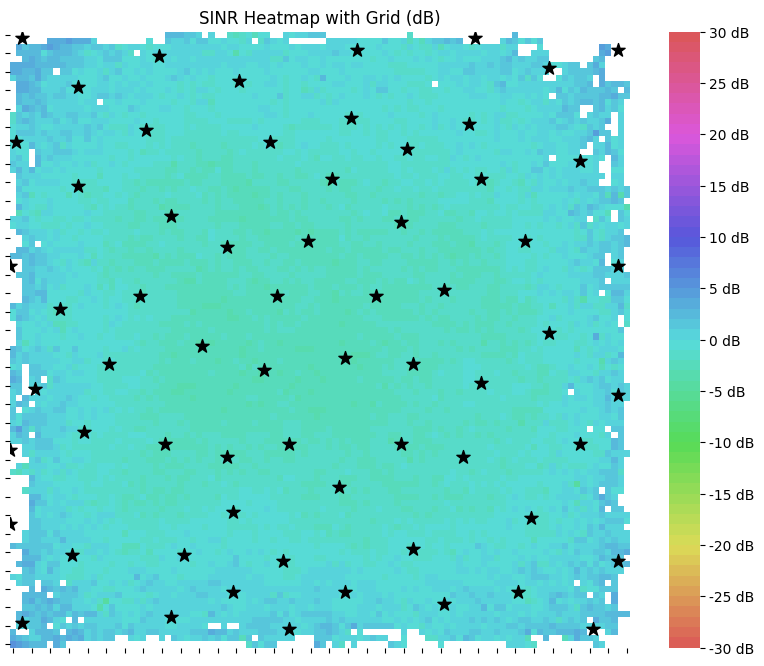

In [116]:
plot_sinr_heatmap(MODEL_EXP_DELTA_CLIP_SE_SINRs, UEs_LOCATIONS, APs_LOCATIONS, grid_size, colorbar_ticks='custom')

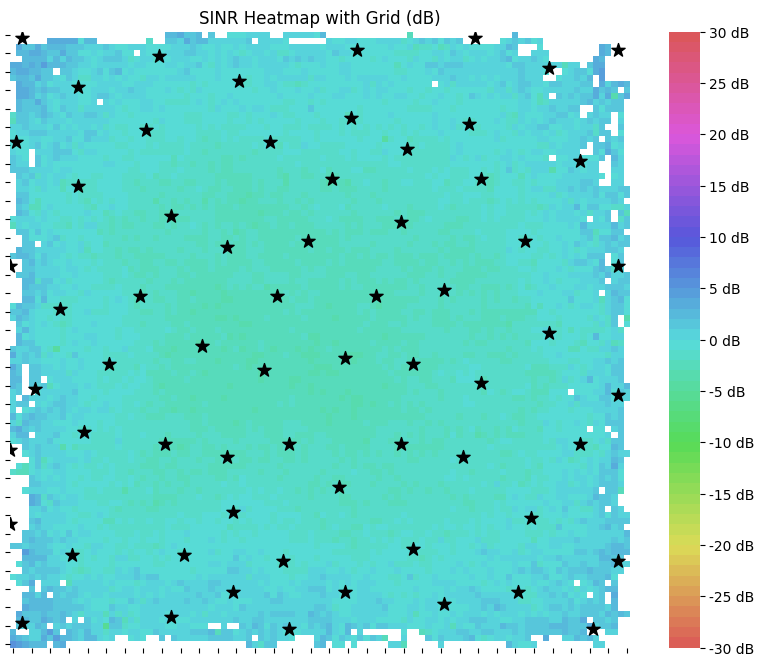

In [117]:
plot_sinr_heatmap(MODEL_LOG_DELTA_SE_SINRs, UEs_LOCATIONS,APs_LOCATIONS, grid_size, colorbar_ticks='custom')

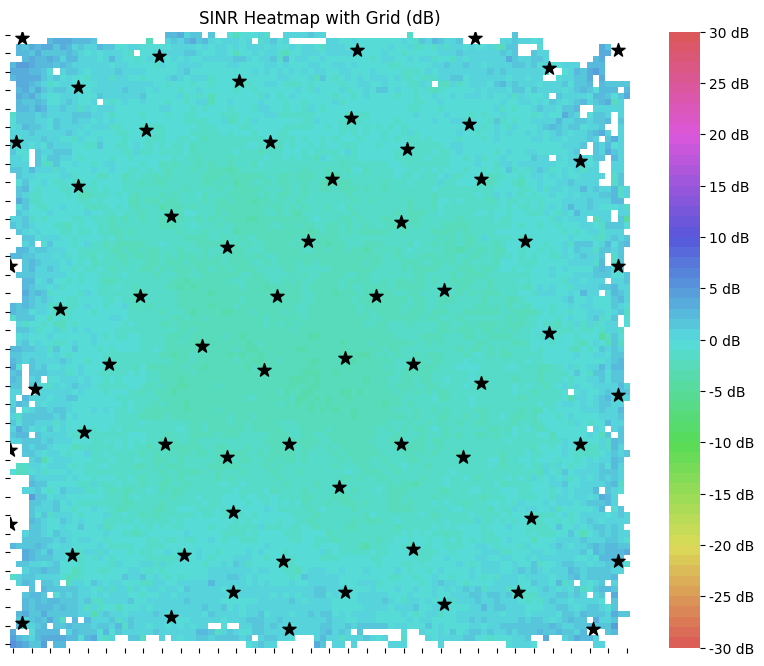

In [118]:
plot_sinr_heatmap(MODEL_RELATIVE_SE_SINRs, UEs_LOCATIONS, APs_LOCATIONS, grid_size, colorbar_ticks='custom')

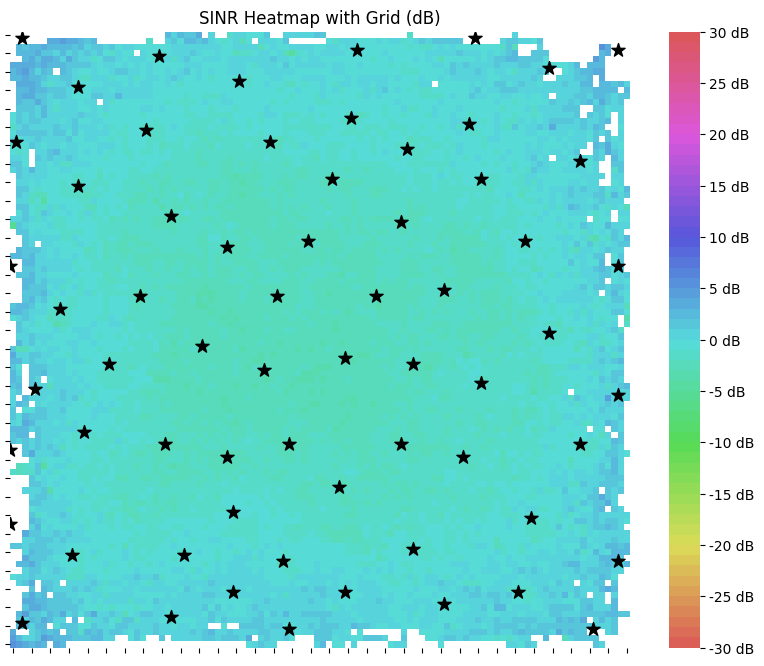

In [119]:
plot_sinr_heatmap(MODEL_EXP_RELATIVE_CLIP_SE_SINRs, UEs_LOCATIONS, APs_LOCATIONS, grid_size, colorbar_ticks='custom')

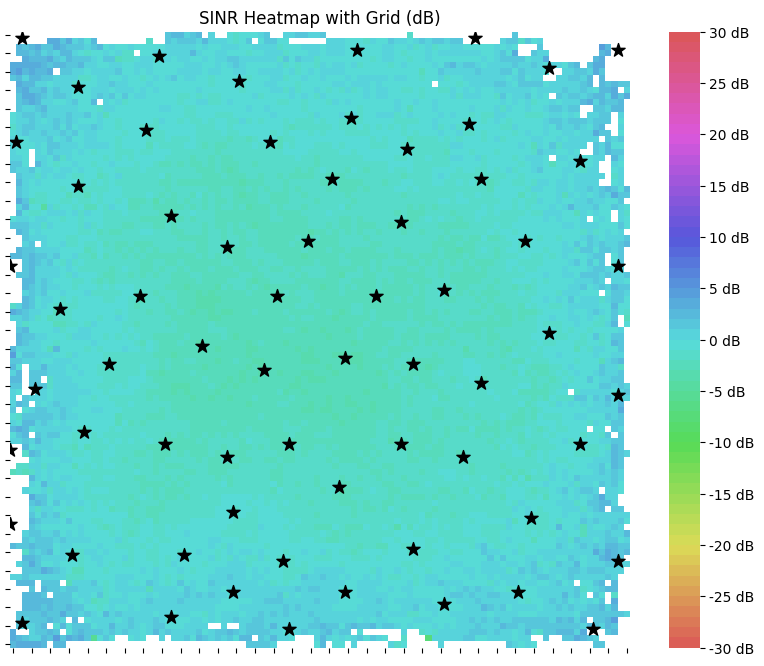

In [120]:
plot_sinr_heatmap(MODEL_LOG_RELATIVE_SE_SINRs, UEs_LOCATIONS, APs_LOCATIONS, grid_size, colorbar_ticks='custom')

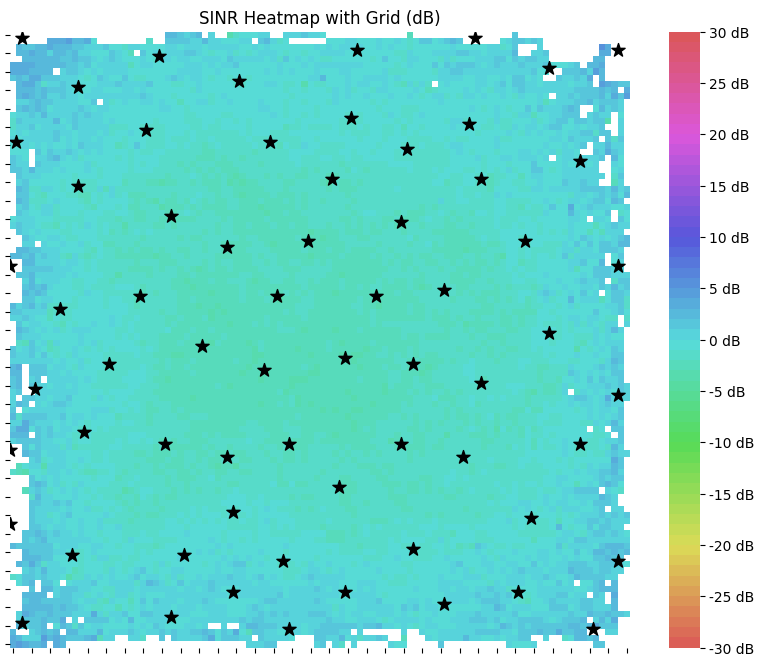

In [121]:
plot_sinr_heatmap(MODEL_DELTA_SINR_SINRs, UEs_LOCATIONS, APs_LOCATIONS, grid_size, colorbar_ticks='custom')

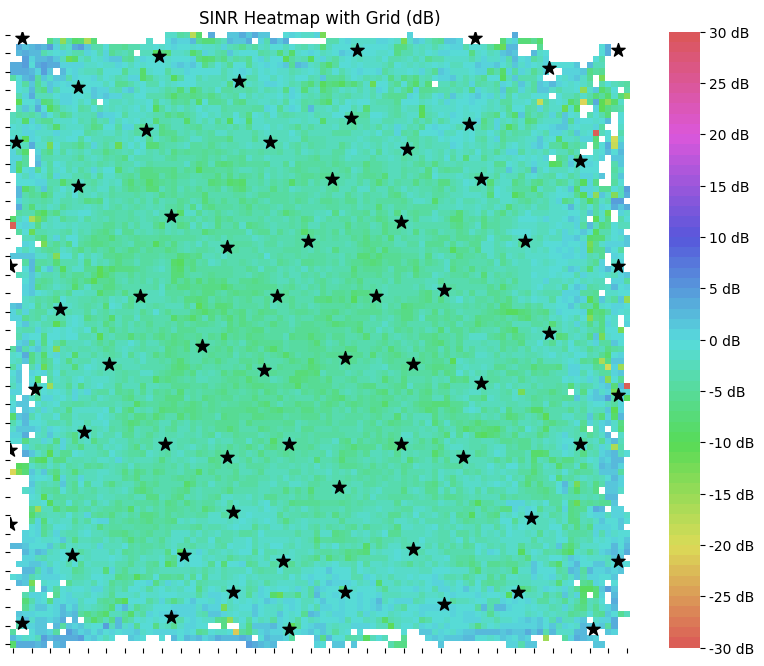

In [122]:
plot_sinr_heatmap(MODEL_EXP_DELTA_CLIP_SINR_SINRs, UEs_LOCATIONS, APs_LOCATIONS, grid_size, colorbar_ticks='custom')

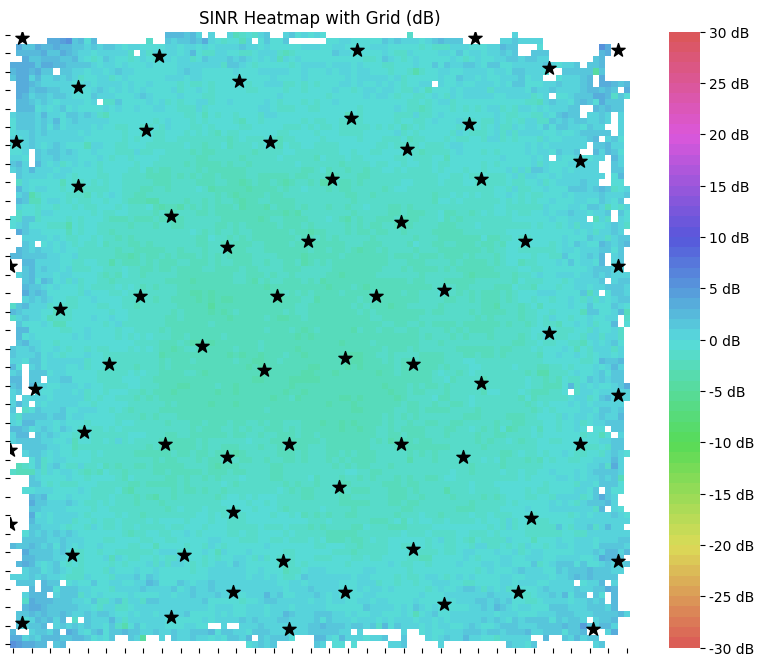

In [123]:
plot_sinr_heatmap(MODEL_LOG_DELTA_SINR_SINRs, UEs_LOCATIONS, APs_LOCATIONS, grid_size, colorbar_ticks='custom')

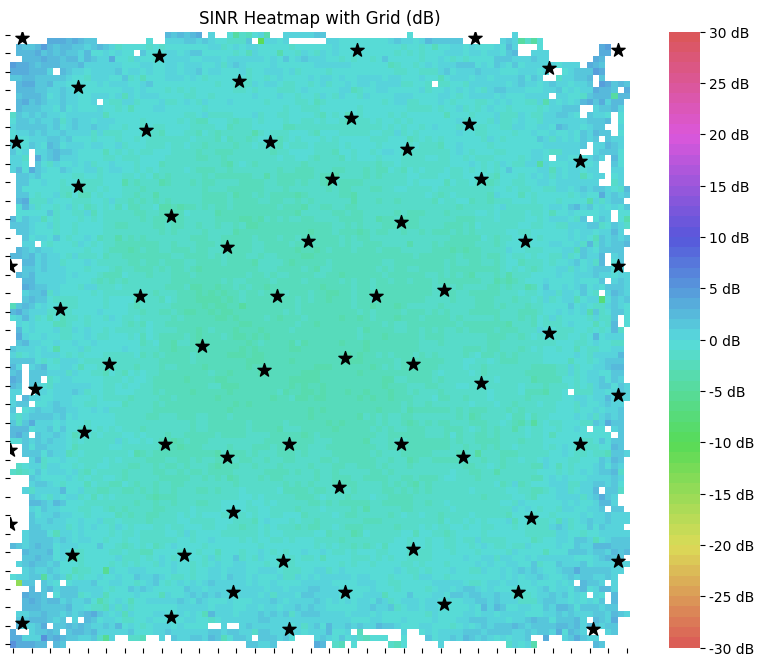

In [124]:
plot_sinr_heatmap(MODEL_RELATIVE_SINR_SINRs, UEs_LOCATIONS, APs_LOCATIONS, grid_size, colorbar_ticks='custom')

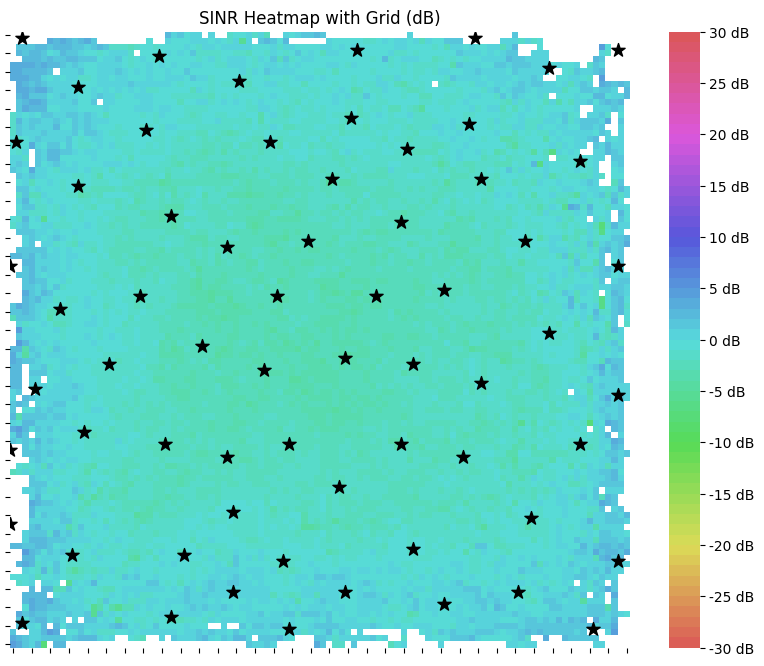

In [125]:
plot_sinr_heatmap(MODEL_EXP_RELATIVE_CLIP_SINR_SINRs, UEs_LOCATIONS, APs_LOCATIONS, grid_size, colorbar_ticks='custom')

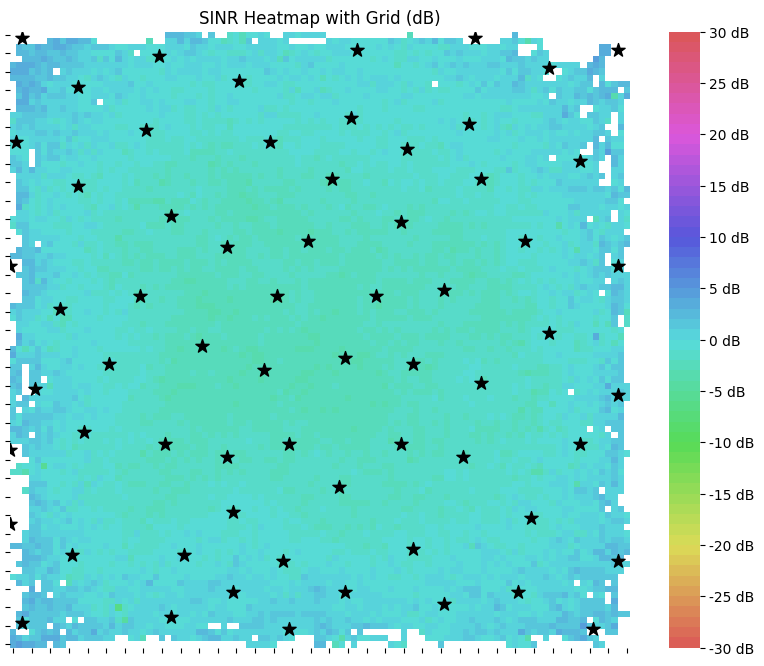

In [126]:
plot_sinr_heatmap(MODEL_LOG_RELATIVE_SINR_SINRs, UEs_LOCATIONS, APs_LOCATIONS, grid_size, colorbar_ticks='custom')

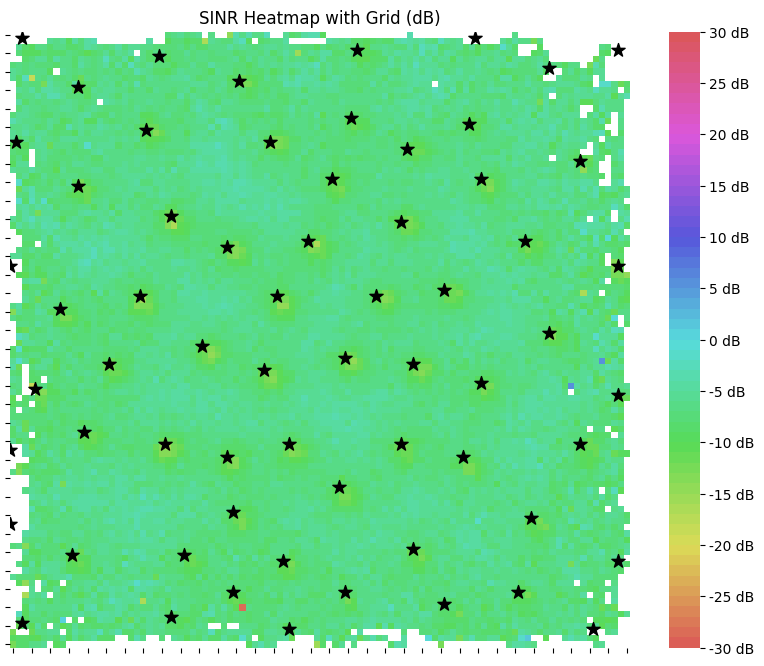

In [127]:
plot_sinr_heatmap(MAXMIN_SINRs, UEs_LOCATIONS, APs_LOCATIONS, grid_size, colorbar_ticks='custom')

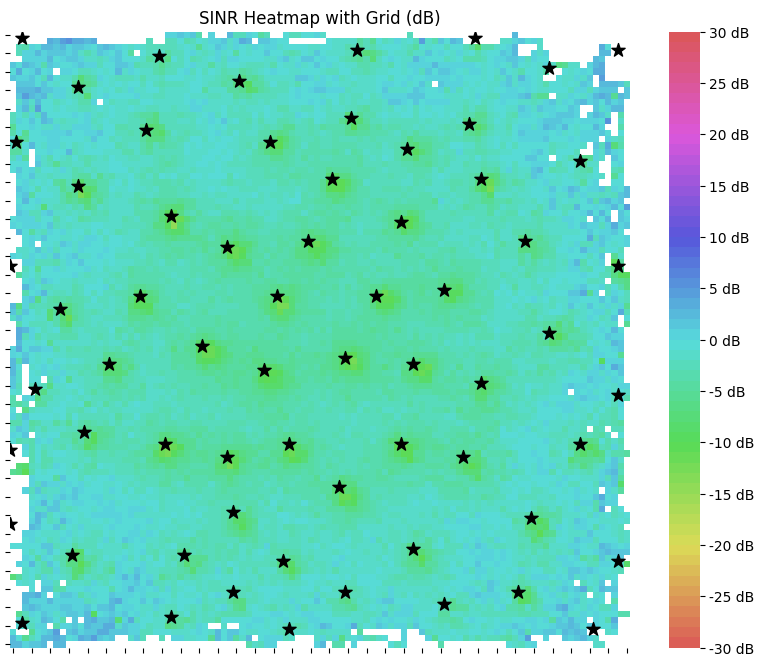

In [128]:
plot_sinr_heatmap(MAXPROD_SINRs, UEs_LOCATIONS, APs_LOCATIONS, grid_size, colorbar_ticks='custom')

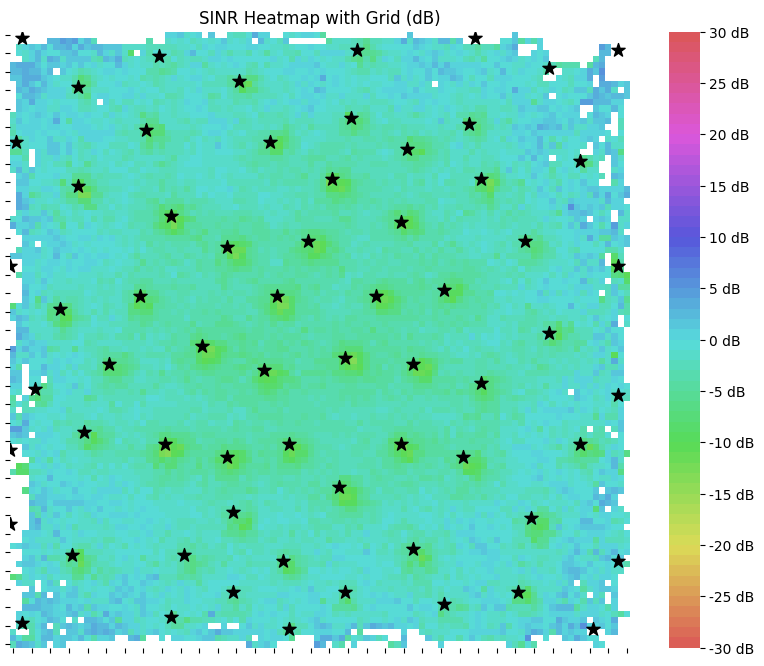

In [129]:
plot_sinr_heatmap(SUMRATE_SINRs, UEs_LOCATIONS, APs_LOCATIONS, grid_size, colorbar_ticks='custom')